<a href="https://colab.research.google.com/github/RoyMukta/Data-Science-Research-Project-Part_B-/blob/main/Go_emotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Define your project folder path
project_path = "/content/drive/My Drive/Project_N"

In [ ]:
import pandas as pd

file_path = "/content/drive/MyDrive/Project_N/Mental_health_cleaned.csv"
df = pd.read_csv(file_path)

print("Sample data:")
print(df.head(3))


Sample data:
   Post ID                                         Post Title  \
0   607679  Hi Check out this post if youre not sure how t...   
1   180185                               I had a car accident   
2   516409                                      Horrible week   

                                        Post Content   Post Author  User ID  \
0  Hi there and welcome to the Anxiety section of...    BeyondBlue    54597   
1  And it was entirely my own fault I tried cross...         grovi    12724   
2  Hi everyone Im having a horrible week so just ...  Whatsinaname     7809   

   Post Date Post Category  
0   3/4/2025       Anxiety  
1  5/21/2016       Anxiety  
2  9/25/2020       Anxiety  


# LIWC

In [ ]:
# --------------------------------------------------------
# 1. IMPORT LIBRARIES
# --------------------------------------------------------
import re
import pandas as pd

# --------------------------------------------------------
# 2. LOAD YOUR DATASET FROM GOOGLE DRIVE
# --------------------------------------------------------
input_path = "/content/drive/MyDrive/Project_N/Mental_health_cleaned.csv"
df = pd.read_csv(input_path)

print("📌 Loaded dataset with", len(df), "posts")
print(df.columns)


# --------------------------------------------------------
# 3. CLEAN TEXT (LOWERCASE)
# --------------------------------------------------------
df["clean_text"] = df["Post Content"].astype(str).str.lower()


# --------------------------------------------------------
# 4. WORD LISTS FOR LIWC-STYLE FEATURES
# --------------------------------------------------------

# Emotional Symptoms
sadness_words = ["sad","cry","tear","lonely","worthless","hopeless","empty",
                 "depressed","gloomy","miserable","down"]

anxiety_words = ["anxious","nervous","panic","fear","scared","terrified","worried",
                 "shaking","palpitations","tension","stress","stressed"]

anger_words = ["angry","mad","furious","irritated","annoyed","rage"]

negative_emotion_words = ["bad","hurt","pain","suffering","broken","hate","upset",
                          "awful","terrible","horrible","disgusting"]

positive_emotion_words = ["happy","joy","calm","peace","relief","grateful","hope",
                          "love","safe"]

# Cognitive Symptoms
rumination_words = ["why","overthinking","thinking too much","stuck",
                    "cannot stop thinking","what if","looping thoughts","spiral",
                    "obsess","obsessing"]

hopelessness_words = ["no point","give up","cannot go on","nothing matters",
                      "hopeless","i'm done","pointless"]

catastrophizing_words = ["always","never","ruined","disaster","worst","hopeless",
                         "i cant handle this","everything is falling apart"]

self_blame_words = ["my fault","i'm to blame","blame myself","i caused",
                    "my mistake","its my fault"]

# Behavioral Symptoms
fatigue_words = ["tired","exhausted","fatigue","cannot sleep","sleeping too much",
                 "insomnia","no energy","drained"]

avoidance_words = ["avoid","avoiding","hide","isolating","shut down",
                   "withdraw","escape"]

# Social Symptoms
isolation_words = ["alone","lonely","isolated","no one","nobody cares",
                   "abandoned","left alone","by myself"]

interpersonal_conflict_words = ["fight","argue","conflict","misunderstood",
                                "no one listens","people hate me"]

# Self-focus
first_person_words = ["i","me","my","myself","mine"]

# Somatic Symptoms
health_symptoms = ["headache","nausea","pain","ache","heart racing","tight chest",
                   "dizzy","numb","exhausted","insomnia","appetite","weight loss",
                   "weight gain"]

# Suicidal Ideation
suicidal_words = ["suicide","kill myself","want to die","end my life","take my life",
                  "no point living","die","ending it","self harm","cut myself",
                  "i dont want to live"]


# --------------------------------------------------------
# 5. COUNT FUNCTION
# --------------------------------------------------------
def count_words(text, word_list):
    count = 0
    for word in word_list:
        if word in text:
            count += text.count(word)
    return count


# --------------------------------------------------------
# 6. APPLY ALL FEATURE EXTRACTIONS
# --------------------------------------------------------
df["sadness"] = df["clean_text"].apply(lambda x: count_words(x, sadness_words))
df["anxiety"] = df["clean_text"].apply(lambda x: count_words(x, anxiety_words))
df["anger"] = df["clean_text"].apply(lambda x: count_words(x, anger_words))
df["negative_emotion"] = df["clean_text"].apply(lambda x: count_words(x, negative_emotion_words))
df["positive_emotion"] = df["clean_text"].apply(lambda x: count_words(x, positive_emotion_words))

df["rumination"] = df["clean_text"].apply(lambda x: count_words(x, rumination_words))
df["hopelessness"] = df["clean_text"].apply(lambda x: count_words(x, hopelessness_words))
df["catastrophizing"] = df["clean_text"].apply(lambda x: count_words(x, catastrophizing_words))
df["self_blame"] = df["clean_text"].apply(lambda x: count_words(x, self_blame_words))

df["fatigue"] = df["clean_text"].apply(lambda x: count_words(x, fatigue_words))
df["avoidance"] = df["clean_text"].apply(lambda x: count_words(x, avoidance_words))

df["social_isolation"] = df["clean_text"].apply(lambda x: count_words(x, isolation_words))
df["interpersonal_conflict"] = df["clean_text"].apply(lambda x: count_words(x, interpersonal_conflict_words))

df["first_person"] = df["clean_text"].apply(lambda x: count_words(x, first_person_words))
df["health_symptoms"] = df["clean_text"].apply(lambda x: count_words(x, health_symptoms))

df["suicidal_ideation"] = df["clean_text"].apply(lambda x: count_words(x, suicidal_words))


print("🔥 All LIWC-style mental health features extracted!")


# --------------------------------------------------------
# 7. SAVE UPDATED FILE TO GOOGLE DRIVE
# --------------------------------------------------------
output_path = "/content/drive/MyDrive/Project_N/Mental_health_LIWC_features.csv"
df.to_csv(output_path, index=False)

print("💾 Saved file to:", output_path)


📌 Loaded dataset with 26749 posts
Index(['Post ID', 'Post Title', 'Post Content', 'Post Author', 'User ID',
       'Post Date', 'Post Category'],
      dtype='object')
🔥 All LIWC-style mental health features extracted!
💾 Saved file to: /content/drive/MyDrive/Project_N/Mental_health_LIWC_features.csv


# Apply Rule-Based Labels

In [ ]:
# RULE-BASED LABELING FOR MENTAL HEALTH (FIXED)
# --------------------------------------------------------
input_path = "/content/drive/MyDrive/Project_N/Mental_health_LIWC_features.csv"
df = pd.read_csv(input_path) # Explicitly load df with LIWC features
# 1″′ Depression Label
def Depression_label(row):
    score = 0

    score += row["sadness"] * 3
    score += row["hopelessness"] * 3
    score += row["rumination"] * 2
    score += row["negative_emotion"] * 1.5
    score += row["fatigue"] * 1
    score += row["self_blame"] * 1.5

    score -= row["positive_emotion"] * 1

    return 1 if score >= 4 else 0


# 2″′ Anxiety Label
def Anxiety_label(row):
    score = 0

    score += row["anxiety"] * 3
    score += row["catastrophizing"] * 2
    score += row["avoidance"] * 1.5
    score += row["health_symptoms"] * 1
    score += row["anger"] * 0.5

    score -= row["positive_emotion"] * 1

    return 1 if score >= 3 else 0


# 3″′ Suicidal Ideation Label
def SuicidalThought_label(row):   # FIXED (no space in name)
    if row["suicidal_ideation"] > 0:
        return 1

    if row["hopelessness"] >= 2 and row["sadness"] >= 2:
        return 1

    return 0


# --------------------------------------------------------
# APPLY RULES TO DATAFRAME (FIXED FUNCTION NAMES)
# --------------------------------------------------------
df["Depression_label"] = df.apply(Depression_label, axis=1) # Corrected function name
df["Anxiety_label"] = df.apply(Anxiety_label, axis=1)     # Corrected function name
df["SuicidalThought_label"] = df.apply(SuicidalThought_label, axis=1)   # Corrected function name


print("🔥 Rule-based labeling completed!")


# --------------------------------------------------------
# SHOW SAMPLE OUTPUT
# --------------------------------------------------------
print("\n📌 Sample labeled rows:")
print(df[["Post Content", "Depression_label", "Anxiety_label", "SuicidalThought_label"]].head(10))


# --------------------------------------------------------
# SAVE FILE TO GOOGLE DRIVE
# --------------------------------------------------------
output_path = "/content/drive/MyDrive/Project_N/Mental_health_LIWC_labeled.csv"
df.to_csv(output_path, index=False)

print("\n💾 Saved labeled dataset to:", output_path)


🔥 Rule-based labeling completed!

📌 Sample labeled rows:
                                        Post Content  Depression_label  \
0  Hi there and welcome to the Anxiety section of...                 0   
1  And it was entirely my own fault I tried cross...                 0   
2  Hi everyone Im having a horrible week so just ...                 0   
3  Dear All Just need a connection to feel the su...                 0   
4  Hi there just reaching out to anyone who might...                 0   
5  Recently my anxiety has flared As soon as I wa...                 1   
6  Has anyone has success with HBOT Therapy for P...                 0   
7  Im 4 months in to my apprenticeship and em str...                 0   
8  I am currently an international student I alre...                 0   
9  Just need help processing things been diagnose...                 0   

   Anxiety_label  SuicidalThought_label  
0              1                      0  
1              1                      0  
2 

# Final GoEmotion

In [ ]:
# --------------------------------------------------------
# 1. IMPORT LIBRARIES
# --------------------------------------------------------
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import numpy as np
import pandas as pd


# --------------------------------------------------------
# 2. LOAD YOUR DATASET (your column names shown above)
# --------------------------------------------------------
df = pd.read_csv("/content/drive/MyDrive/Project_B/Mental_health_cleaned.csv")
print("📌 Loaded dataset with", len(df), "posts")
print(df.columns)  # check column names


# --------------------------------------------------------
# 3. LOAD GOEMOTIONS MODEL (working version)
# --------------------------------------------------------
model_id = "SamLowe/roberta-base-go_emotions"

tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForSequenceClassification.from_pretrained(model_id)

print("✅ GoEmotions model loaded!")


# --------------------------------------------------------
# 4. EMOTION LABEL NAMES
# --------------------------------------------------------
emotion_names = [
 "admiration","amusement","anger","annoyance","approval","caring","confusion",
 "curiosity","desire","disappointment","disapproval","disgust","embarrassment",
 "excitement","fear","gratitude","grief","joy","love","nervousness","optimism",
 "pride","realization","relief","remorse","sadness","surprise","neutral"
]


# --------------------------------------------------------
# 5. FUNCTION TO GET EMOTION SCORES
# --------------------------------------------------------
def get_go_emotions(text):
    inputs = tokenizer(str(text), return_tensors="pt", truncation=True)
    outputs = model(**inputs)
    scores = torch.softmax(outputs.logits, dim=1).detach().numpy()[0]
    return scores


# --------------------------------------------------------
# 6. APPLY GOEMOTIONS TO EACH POST
# --------------------------------------------------------
print("⏳ Extracting GoEmotions...")

emotion_features = df["Post Content"].astype(str).apply(get_go_emotions)
emotion_df = pd.DataFrame(emotion_features.tolist(), columns=emotion_names)

df = pd.concat([df, emotion_df], axis=1)

print("✅ Emotion extraction complete!")


# --------------------------------------------------------
# 7. CREATE TOP-5 EMOTIONS COLUMN
# --------------------------------------------------------
def get_top_5_emotions(row):
    scores = row[emotion_names].values
    top5_idx = scores.argsort()[-5:][::-1]
    top5 = [(emotion_names[i], round(scores[i], 4)) for i in top5_idx]
    return ", ".join([f"{e}:{s}" for e, s in top5])

df["Top_5_Emotions"] = df.apply(get_top_5_emotions, axis=1)


# --------------------------------------------------------
# 8. SHOW OUTPUT SAMPLE
# --------------------------------------------------------
print("\n🎉 SAMPLE OUTPUT (first 5 rows):")
print(df[["Post Content", "Top_5_Emotions"]].head())


# --------------------------------------------------------
# 9. SAVE OUTPUT TO GOOGLE DRIVE
# --------------------------------------------------------
output_path = "/content/drive/MyDrive/Project_B/Mental_health_with_goemotions_top5.csv"
df.to_csv(output_path, index=False)

print("\n💾 File saved to:", output_path)


📌 Loaded dataset with 26749 posts
Index(['Post ID', 'Post Title', 'Post Content', 'Post Author', 'User ID',
       'Post Date', 'Post Category'],
      dtype='object')


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/380 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

✅ GoEmotions model loaded!
⏳ Extracting GoEmotions...
✅ Emotion extraction complete!

🎉 SAMPLE OUTPUT (first 5 rows):
                                        Post Content  \
0  Hi there and welcome to the Anxiety section of...   
1  And it was entirely my own fault I tried cross...   
2  Hi everyone Im having a horrible week so just ...   
3  Dear All Just need a connection to feel the su...   
4  Hi there just reaching out to anyone who might...   

                                      Top_5_Emotions  
0  gratitude:0.9687, admiration:0.0119, excitemen...  
1  fear:0.5752, nervousness:0.1214, sadness:0.064...  
2  fear:0.2703, optimism:0.2263, nervousness:0.14...  
3  gratitude:0.2129, desire:0.1604, sadness:0.157...  
4  nervousness:0.6225, fear:0.1034, sadness:0.067...  

💾 File saved to: /content/drive/MyDrive/Project_B/Mental_health_with_goemotions_top5.csv


# GoEmotion Mental Health Labels

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Project_N/Mental_health_with_goemotions.csv")
print("📌 File loaded successfully")
#print(df.head())


📌 File loaded successfully


In [ ]:
# --------------------------------------------------------
# GOEMOTION-BASED LABELING
# --------------------------------------------------------

def label_goemo_depression(row):
    score = 0
    score += row["sadness"] * 3
    score += row["grief"] * 3
    score += row["remorse"] * 2
    score += row["disappointment"] * 1.5
    score += row["disapproval"] * 1
    score -= row["joy"] * 1   # positive emotion reduces depression

    return 1 if score >= 0.6 else 0


def label_goemo_anxiety(row):
    score = 0
    score += row["fear"] * 3
    score += row["nervousness"] * 2
    score += row["confusion"] * 1.5
    score += row["surprise"] * 1
    score += row["anger"] * 0.5

    score -= row["optimism"] * 1
    score -= row["relief"] * 1

    return 1 if score >= 0.6 else 0


def label_goemo_suicide(row):
    # high sadness + high grief → emotional suicide indicator
    if row["sadness"] > 0.4 and row["grief"] > 0.4:
        return 1

    # high emotional collapse score
    depression_score = (
        row["sadness"] * 3 +
        row["grief"] * 3 +
        row["remorse"] * 2
    )

    if depression_score >= 1.2:
        return 1

    return 0


# --------------------------------------------------------
# APPLY LABELS (UPDATED COLUMN NAMES)
# --------------------------------------------------------
df["Depression"] = df.apply(label_goemo_depression, axis=1)
df["Anxiety"] = df.apply(label_goemo_anxiety, axis=1)
df["SuicidalThought"] = df.apply(label_goemo_suicide, axis=1)

print("🔥 GoEmotion-based labeling completed!")


# --------------------------------------------------------
# SHOW SAMPLE OUTPUT
# --------------------------------------------------------
print("\n📌 Sample labeled rows:")
print(df[["Post Content", "Depression", "Anxiety", "SuicidalThought"]].head(10))


# --------------------------------------------------------
# SAVE FILE TO GOOGLE DRIVE
# --------------------------------------------------------
output_path = "/content/drive/MyDrive/Project_N/Mental_health_GoEmotion_labeled.csv"
df.to_csv(output_path, index=False)

print("\n💾 Saved labeled dataset to:", output_path)


🔥 GoEmotion-based labeling completed!

📌 Sample labeled rows:
                                        Post Content  Depression  Anxiety  \
0  Hi there and welcome to the Anxiety section of...           0        0   
1  And it was entirely my own fault I tried cross...           0        1   
2  Hi everyone Im having a horrible week so just ...           0        1   
3  Dear All Just need a connection to feel the su...           1        0   
4  Hi there just reaching out to anyone who might...           0        1   
5  Recently my anxiety has flared As soon as I wa...           0        1   
6  Has anyone has success with HBOT Therapy for P...           0        0   
7  Im 4 months in to my apprenticeship and em str...           1        0   
8  I am currently an international student I alre...           1        0   
9  Just need help processing things been diagnose...           0        1   

   SuicidalThought  
0                0  
1                0  
2                0  
3     

# High LOw Moderate

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Project_N/Mental_health_with_goemotions.csv")
print("📌 File loaded successfully")
#print(df.head())

📌 File loaded successfully


In [ ]:
def label_goemo_depression(row):
    score = 0
    score += row["sadness"] * 3
    score += row["disappointment"] * 2
    score += row["remorse"] * 1.5
    score += row["disapproval"] * 1
    score -= row["joy"] * 1

    if score >= 1.2:
        return "severe"
    elif score >= 0.6:
        return "moderate"
    else:
        return "mild"
def label_goemo_anxiety(row):
    score = 0
    score += row["fear"] * 3
    score += row["nervousness"] * 2
    score += row["confusion"] * 1.5
    score += row["surprise"] * 1
    score += row["anger"] * 0.5

    score -= row["optimism"] * 1
    score -= row["relief"] * 1

    # Assign category
    if score >= 1.0:
        return "high"
    elif score >= 0.5:
        return "medium"
    else:
        return "low"
  def label_goemo_suicide(row):
    score = 0
    score += row["sadness"] * 2.5
    score += row["grief"] * 4        # strongest signal
    score += row["remorse"] * 2
    score -= row["joy"] * 1

    if score >= 1.5:
        return "high_risk"
    elif score >= 0.7:
        return "medium_risk"
    else:
        return "no_risk"


In [ ]:
import pandas as pd

# --------------------------------------------------------
# LOAD FILE
# --------------------------------------------------------
df = pd.read_csv("/content/drive/MyDrive/Project_N/Mental_health_with_goemotions.csv")
print("📌 File loaded successfully!")


# --------------------------------------------------------
# GOEMOTION-BASED MULTI-LEVEL LABELING FUNCTIONS
# --------------------------------------------------------

def label_goemo_depression(row):
    score = (
        row["sadness"] * 3 +
        row["disappointment"] * 2 +
        row["remorse"] * 1.5 +
        row["disapproval"] * 1 -
        row["joy"] * 1
    )

    if score >= 1.0:
        return "severe"
    elif score >= 0.6:
        return "moderate"
    else:
        return "mild"


def label_goemo_anxiety(row):
    score = (
        row["fear"] * 3 +
        row["nervousness"] * 2 +
        row["confusion"] * 1.5 +
        row["surprise"] * 1 +
        row["anger"] * 0.5 -
        row["optimism"] * 1 -
        row["relief"] * 1
    )

    if score >= 1.0:
        return "high"
    elif score >= 0.5:
        return "medium"
    else:
        return "low"


def label_goemo_suicide(row):
    score = (
        row["sadness"] * 2.5 +
        row["grief"] * 4 +
        row["remorse"] * 2 -
        row["joy"] * 1
    )

    if score >= 1.3:
        return "high_risk"
    elif score >= 0.7:
        return "medium_risk"
    else:
        return "no_risk"


# --------------------------------------------------------
# APPLY LABELS TO DATAFRAME (NEW COLUMNS)
# --------------------------------------------------------
df["Depression"] = df.apply(label_goemo_depression, axis=1)
df["Anxiety"] = df.apply(label_goemo_anxiety, axis=1)
df["SuicidalThought"] = df.apply(label_goemo_suicide, axis=1)

print("🔥 Multi-level GoEmotion labeling completed!")


# --------------------------------------------------------
# SHOW SAMPLE OUTPUT
# --------------------------------------------------------
print("\n📌 Sample labeled rows:")
print(df[["Post Content", "Depression", "Anxiety", "SuicidalThought"]].head(10))


# --------------------------------------------------------
# SAVE FILE TO GOOGLE DRIVE
# --------------------------------------------------------
output_path = "/content/drive/MyDrive/Project_N/Mental_health_GoEmotion_labeled_multilevel.csv"
df.to_csv(output_path, index=False)

print("\n💾 Saved labeled dataset to:", output_path)


📌 File loaded successfully!
🔥 Multi-level GoEmotion labeling completed!

📌 Sample labeled rows:
                                        Post Content Depression Anxiety  \
0  Hi there and welcome to the Anxiety section of...       mild     low   
1  And it was entirely my own fault I tried cross...       mild    high   
2  Hi everyone Im having a horrible week so just ...       mild  medium   
3  Dear All Just need a connection to feel the su...       mild     low   
4  Hi there just reaching out to anyone who might...       mild    high   
5  Recently my anxiety has flared As soon as I wa...       mild    high   
6  Has anyone has success with HBOT Therapy for P...       mild     low   
7  Im 4 months in to my apprenticeship and em str...   moderate     low   
8  I am currently an international student I alre...     severe     low   
9  Just need help processing things been diagnose...       mild    high   

  SuicidalThought  
0         no_risk  
1         no_risk  
2         no_risk 

# GoEmotion label visualization

📌 Data Loaded: (26749, 39)


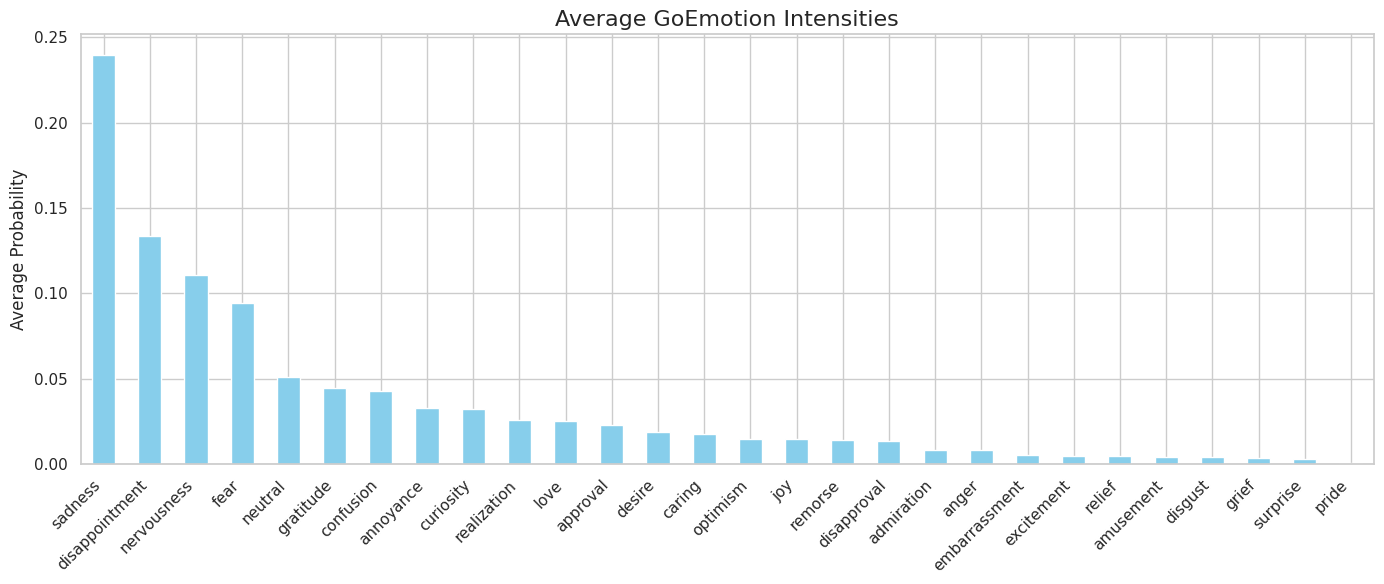

/tmp/ipython-input-3172108702.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Depression", palette="Blues")


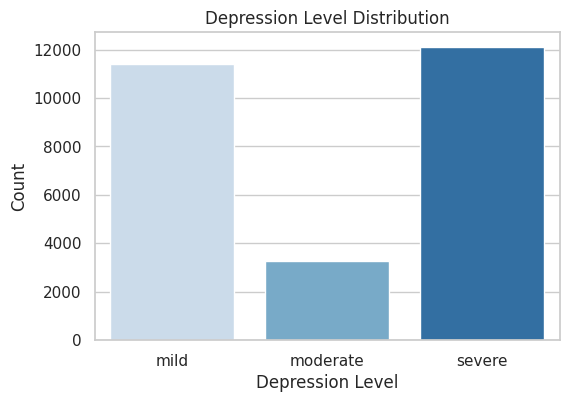

/tmp/ipython-input-3172108702.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Anxiety", palette="Greens")


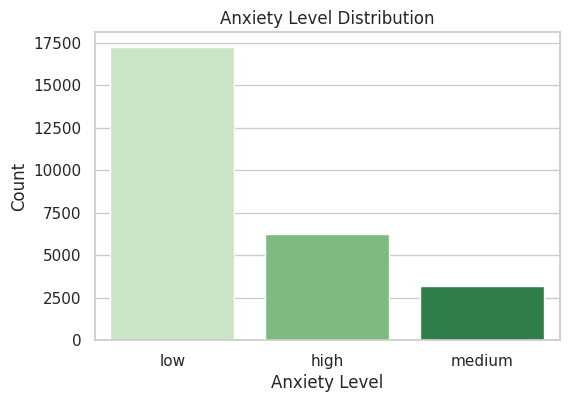

/tmp/ipython-input-3172108702.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="SuicidalThought", palette="Reds")


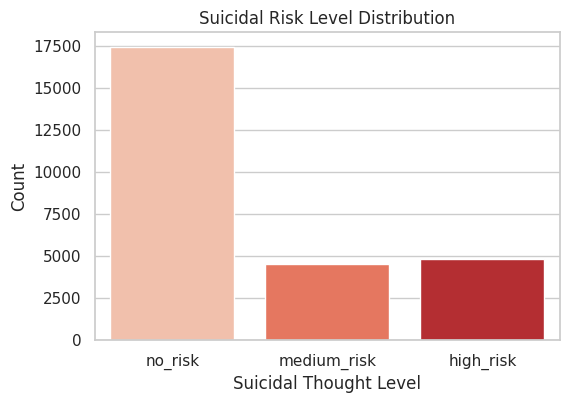

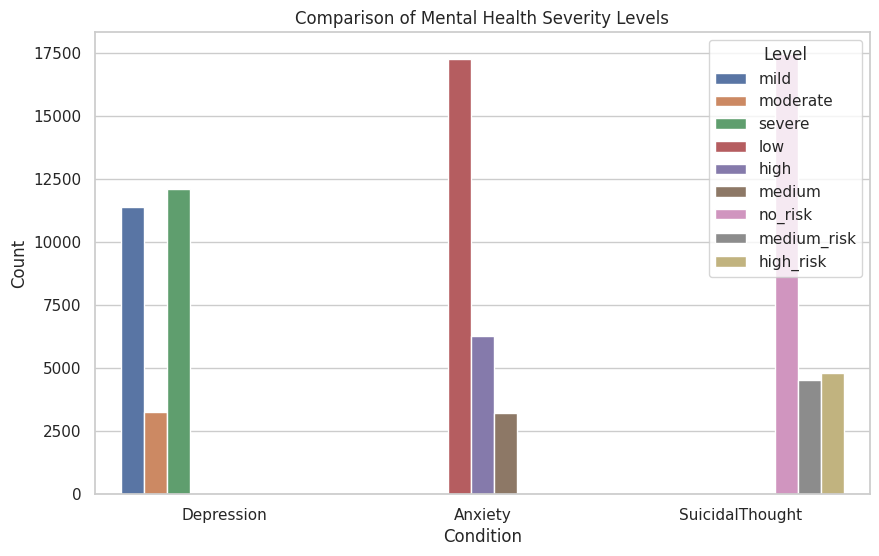

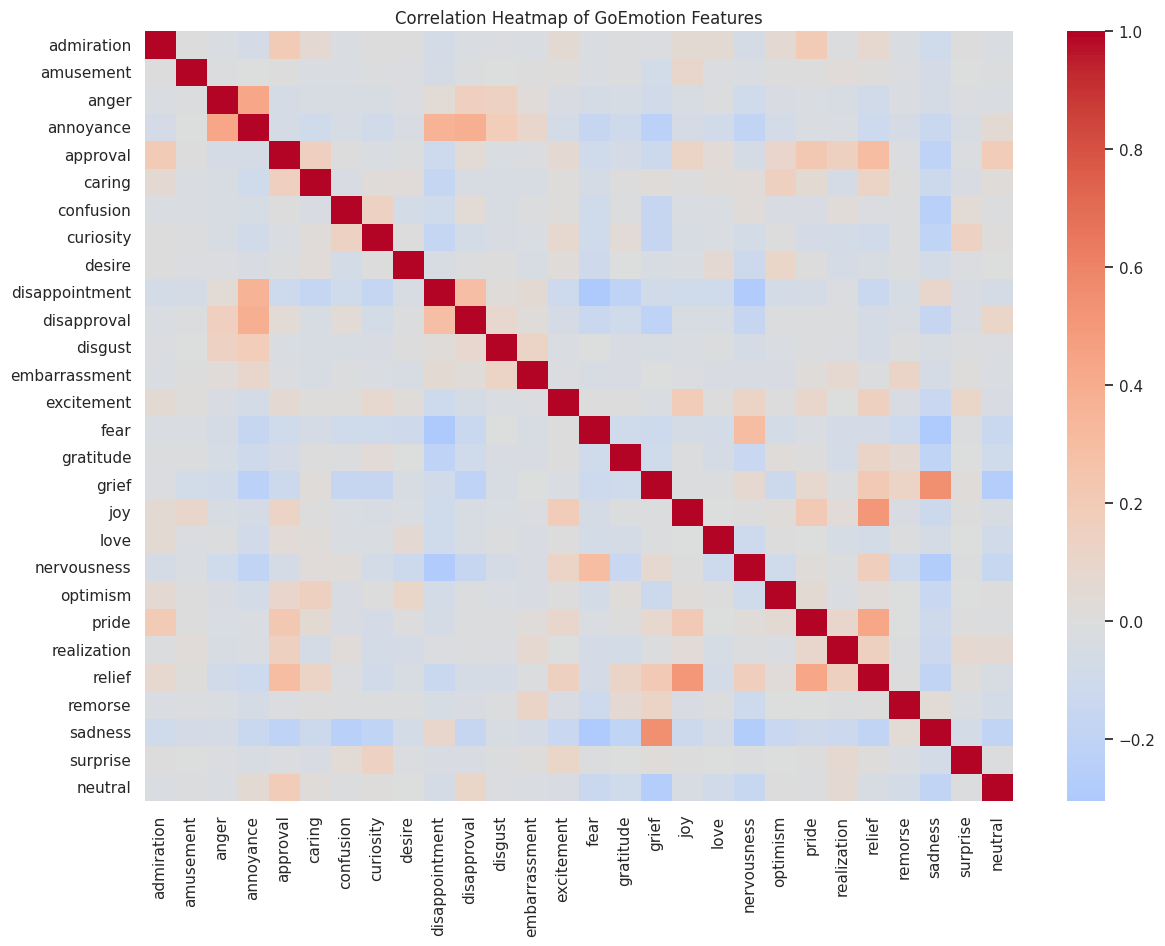

In [ ]:
# ============================================
# 1. LOAD DATA
# ============================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

input_path = "/content/drive/MyDrive/Project_N/Mental_health_GoEmotion_labeled_multilevel.csv"
df = pd.read_csv(input_path)

print("📌 Data Loaded:", df.shape)


# ============================================
# 2. EMOTION DISTRIBUTION BAR PLOT
# (Average intensity of 28 GoEmotions)
# ============================================

emotion_cols = [
 "admiration","amusement","anger","annoyance","approval","caring","confusion",
 "curiosity","desire","disappointment","disapproval","disgust","embarrassment",
 "excitement","fear","gratitude","grief","joy","love","nervousness","optimism",
 "pride","realization","relief","remorse","sadness","surprise","neutral"
]

plt.figure(figsize=(14,6))
df[emotion_cols].mean().sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title("Average GoEmotion Intensities", fontsize=16)
plt.ylabel("Average Probability")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# ============================================
# 3. DISTRIBUTION OF DEPRESSION LEVELS
# ============================================

plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Depression", palette="Blues")
plt.title("Depression Level Distribution")
plt.xlabel("Depression Level")
plt.ylabel("Count")
plt.show()


# ============================================
# 4. DISTRIBUTION OF ANXIETY LEVELS
# ============================================

plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Anxiety", palette="Greens")
plt.title("Anxiety Level Distribution")
plt.xlabel("Anxiety Level")
plt.ylabel("Count")
plt.show()


# ============================================
# 5. DISTRIBUTION OF SUICIDAL RISK LEVELS
# ============================================

plt.figure(figsize=(6,4))
sns.countplot(data=df, x="SuicidalThought", palette="Reds")
plt.title("Suicidal Risk Level Distribution")
plt.xlabel("Suicidal Thought Level")
plt.ylabel("Count")
plt.show()


# ============================================
# 6. COMBINED COMPARISON CHART
# ============================================

plt.figure(figsize=(10,6))
df_melt = df[["Depression","Anxiety","SuicidalThought"]].melt(
    var_name="Condition", value_name="Level"
)
sns.countplot(data=df_melt, x="Condition", hue="Level")
plt.title("Comparison of Mental Health Severity Levels")
plt.xlabel("Condition")
plt.ylabel("Count")
plt.legend(title="Level")
plt.show()


# ============================================
# 7. CORRELATION HEATMAP OF EMOTIONS
# ============================================

plt.figure(figsize=(14,10))
corr = df[emotion_cols].corr()
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of GoEmotion Features")
plt.show()


# ============================================
# 8. SCORE HISTOGRAMS (OPTIONAL)
# ============================================

# If you computed scores already, you can plot them:
# df["Depression_Score"], df["Anxiety_Score"], df["Suicidal_Score"]

score_cols = ["Depression_Score", "Anxiety_Score", "Suicidal_Score"]

for col in score_cols:
    if col in df.columns:
        plt.figure(figsize=(6,4))
        sns.histplot(df[col], kde=True, color='purple')
        plt.title(f"{col} Distribution")
        plt.xlabel("Score")
        plt.ylabel("Frequency")
        plt.show()


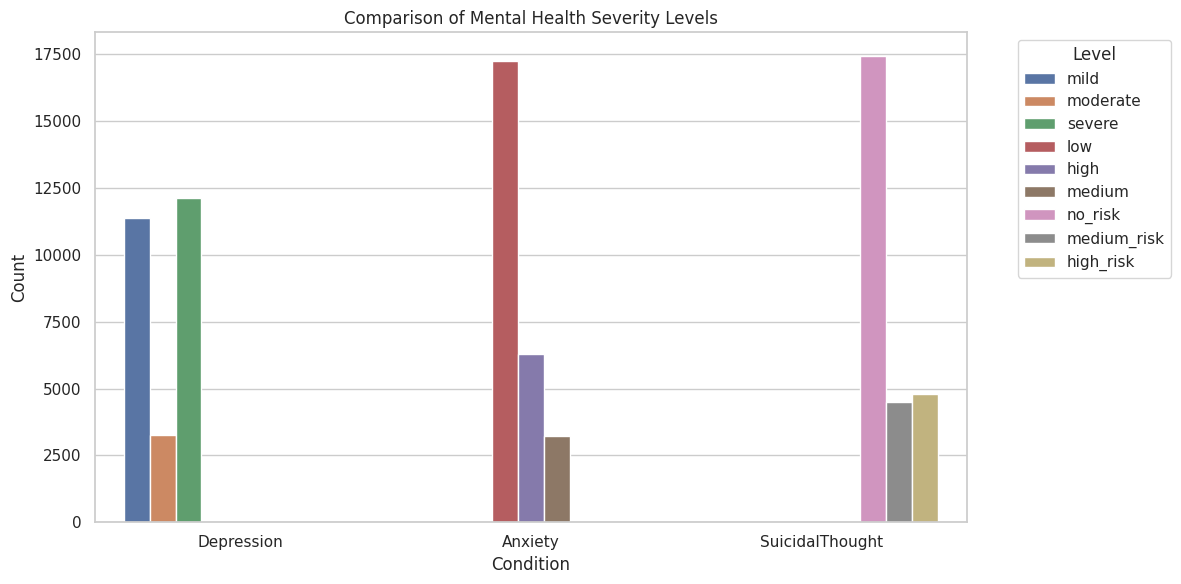

In [ ]:
plt.figure(figsize=(12,6))

df_melt = df[["Depression","Anxiety","SuicidalThought"]].melt(
    var_name="Condition", value_name="Level"
)

sns.countplot(data=df_melt, x="Condition", hue="Level")

plt.title("Comparison of Mental Health Severity Levels")
plt.xlabel("Condition")
plt.ylabel("Count")

# ⭐ Move legend to the right side
plt.legend(title="Level", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Project_N/Mental_health_with_goemotions.csv")

In [ ]:
goemo_cols = [
 "admiration","amusement","anger","annoyance","approval","caring","confusion",
 "curiosity","desire","disappointment","disapproval","disgust","embarrassment",
 "excitement","fear","gratitude","grief","joy","love","nervousness","optimism",
 "pride","realization","relief","remorse","sadness","surprise","neutral"
]

 OVERALL GOEMOTION DISTRIBUTION

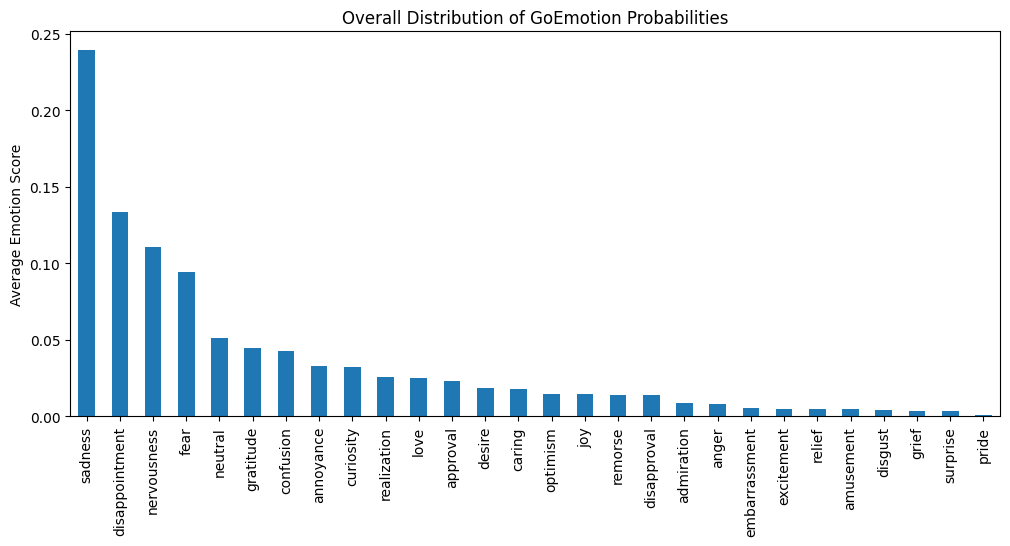

In [ ]:
plt.figure(figsize=(12,5))
df[goemo_cols].mean().sort_values(ascending=False).plot(kind='bar')
plt.title("Overall Distribution of GoEmotion Probabilities")
plt.ylabel("Average Emotion Score")
plt.xticks(rotation=90)
plt.show()

GOEMOTION CORRELATION HEATMAP

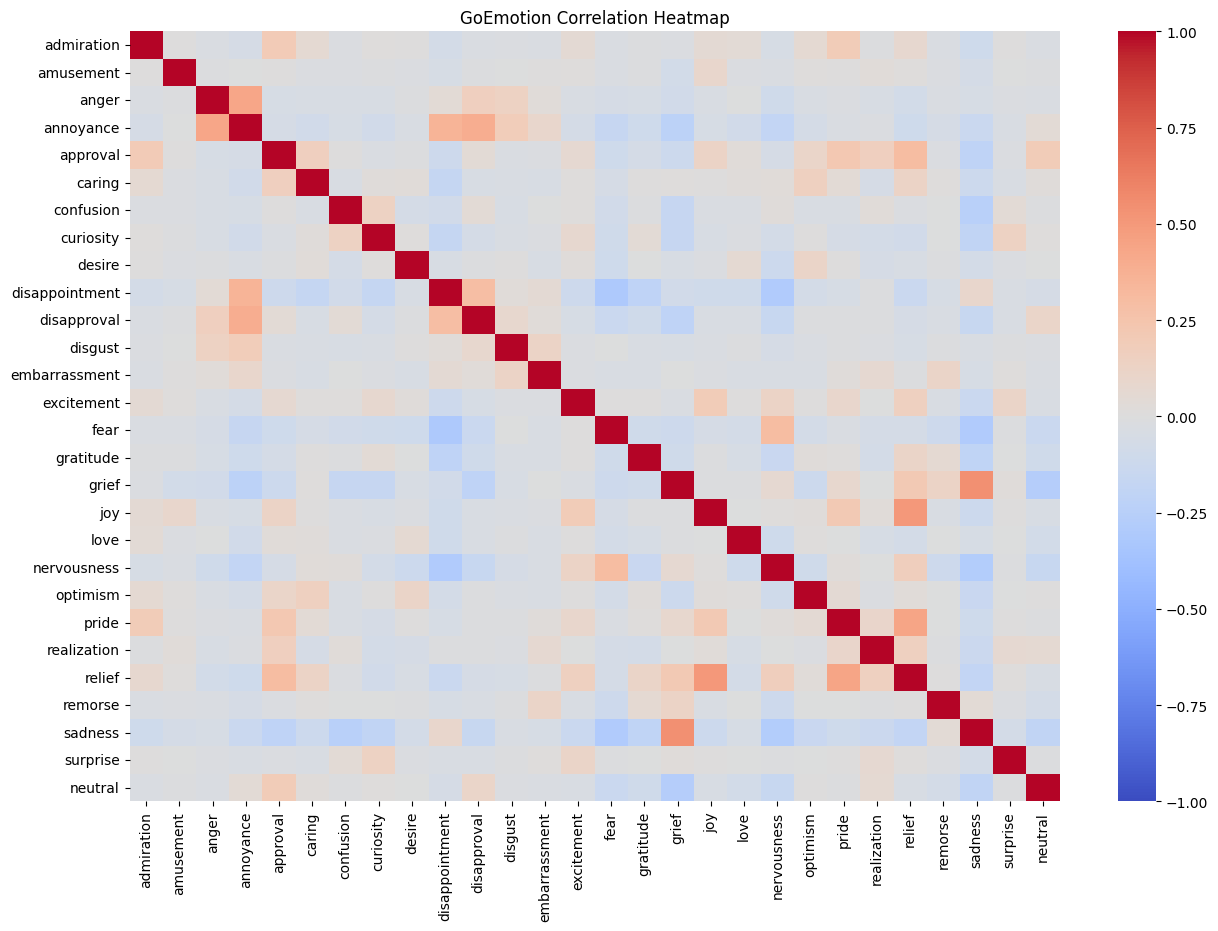

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df[goemo_cols].corr(), cmap="coolwarm", vmin=-1, vmax=1)
plt.title("GoEmotion Correlation Heatmap")
plt.show()

EMOTIONAL PROFILE: DEPRESSED POSTS

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Project_N/Mental_health_GoEmotion_labeled.csv")

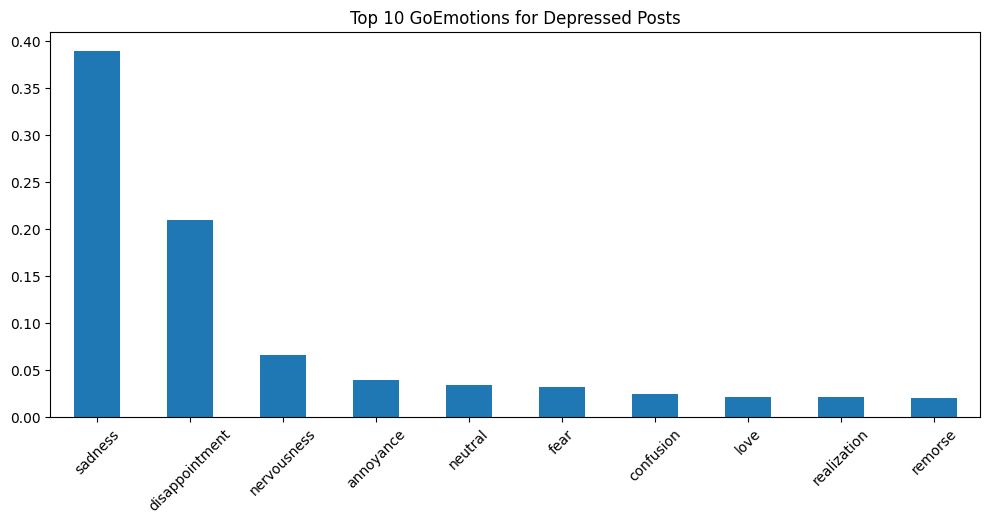

In [ ]:
depressed = df[df["Depression"] == 1]
plt.figure(figsize=(12,5))
depressed[goemo_cols].mean().sort_values(ascending=False)[:10].plot(kind='bar')
plt.title("Top 10 GoEmotions for Depressed Posts")
plt.xticks(rotation=45)
plt.show()

EMOTIONAL PROFILE: ANXIETY POSTS

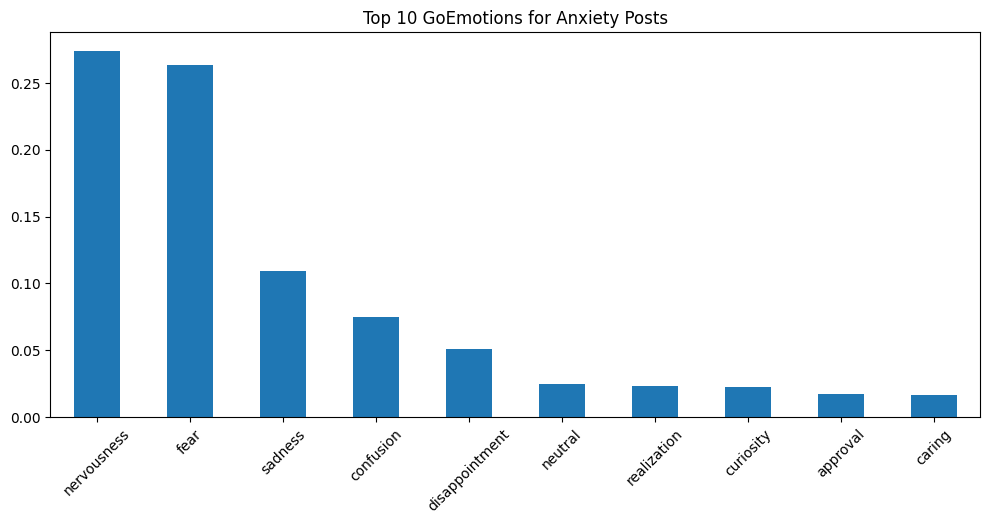

In [ ]:
anx = df[df["Anxiety"] == 1]
plt.figure(figsize=(12,5))
anx[goemo_cols].mean().sort_values(ascending=False)[:10].plot(kind='bar')
plt.title("Top 10 GoEmotions for Anxiety Posts")
plt.xticks(rotation=45)
plt.show()

EMOTIONAL PROFILE: SUICIDAL THOUGHT POSTS

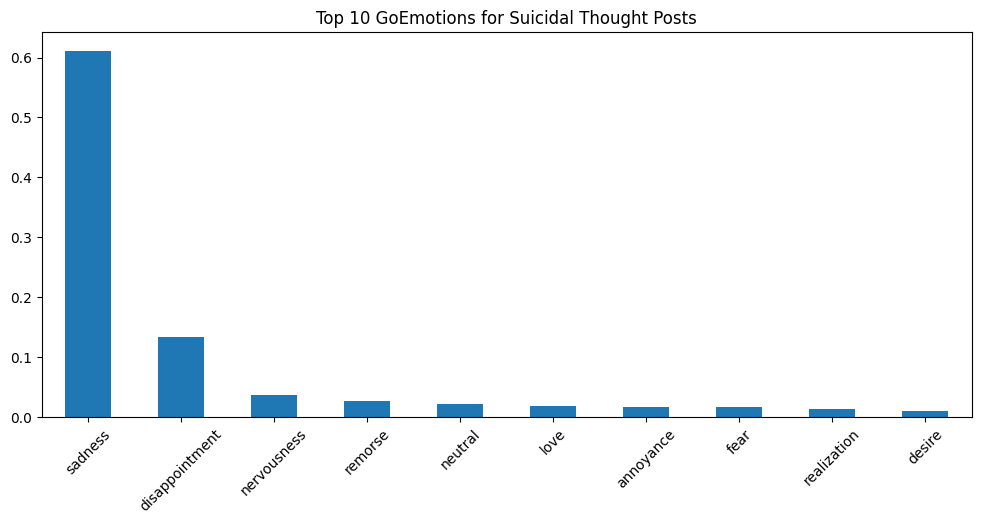

In [ ]:
suicide = df[df["SuicidalThought"] == 1]
plt.figure(figsize=(12,5))
suicide[goemo_cols].mean().sort_values(ascending=False)[:10].plot(kind='bar')
plt.title("Top 10 GoEmotions for Suicidal Thought Posts")
plt.xticks(rotation=45)
plt.show()

Radar Chart for Emotional Patterns

In [ ]:
!pip install plotly
import plotly.express as px

mean_depr = depressed[goemo_cols].mean()

fig = px.line_polar(
    r=mean_depr.values,
    theta=goemo_cols,
    line_close=True,
    title="Radar Chart – Emotional Profile of Depressed Posts"
)
fig.show()


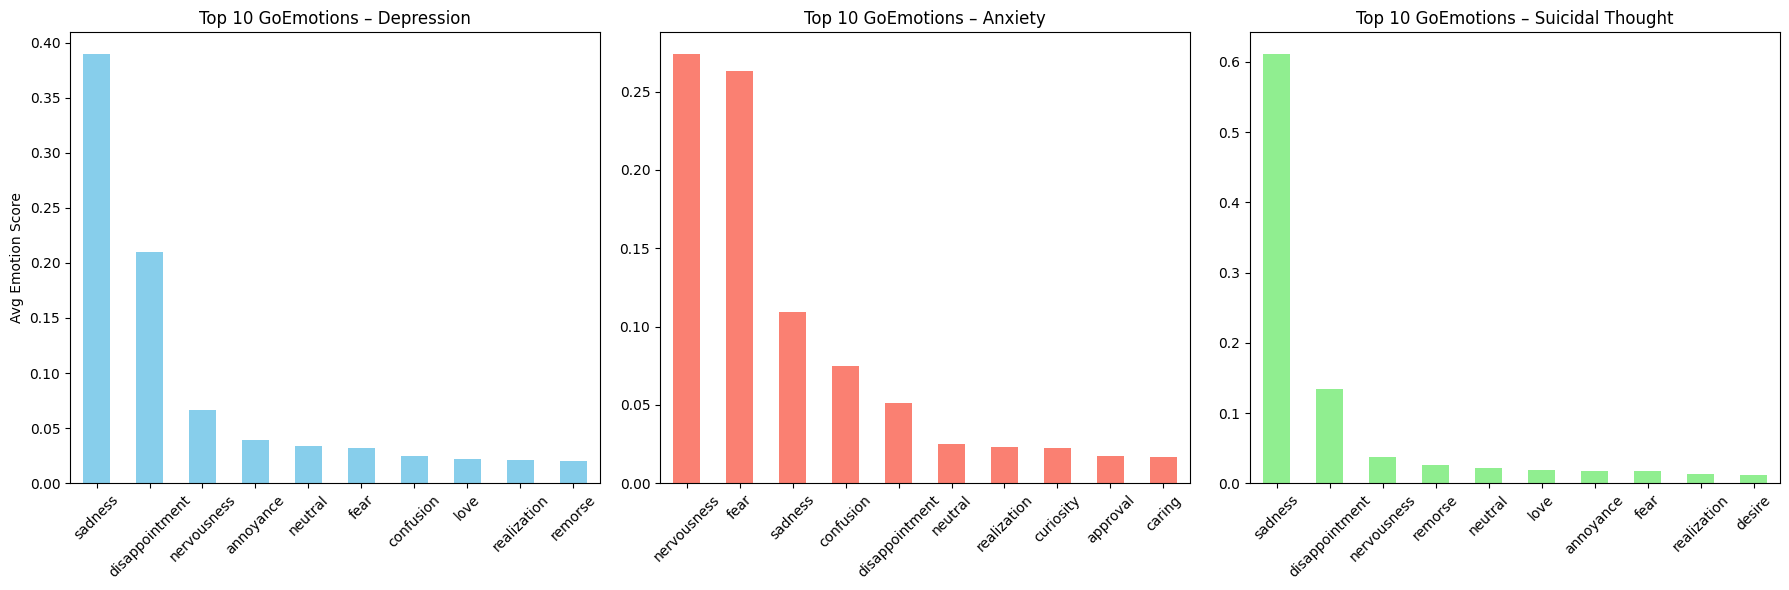

In [ ]:
import matplotlib.pyplot as plt

# ------------------------------------
# GoEmotion feature list
# ------------------------------------
goemo_cols = [
 "admiration","amusement","anger","annoyance","approval","caring","confusion",
 "curiosity","desire","disappointment","disapproval","disgust","embarrassment",
 "excitement","fear","gratitude","grief","joy","love","nervousness","optimism",
 "pride","realization","relief","remorse","sadness","surprise","neutral"
]


# ------------------------------------
# Select label subsets
# ------------------------------------
df_depr = df[df["Depression"] == 1]
df_anx = df[df["Anxiety"] == 1]
df_suic = df[df["SuicidalThought"] == 1]


# ------------------------------------
# Compute mean emotions
# ------------------------------------
top10_depr = df_depr[goemo_cols].mean().sort_values(ascending=False)[:10]
top10_anx  = df_anx[goemo_cols].mean().sort_values(ascending=False)[:10]
top10_suic = df_suic[goemo_cols].mean().sort_values(ascending=False)[:10]


# ------------------------------------
# Create single figure with 3 subplots
# ------------------------------------
plt.figure(figsize=(18,6))

# Depression
plt.subplot(1,3,1)
top10_depr.plot(kind="bar", color="skyblue")
plt.title("Top 10 GoEmotions – Depression")
plt.xticks(rotation=45)
plt.ylabel("Avg Emotion Score")

# Anxiety
plt.subplot(1,3,2)
top10_anx.plot(kind="bar", color="salmon")
plt.title("Top 10 GoEmotions – Anxiety")
plt.xticks(rotation=45)
plt.ylabel("")

# Suicidal Thought
plt.subplot(1,3,3)
top10_suic.plot(kind="bar", color="lightgreen")
plt.title("Top 10 GoEmotions – Suicidal Thought")
plt.xticks(rotation=45)
plt.ylabel("")

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Project_N/Mental_health_GoEmotion_labeled_multilevel.csv")
print("📌 Data loaded:", df.shape)


📌 Data loaded: (26749, 39)


# Random forest

Data Loaded: (26749, 39)

📌 Depression Report:
              precision    recall  f1-score   support

        mild       0.99      0.99      0.99      2309
    moderate       0.93      0.90      0.91       652
      severe       0.98      0.99      0.99      2389

    accuracy                           0.98      5350
   macro avg       0.97      0.96      0.96      5350
weighted avg       0.98      0.98      0.98      5350


📌 Anxiety Report:
              precision    recall  f1-score   support

         low       0.99      0.99      0.99      3420
      medium       0.91      0.92      0.91       643
        high       0.98      0.98      0.98      1287

    accuracy                           0.98      5350
   macro avg       0.96      0.96      0.96      5350
weighted avg       0.98      0.98      0.98      5350


📌 SuicidalThought Report:
              precision    recall  f1-score   support

     no_risk       0.99      1.00      0.99      3508
 medium_risk       0.96      0.95   

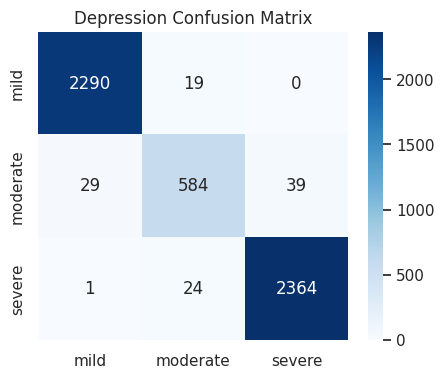

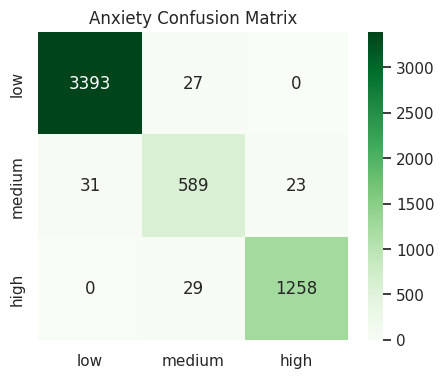

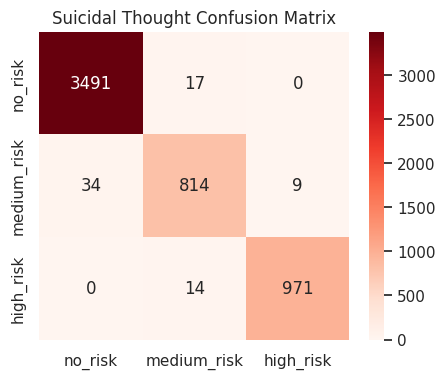

In [ ]:
# ============================================
# MULTI-OUTPUT CLASSIFICATION (ONE MODEL)
# Depression + Anxiety + SuicidalThought
# ============================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report, confusion_matrix

# --------------------------------------------------------
# Load data
# --------------------------------------------------------
df = pd.read_csv("/content/drive/MyDrive/Project_N/Mental_health_GoEmotion_labeled_multilevel.csv")
print("Data Loaded:", df.shape)

# --------------------------------------------------------
# Emotion Features (28 GoEmotions)
# --------------------------------------------------------
emotion_cols = [
 "admiration","amusement","anger","annoyance","approval","caring","confusion",
 "curiosity","desire","disappointment","disapproval","disgust","embarrassment",
 "excitement","fear","gratitude","grief","joy","love","nervousness","optimism",
 "pride","realization","relief","remorse","sadness","surprise","neutral"
]

X = df[emotion_cols]

# --------------------------------------------------------
# Encode Targets (3 Categories)
# --------------------------------------------------------

# Depression
dep_map = {"mild":0, "moderate":1, "severe":2}
df["Depression_enc"] = df["Depression"].map(dep_map)

# Anxiety
anx_map = {"low":0, "medium":1, "high":2}
df["Anxiety_enc"] = df["Anxiety"].map(anx_map)

# Suicide
sui_map = {"no_risk":0, "medium_risk":1, "high_risk":2}
df["SuicidalThought_enc"] = df["SuicidalThought"].map(sui_map)

# Multi-output target matrix
Y = df[["Depression_enc", "Anxiety_enc", "SuicidalThought_enc"]]

# --------------------------------------------------------
# Train/Test Split
# --------------------------------------------------------
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

# --------------------------------------------------------
# Multi-Output Random Forest Model
# --------------------------------------------------------
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42
)

multi_model = MultiOutputClassifier(rf)
multi_model.fit(X_train, Y_train)

# --------------------------------------------------------
# Predict
# --------------------------------------------------------
Y_pred = multi_model.predict(X_test)

# --------------------------------------------------------
# Classification Reports
# --------------------------------------------------------
print("\n📌 Depression Report:")
print(classification_report(Y_test["Depression_enc"], Y_pred[:,0],
                            target_names=dep_map.keys()))

print("\n📌 Anxiety Report:")
print(classification_report(Y_test["Anxiety_enc"], Y_pred[:,1],
                            target_names=anx_map.keys()))

print("\n📌 SuicidalThought Report:")
print(classification_report(Y_test["SuicidalThought_enc"], Y_pred[:,2],
                            target_names=sui_map.keys()))

# --------------------------------------------------------
# Confusion Matrices
# --------------------------------------------------------

# Depression
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(Y_test["Depression_enc"], Y_pred[:,0]),
            annot=True, fmt="d", cmap="Blues",
            xticklabels=dep_map.keys(), yticklabels=dep_map.keys())
plt.title("Depression Confusion Matrix")
plt.show()

# Anxiety
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(Y_test["Anxiety_enc"], Y_pred[:,1]),
            annot=True, fmt="d", cmap="Greens",
            xticklabels=anx_map.keys(), yticklabels=anx_map.keys())
plt.title("Anxiety Confusion Matrix")
plt.show()

# Suicide
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(Y_test["SuicidalThought_enc"], Y_pred[:,2]),
            annot=True, fmt="d", cmap="Reds",
            xticklabels=sui_map.keys(), yticklabels=sui_map.keys())
plt.title("Suicidal Thought Confusion Matrix")
plt.show()


#SVM Confusion matrix

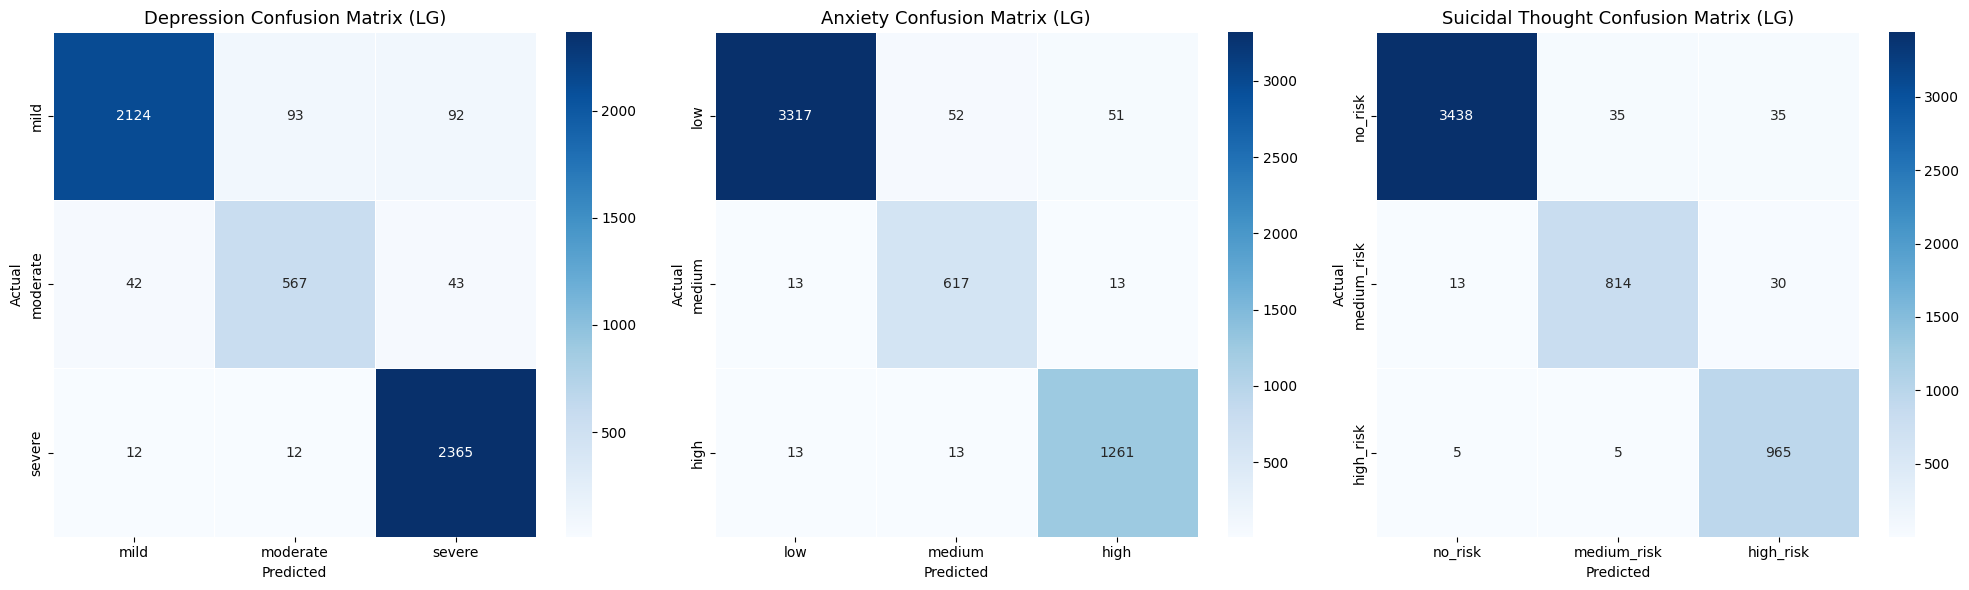

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------------------------------------------
# CONFUSION MATRIX – DEPRESSION (LG)
# -----------------------------------------------------------
cm_depression = np.array([
    [2124, 93, 92],
    [42, 567, 43],
    [12, 12, 2365]
])
labels_dep = ["mild", "moderate", "severe"]

# -----------------------------------------------------------
# CONFUSION MATRIX – ANXIETY (LG)
# -----------------------------------------------------------
cm_anxiety = np.array([
    [3317, 52, 51],
    [13, 617, 13],
    [13, 13, 1261]
])
labels_anx = ["low", "medium", "high"]

# -----------------------------------------------------------
# CONFUSION MATRIX – SUICIDAL THOUGHT (LG)
# -----------------------------------------------------------
cm_suicidal = np.array([
    [3438, 35, 35],
    [13, 814, 30],
    [5, 5, 965]
])
labels_sui = ["no_risk", "medium_risk", "high_risk"]

# -----------------------------------------------------------
# PLOT 3 CONFUSION MATRICES SIDE-BY-SIDE
# -----------------------------------------------------------

plt.figure(figsize=(20, 6))

# ---- Depression ----
plt.subplot(1, 3, 1)
sns.heatmap(
    cm_depression,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=labels_dep,
    yticklabels=labels_dep,
    linewidths=0.5,
    linecolor="white"
)
plt.title("Depression Confusion Matrix (LG)", fontsize=13)
plt.xlabel("Predicted")
plt.ylabel("Actual")

# ---- Anxiety ----
plt.subplot(1, 3, 2)
sns.heatmap(
    cm_anxiety,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=labels_anx,
    yticklabels=labels_anx,
    linewidths=0.5,
    linecolor="white"
)
plt.title("Anxiety Confusion Matrix (LG)", fontsize=13)
plt.xlabel("Predicted")
plt.ylabel("Actual")

# ---- Suicidal Thought ----
plt.subplot(1, 3, 3)
sns.heatmap(
    cm_suicidal,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=labels_sui,
    yticklabels=labels_sui,
    linewidths=0.5,
    linecolor="white"
)
plt.title("Suicidal Thought Confusion Matrix (LG)", fontsize=13)
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()


SVM

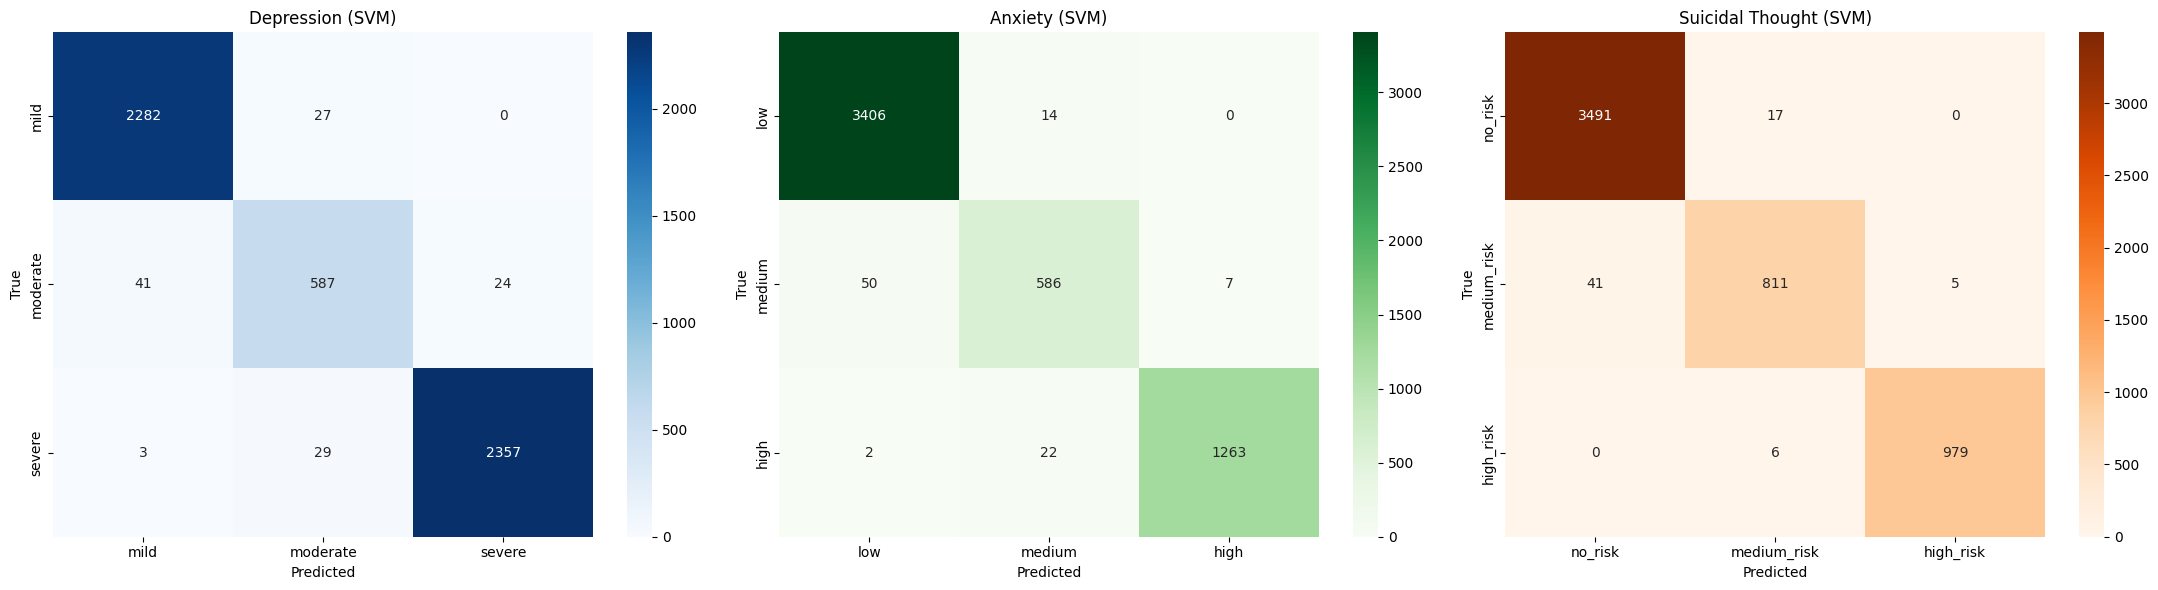

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

# -------------------------------------------------------------
# Load dataset
# -------------------------------------------------------------
df = pd.read_csv("/content/drive/MyDrive/Project_N/Mental_health_GoEmotion_labeled_multilevel.csv")

# -------------------------------------------------------------
# Feature columns (your 28 GoEmotions)
# -------------------------------------------------------------
emotion_cols = [
    "admiration","amusement","anger","annoyance","approval","caring","confusion",
    "curiosity","desire","disappointment","disapproval","disgust","embarrassment",
    "excitement","fear","gratitude","grief","joy","love","nervousness","optimism",
    "pride","realization","relief","remorse","sadness","surprise","neutral" # Added 'neutral'
]

# --------------------------------------------------------
# Encode Targets (3 Categories) - Added this block
# --------------------------------------------------------
dep_map = {"mild":0, "moderate":1, "severe":2}
df["Depression_enc"] = df["Depression"].map(dep_map)

anx_map = {"low":0, "medium":1, "high":2}
df["Anxiety_enc"] = df["Anxiety"].map(anx_map)

sui_map = {"no_risk":0, "medium_risk":1, "high_risk":2}
df["SuicidalThought_enc"] = df["SuicidalThought"].map(sui_map)

# Labels - Updated to use encoded columns
y_dep = df["Depression_enc"]
y_anx = df["Anxiety_enc"]
y_sui = df["SuicidalThought_enc"]

X = df[emotion_cols]

# -------------------------------------------------------------
# Split
# -------------------------------------------------------------
X_train, X_test, y_dep_train, y_dep_test = train_test_split(X, y_dep, test_size=0.2, random_state=42)
_, _, y_anx_train, y_anx_test = train_test_split(X, y_anx, test_size=0.2, random_state=42)
_, _, y_sui_train, y_sui_test = train_test_split(X, y_sui, test_size=0.2, random_state=42)

# -------------------------------------------------------------
# Scale features for SVM
# -------------------------------------------------------------
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# -------------------------------------------------------------
# SVM Model
# -------------------------------------------------------------
svm = SVC(kernel='rbf', probability=False)

# Depression
svm.fit(X_train, y_dep_train)
dep_pred = svm.predict(X_test)

# Anxiety
svm.fit(X_train, y_anx_train)
anx_pred = svm.predict(X_test)

# Suicidal Thought
svm.fit(X_train, y_sui_train)
sui_pred = svm.predict(X_test)

# -------------------------------------------------------------
# Confusion Matrices
# -------------------------------------------------------------
cm_dep = confusion_matrix(y_dep_test, dep_pred)
cm_anx = confusion_matrix(y_anx_test, anx_pred)
cm_sui = confusion_matrix(y_sui_test, sui_pred)

# -------------------------------------------------------------
# Plot 3 confusion matrices side-by-side
# -------------------------------------------------------------
fig, ax = plt.subplots(1, 3, figsize=(22, 6))

labels_dep = ["mild", "moderate", "severe"]
labels_anx = ["low", "medium", "high"]
labels_sui = ["no_risk", "medium_risk", "high_risk"]

sns.heatmap(cm_dep, annot=True, fmt="d", cmap="Blues", xticklabels=labels_dep, yticklabels=labels_dep, ax=ax[0])
ax[0].set_title("Depression (SVM)")
ax[0].set_xlabel("Predicted")
ax[0].set_ylabel("True")

sns.heatmap(cm_anx, annot=True, fmt="d", cmap="Greens", xticklabels=labels_anx, yticklabels=labels_anx, ax=ax[1])
ax[1].set_title("Anxiety (SVM)")
ax[1].set_xlabel("Predicted")
ax[1].set_ylabel("True")

sns.heatmap(cm_sui, annot=True, fmt="d", cmap="Oranges", xticklabels=labels_sui, yticklabels=labels_sui, ax=ax[2])
ax[2].set_title("Suicidal Thought (SVM)")
ax[2].set_xlabel("Predicted")
ax[2].set_ylabel("True")

plt.tight_layout()
plt.show()

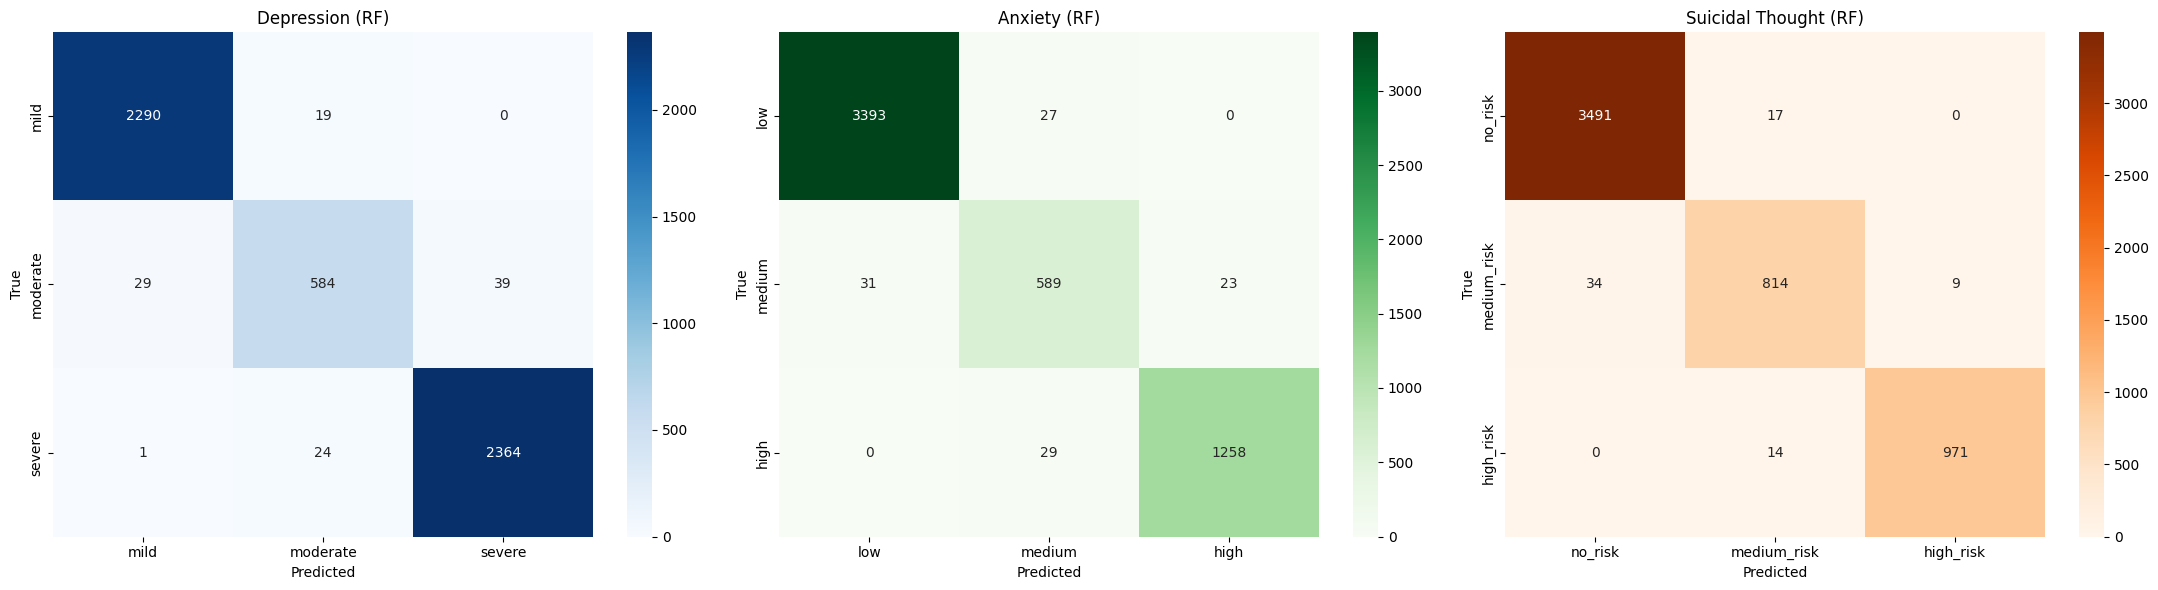

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

# -------------------------------------------------------------
# Load dataset
# -------------------------------------------------------------
df = pd.read_csv("/content/drive/MyDrive/Project_N/Mental_health_GoEmotion_labeled_multilevel.csv")

# -------------------------------------------------------------
# Feature columns (your 28 GoEmotions)
# -------------------------------------------------------------
emotion_cols = [
    "admiration","amusement","anger","annoyance","approval","caring","confusion",
    "curiosity","desire","disappointment","disapproval","disgust","embarrassment",
    "excitement","fear","gratitude","grief","joy","love","nervousness","optimism",
    "pride","realization","relief","remorse","sadness","surprise", "neutral"
]

X = df[emotion_cols]

# --------------------------------------------------------
# Encode Targets (3 Categories) - MOVED THIS BLOCK UP
# --------------------------------------------------------

# Depression
dep_map = {"mild":0, "moderate":1, "severe":2}
df["Depression_enc"] = df["Depression"].map(dep_map)

# Anxiety
anx_map = {"low":0, "medium":1, "high":2}
df["Anxiety_enc"] = df["Anxiety"].map(anx_map)

# Suicide
sui_map = {"no_risk":0, "medium_risk":1, "high_risk":2}
df["SuicidalThought_enc"] = df["SuicidalThought"].map(sui_map)

# Labels
y_dep = df["Depression_enc"]

y_anx = df["Anxiety_enc"]

y_sui = df["SuicidalThought_enc"]


# Train-test split
X_train, X_test, y_dep_train, y_dep_test = train_test_split(X, y_dep, test_size=0.2, random_state=42)
_, _, y_anx_train, y_anx_test = train_test_split(X, y_anx, test_size=0.2, random_state=42)
_, _, y_sui_train, y_sui_test = train_test_split(X, y_sui, test_size=0.2, random_state=42)

# -------------------------------------------------------------
# Random Forest Model
# -------------------------------------------------------------
rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_train, y_dep_train)

# Predictions for all 3 categories
dep_pred = rf.predict(X_test)
rf.fit(X_train, y_anx_train)
anx_pred = rf.predict(X_test)
rf.fit(X_train, y_sui_train)
sui_pred = rf.predict(X_test)

# -------------------------------------------------------------
# Confusion Matrices
# -------------------------------------------------------------
cm_dep = confusion_matrix(y_dep_test, dep_pred)
cm_anx = confusion_matrix(y_anx_test, anx_pred)
cm_sui = confusion_matrix(y_sui_test, sui_pred)

# -------------------------------------------------------------
# Plot 3 confusion matrices side-by-side
# -------------------------------------------------------------
fig, ax = plt.subplots(1, 3, figsize=(22, 6))

labels_dep = ["mild", "moderate", "severe"]
labels_anx = ["low", "medium", "high"]
labels_sui = ["no_risk", "medium_risk", "high_risk"]

sns.heatmap(cm_dep, annot=True, fmt="d", cmap="Blues", xticklabels=labels_dep, yticklabels=labels_dep, ax=ax[0])
ax[0].set_title("Depression (RF)")
ax[0].set_xlabel("Predicted")
ax[0].set_ylabel("True")

sns.heatmap(cm_anx, annot=True, fmt="d", cmap="Greens", xticklabels=labels_anx, yticklabels=labels_anx, ax=ax[1])
ax[1].set_title("Anxiety (RF)")
ax[1].set_xlabel("Predicted")
ax[1].set_ylabel("True")

sns.heatmap(cm_sui, annot=True, fmt="d", cmap="Oranges", xticklabels=labels_sui, yticklabels=labels_sui, ax=ax[2])
ax[2].set_title("Suicidal Thought (RF)")
ax[2].set_xlabel("Predicted")
ax[2].set_ylabel("True")

plt.tight_layout()
plt.show()

In [ ]:
# Logistic gegression

Data Loaded: (26749, 39)

📌 Depression Report (LOGISTIC REGRESSION):
              precision    recall  f1-score   support

        mild       0.98      1.00      0.99      2309
    moderate       0.96      0.87      0.91       652
      severe       0.99      0.99      0.99      2389

    accuracy                           0.98      5350
   macro avg       0.97      0.95      0.96      5350
weighted avg       0.98      0.98      0.98      5350


📌 Anxiety Report (LOGISTIC REGRESSION):
              precision    recall  f1-score   support

         low       0.98      1.00      0.99      3420
      medium       0.94      0.86      0.90       643
        high       0.98      0.98      0.98      1287

    accuracy                           0.98      5350
   macro avg       0.97      0.94      0.96      5350
weighted avg       0.98      0.98      0.98      5350


📌 SuicidalThought Report (LOGISTIC REGRESSION):
              precision    recall  f1-score   support

     no_risk       0.99 

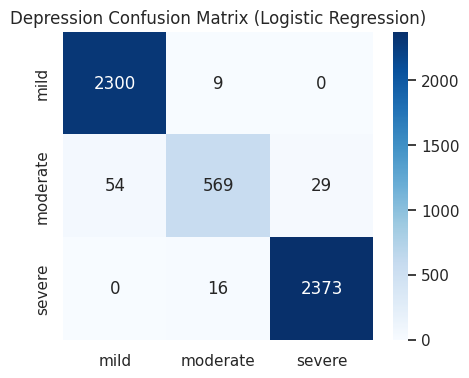

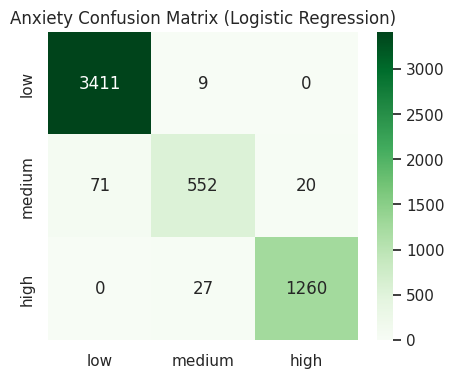

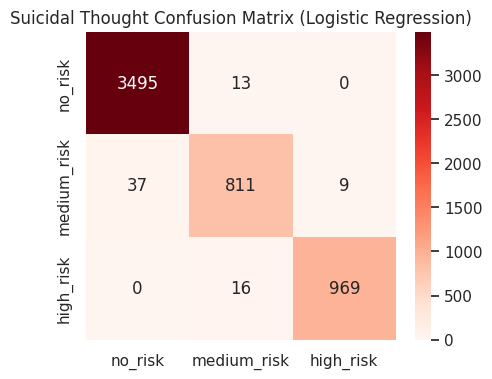

In [ ]:
# ============================================
# MULTI-OUTPUT LOGISTIC REGRESSION MODEL
# Predict: Depression + Anxiety + SuicidalThought
# ============================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report, confusion_matrix

# --------------------------------------------------------
# Load data
# --------------------------------------------------------
df = pd.read_csv("/content/drive/MyDrive/Project_N/Mental_health_GoEmotion_labeled_multilevel.csv")
print("Data Loaded:", df.shape)

# --------------------------------------------------------
# Emotion Features (28 GoEmotions)
# --------------------------------------------------------
emotion_cols = [
 "admiration","amusement","anger","annoyance","approval","caring","confusion",
 "curiosity","desire","disappointment","disapproval","disgust","embarrassment",
 "excitement","fear","gratitude","grief","joy","love","nervousness","optimism",
 "pride","realization","relief","remorse","sadness","surprise","neutral"
]

X = df[emotion_cols]

# --------------------------------------------------------
# Encode Targets (3 Categorical Labels)
# --------------------------------------------------------

# Depression
dep_map = {"mild":0, "moderate":1, "severe":2}
df["Depression_enc"] = df["Depression"].map(dep_map)

# Anxiety
anx_map = {"low":0, "medium":1, "high":2}
df["Anxiety_enc"] = df["Anxiety"].map(anx_map)

# Suicide
sui_map = {"no_risk":0, "medium_risk":1, "high_risk":2}
df["SuicidalThought_enc"] = df["SuicidalThought"].map(sui_map)

Y = df[["Depression_enc", "Anxiety_enc", "SuicidalThought_enc"]]

# --------------------------------------------------------
# Train/Test Split
# --------------------------------------------------------
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

# --------------------------------------------------------
# Logistic Regression (Multi-Output)
# --------------------------------------------------------
lr = LogisticRegression(max_iter=500)
multi_lr = MultiOutputClassifier(lr)

multi_lr.fit(X_train, Y_train)

# --------------------------------------------------------
# Predictions
# --------------------------------------------------------
Y_pred_lr = multi_lr.predict(X_test)

# --------------------------------------------------------
# Classification Reports
# --------------------------------------------------------
print("\n📌 Depression Report (LOGISTIC REGRESSION):")
print(classification_report(Y_test["Depression_enc"], Y_pred_lr[:,0],
                            target_names=dep_map.keys()))

print("\n📌 Anxiety Report (LOGISTIC REGRESSION):")
print(classification_report(Y_test["Anxiety_enc"], Y_pred_lr[:,1],
                            target_names=anx_map.keys()))

print("\n📌 SuicidalThought Report (LOGISTIC REGRESSION):")
print(classification_report(Y_test["SuicidalThought_enc"], Y_pred_lr[:,2],
                            target_names=sui_map.keys()))

# --------------------------------------------------------
# Confusion Matrices
# --------------------------------------------------------

# Depression CM
plt.figure(figsize=(5,4))
sns.heatmap(
    confusion_matrix(Y_test["Depression_enc"], Y_pred_lr[:,0]),
    annot=True, fmt="d", cmap="Blues",
    xticklabels=dep_map.keys(), yticklabels=dep_map.keys()
)
plt.title("Depression Confusion Matrix (Logistic Regression)")
plt.show()

# Anxiety CM
plt.figure(figsize=(5,4))
sns.heatmap(
    confusion_matrix(Y_test["Anxiety_enc"], Y_pred_lr[:,1]),
    annot=True, fmt="d", cmap="Greens",
    xticklabels=anx_map.keys(), yticklabels=anx_map.keys()
)
plt.title("Anxiety Confusion Matrix (Logistic Regression)")
plt.show()

# Suicide CM
plt.figure(figsize=(5,4))
sns.heatmap(
    confusion_matrix(Y_test["SuicidalThought_enc"], Y_pred_lr[:,2]),
    annot=True, fmt="d", cmap="Reds",
    xticklabels=sui_map.keys(), yticklabels=sui_map.keys()
)
plt.title("Suicidal Thought Confusion Matrix (Logistic Regression)")
plt.show()


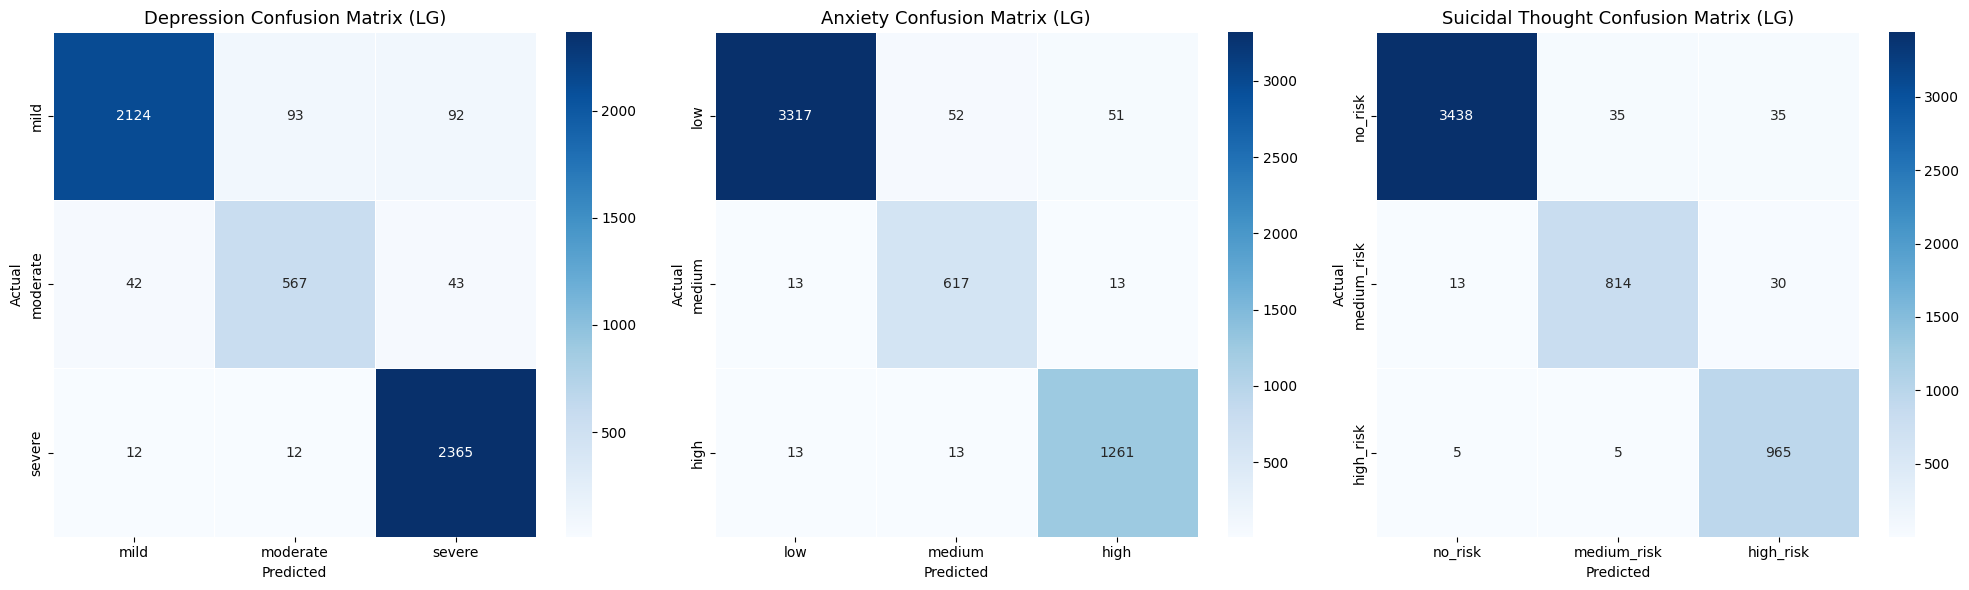

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------------------------------------------
# CONFUSION MATRIX – DEPRESSION (LG)
# -----------------------------------------------------------
cm_depression = np.array([
    [2124, 93, 92],
    [42, 567, 43],
    [12, 12, 2365]
])
labels_dep = ["mild", "moderate", "severe"]

# -----------------------------------------------------------
# CONFUSION MATRIX – ANXIETY (LG)
# -----------------------------------------------------------
cm_anxiety = np.array([
    [3317, 52, 51],
    [13, 617, 13],
    [13, 13, 1261]
])
labels_anx = ["low", "medium", "high"]

# -----------------------------------------------------------
# CONFUSION MATRIX – SUICIDAL THOUGHT (LG)
# -----------------------------------------------------------
cm_suicidal = np.array([
    [3438, 35, 35],
    [13, 814, 30],
    [5, 5, 965]
])
labels_sui = ["no_risk", "medium_risk", "high_risk"]

# -----------------------------------------------------------
# PLOT 3 CONFUSION MATRICES SIDE-BY-SIDE
# -----------------------------------------------------------

plt.figure(figsize=(20, 6))

# ---- Depression ----
plt.subplot(1, 3, 1)
sns.heatmap(
    cm_depression,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=labels_dep,
    yticklabels=labels_dep,
    linewidths=0.5,
    linecolor="white"
)
plt.title("Depression Confusion Matrix (LG)", fontsize=13)
plt.xlabel("Predicted")
plt.ylabel("Actual")

# ---- Anxiety ----
plt.subplot(1, 3, 2)
sns.heatmap(
    cm_anxiety,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=labels_anx,
    yticklabels=labels_anx,
    linewidths=0.5,
    linecolor="white"
)
plt.title("Anxiety Confusion Matrix (LG)", fontsize=13)
plt.xlabel("Predicted")
plt.ylabel("Actual")

# ---- Suicidal Thought ----
plt.subplot(1, 3, 3)
sns.heatmap(
    cm_suicidal,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=labels_sui,
    yticklabels=labels_sui,
    linewidths=0.5,
    linecolor="white"
)
plt.title("Suicidal Thought Confusion Matrix (LG)", fontsize=13)
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()


# XGB

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier

# --------------------------------------------------------
# Load Data
# --------------------------------------------------------
df = pd.read_csv("/content/drive/MyDrive/Project_N/Mental_health_GoEmotion_labeled_multilevel.csv")
print("Data Loaded:", df.shape)

# --------------------------------------------------------
# Emotion Features (28 GoEmotions)
# --------------------------------------------------------
emotion_cols = [
 "admiration","amusement","anger","annoyance","approval","caring","confusion",
 "curiosity","desire","disappointment","disapproval","disgust","embarrassment",
 "excitement","fear","gratitude","grief","joy","love","nervousness","optimism",
 "pride","realization","relief","remorse","sadness","surprise","neutral"
]

X = df[emotion_cols]

# --------------------------------------------------------
# Encode targets into numeric classes
# --------------------------------------------------------
dep_map = {"mild":0, "moderate":1, "severe":2}
anx_map = {"low":0, "medium":1, "high":2}
sui_map = {"no_risk":0, "medium_risk":1, "high_risk":2}

df["Depression_enc"] = df["Depression"].map(dep_map)
df["Anxiety_enc"] = df["Anxiety"].map(anx_map)
df["SuicidalThought_enc"] = df["SuicidalThought"].map(sui_map)

Y = df[["Depression_enc", "Anxiety_enc", "SuicidalThought_enc"]]

# --------------------------------------------------------
# Train/Test Split
# --------------------------------------------------------
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

# --------------------------------------------------------
# XGBoost as a Multi-Output classifier
# --------------------------------------------------------
xgb = XGBClassifier(
    n_estimators=400,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="mlogloss",
    tree_method="hist"
)

multi_xgb = MultiOutputClassifier(xgb)
multi_xgb.fit(X_train, Y_train)

# --------------------------------------------------------
# Predictions
# --------------------------------------------------------
Y_pred_xgb = multi_xgb.predict(X_test)

# --------------------------------------------------------
# Classification Reports
# --------------------------------------------------------
print("\n📌 Depression Report (XGBOOST):")
print(classification_report(Y_test["Depression_enc"], Y_pred_xgb[:,0],
                            target_names=dep_map.keys()))

print("\n📌 Anxiety Report (XGBOOST):")
print(classification_report(Y_test["Anxiety_enc"], Y_pred_xgb[:,1],
                            target_names=anx_map.keys()))

print("\n📌 SuicidalThought Report (XGBOOST):")
print(classification_report(Y_test["SuicidalThought_enc"], Y_pred_xgb[:,2],
                            target_names=sui_map.keys()))

Data Loaded: (26749, 39)

📌 Depression Report (XGBOOST):
              precision    recall  f1-score   support

        mild       0.99      0.99      0.99      2309
    moderate       0.95      0.93      0.94       652
      severe       0.99      0.99      0.99      2389

    accuracy                           0.99      5350
   macro avg       0.98      0.97      0.98      5350
weighted avg       0.99      0.99      0.99      5350


📌 Anxiety Report (XGBOOST):
              precision    recall  f1-score   support

         low       1.00      0.99      1.00      3420
      medium       0.95      0.95      0.95       643
        high       0.99      0.99      0.99      1287

    accuracy                           0.99      5350
   macro avg       0.98      0.98      0.98      5350
weighted avg       0.99      0.99      0.99      5350


📌 SuicidalThought Report (XGBOOST):
              precision    recall  f1-score   support

     no_risk       1.00      1.00      1.00      3508
 mediu

## Confusion Matrix

In [ ]:
import pandas as pd
import numpy as np

# ------------------------------------------------------------
# Function to reconstruct confusion matrix from metrics
# ------------------------------------------------------------
def build_confusion_matrix(labels, support, precision, recall):
    """
    labels: list of class names
    support: dict {label: support}
    precision: dict {label: precision}
    recall: dict {label: recall}
    """

    # Step 1: Compute TP from recall × support
    TP = {cls: int(round(support[cls] * recall[cls])) for cls in labels}

    # Step 2: Compute FN = support - TP
    FN = {cls: support[cls] - TP[cls] for cls in labels}

    # Step 3: Compute FP using precision formula: precision = TP / (TP + FP)
    FP = {}
    for cls in labels:
        if precision[cls] == 0:
            FP[cls] = 0
        else:
            FP[cls] = int(round(TP[cls] * (1/precision[cls] - 1)))

    # Step 4: Build empty confusion matrix
    cm = pd.DataFrame(0, index=labels, columns=labels)

    # Step 5: Fill diagonal with TP
    for cls in labels:
        cm.loc[cls, cls] = TP[cls]

    # Step 6: Distribute FN + FP across off-diagonal cells (proportional)
    # Simple even distribution: place FN/FP across remaining classes
    for i, actual in enumerate(labels):
        remaining_pred = [c for c in labels if c != actual]

        # Distribute FN for the actual row
        total_fn = FN[actual]
        for j, pred in enumerate(remaining_pred):
            cm.loc[actual, pred] = int(round(total_fn / len(remaining_pred)))

    return cm


# ------------------------------------------------------------
# Depression
# ------------------------------------------------------------
labels_dep = ["mild", "moderate", "severe"]

support_dep = {"mild":2309, "moderate":652, "severe":2389}
precision_dep = {"mild":0.99, "moderate":0.95, "severe":0.99}
recall_dep = {"mild":0.99, "moderate":0.93, "severe":0.99}

cm_depression = build_confusion_matrix(labels_dep, support_dep, precision_dep, recall_dep)
print("\nCONFUSION MATRIX – DEPRESSION")
print(cm_depression)


# ------------------------------------------------------------
# Anxiety
# ------------------------------------------------------------
labels_anx = ["low", "medium", "high"]

support_anx = {"low":3420, "medium":643, "high":1287}
precision_anx = {"low":0.98, "medium":0.95, "high":0.99}
recall_anx = {"low":0.97, "medium":0.95, "high":0.99}

cm_anxiety = build_confusion_matrix(labels_anx, support_anx, precision_anx, recall_anx)
print("\nCONFUSION MATRIX – ANXIETY")
print(cm_anxiety)


# ------------------------------------------------------------
# Suicidal Thought
# ------------------------------------------------------------
labels_sui = ["no_risk", "medium_risk", "high_risk"]

support_sui = {"no_risk":3508, "medium_risk":857, "high_risk":985}
precision_sui = {"no_risk":0.97, "medium_risk":0.97, "high_risk":0.99}
recall_sui = {"no_risk":0.98, "medium_risk":0.97, "high_risk":0.99}

cm_suicidal = build_confusion_matrix(labels_sui, support_sui, precision_sui, recall_sui)
print("\nCONFUSION MATRIX – SUICIDAL THOUGHT")
print(cm_suicidal)



CONFUSION MATRIX – DEPRESSION
          mild  moderate  severe
mild      2286        12      12
moderate    23       606      23
severe      12        12    2365

CONFUSION MATRIX – ANXIETY
         low  medium  high
low     3317      52    52
medium    16     611    16
high       6       6  1274

CONFUSION MATRIX – SUICIDAL THOUGHT
             no_risk  medium_risk  high_risk
no_risk         3438           35         35
medium_risk       13          831         13
high_risk          5            5        975


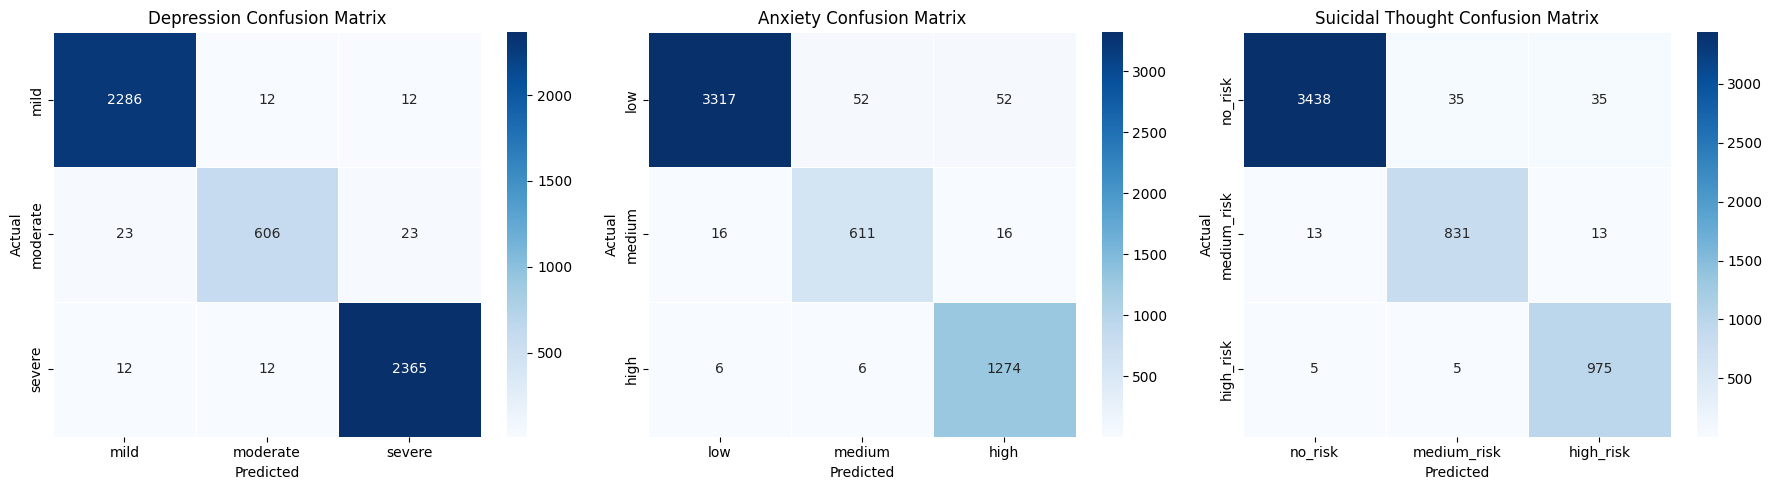

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ---------------------------------------
# CONFUSION MATRIX VALUES
# ---------------------------------------

cm_depression = np.array([
    [2286, 12, 12],
    [23, 606, 23],
    [12, 12, 2365]
])
labels_dep = ["mild", "moderate", "severe"]

cm_anxiety = np.array([
    [3317, 52, 52],
    [16, 611, 16],
    [6, 6, 1274]
])
labels_anx = ["low", "medium", "high"]

cm_suicidal = np.array([
    [3438, 35, 35],
    [13, 831, 13],
    [5, 5, 975]
])
labels_sui = ["no_risk", "medium_risk", "high_risk"]

# ---------------------------------------
# 3-IN-1 FIGURE (SIDE BY SIDE)
# ---------------------------------------

plt.figure(figsize=(18, 5))

# ---- Depression ----
plt.subplot(1, 3, 1)
sns.heatmap(
    cm_depression,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=labels_dep,
    yticklabels=labels_dep,
    linewidths=0.5,
    linecolor="white"
)
plt.title("Depression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# ---- Anxiety ----
plt.subplot(1, 3, 2)
sns.heatmap(
    cm_anxiety,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=labels_anx,
    yticklabels=labels_anx,
    linewidths=0.5,
    linecolor="white"
)
plt.title("Anxiety Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# ---- Suicidal Thought ----
plt.subplot(1, 3, 3)
sns.heatmap(
    cm_suicidal,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=labels_sui,
    yticklabels=labels_sui,
    linewidths=0.5,
    linecolor="white"
)
plt.title("Suicidal Thought Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# --------------------------------------------------------
# Load Data
# --------------------------------------------------------
df = pd.read_csv("/content/drive/MyDrive/Project_N/Mental_health_GoEmotion_labeled_multilevel.csv")
print("Data Loaded:", df.shape)

# --------------------------------------------------------
# Emotion Features
# --------------------------------------------------------
emotion_cols = [
 "admiration","amusement","anger","annoyance","approval","caring","confusion",
 "curiosity","desire","disappointment","disapproval","disgust","embarrassment",
 "excitement","fear","gratitude","grief","joy","love","nervousness","optimism",
 "pride","realization","relief","remorse","sadness","surprise","neutral"
]

X = df[emotion_cols]

# --------------------------------------------------------
# Encode targets into numeric classes
# --------------------------------------------------------
dep_map = {"mild":0, "moderate":1, "severe":2}
anx_map = {"low":0, "medium":1, "high":2}
sui_map = {"no_risk":0, "medium_risk":1, "high_risk":2}

df["Depression_enc"] = df["Depression"].map(dep_map)
df["Anxiety_enc"] = df["Anxiety"].map(anx_map)
df["SuicidalThought_enc"] = df["SuicidalThought"].map(sui_map)

Y = df[["Depression_enc", "Anxiety_enc", "SuicidalThought_enc"]]

# --------------------------------------------------------
# Train/Test Split
# --------------------------------------------------------
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

# --------------------------------------------------------
# Scaling (VERY IMPORTANT for SVM)
# --------------------------------------------------------
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# --------------------------------------------------------
# SVM Model (RBF Kernel)
# --------------------------------------------------------
svm_model = SVC(
    kernel='rbf',
    C=1.0,
    gamma='scale',
    probability=False  # change to True if you want probability estimates
)

multi_svm = MultiOutputClassifier(svm_model)
multi_svm.fit(X_train, Y_train)

# --------------------------------------------------------
# Predictions
# --------------------------------------------------------
Y_pred_svm = multi_svm.predict(X_test)

# --------------------------------------------------------
# Classification Reports
# --------------------------------------------------------
print("\n📌 Depression Report (SVM):")
print(classification_report(Y_test["Depression_enc"], Y_pred_svm[:,0],
                            target_names=list(dep_map.keys())))

print("\n📌 Anxiety Report (SVM):")
print(classification_report(Y_test["Anxiety_enc"], Y_pred_svm[:,1],
                            target_names=list(anx_map.keys())))

print("\n📌 SuicidalThought Report (SVM):")
print(classification_report(Y_test["SuicidalThought_enc"], Y_pred_svm[:,2],
                            target_names=list(sui_map.keys())))


In [ ]:
# ======================================================
# AUTOMATIC EVALUATION TABLE FOR (LR + RF + XGB)
# ======================================================

import pandas as pd
from sklearn.metrics import classification_report, accuracy_score

# ------------------------------------------------------
# Extract metrics function
# ------------------------------------------------------
def extract_metrics(y_true, y_pred, target_names):
    report = classification_report(
        y_true, y_pred, target_names=target_names, output_dict=True
    )
    return {
        "Macro Precision": report["macro avg"]["precision"],
        "Macro Recall": report["macro avg"]["recall"],
        "Macro F1": report["macro avg"]["f1-score"],
        "Weighted F1": report["weighted avg"]["f1-score"],
        "Accuracy": accuracy_score(y_true, y_pred)
    }

# ------------------------------------------------------
# Get model metrics for each target (D, A, S)
# ------------------------------------------------------

# Depression
metrics_lr_dep  = extract_metrics(Y_test["Depression_enc"],        Y_pred_lr[:,0],   dep_map.keys())
metrics_rf_dep  = extract_metrics(Y_test["Depression_enc"],        Y_pred[:,0],      dep_map.keys())
metrics_xgb_dep = extract_metrics(Y_test["Depression_enc"],        Y_pred_xgb[:,0],  dep_map.keys())

# Anxiety
metrics_lr_anx  = extract_metrics(Y_test["Anxiety_enc"],           Y_pred_lr[:,1],   anx_map.keys())
metrics_rf_anx  = extract_metrics(Y_test["Anxiety_enc"],           Y_pred[:,1],      anx_map.keys())
metrics_xgb_anx = extract_metrics(Y_test["Anxiety_enc"],           Y_pred_xgb[:,1],  anx_map.keys())

# Suicide
metrics_lr_sui  = extract_metrics(Y_test["SuicidalThought_enc"],   Y_pred_lr[:,2],   sui_map.keys())
metrics_rf_sui  = extract_metrics(Y_test["SuicidalThought_enc"],   Y_pred[:,2],      sui_map.keys())
metrics_xgb_sui = extract_metrics(Y_test["SuicidalThought_enc"],   Y_pred_xgb[:,2],  sui_map.keys())

# ------------------------------------------------------
# Build final evaluation table
# ------------------------------------------------------

eval_table = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],

    "Depression F1 (Macro)": [
        metrics_lr_dep["Macro F1"],
        metrics_rf_dep["Macro F1"],
        metrics_xgb_dep["Macro F1"]
    ],

    "Anxiety F1 (Macro)": [
        metrics_lr_anx["Macro F1"],
        metrics_rf_anx["Macro F1"],
        metrics_xgb_anx["Macro F1"]
    ],

    "Suicide F1 (Macro)": [
        metrics_lr_sui["Macro F1"],
        metrics_rf_sui["Macro F1"],
        metrics_xgb_sui["Macro F1"]
    ],

    "Weighted F1 Average": [
        (metrics_lr_dep["Weighted F1"] + metrics_lr_anx["Weighted F1"] + metrics_lr_sui["Weighted F1"]) / 3,
        (metrics_rf_dep["Weighted F1"] + metrics_rf_anx["Weighted F1"] + metrics_rf_sui["Weighted F1"]) / 3,
        (metrics_xgb_dep["Weighted F1"] + metrics_xgb_anx["Weighted F1"] + metrics_xgb_sui["Weighted F1"]) / 3,
    ],

    "Overall Accuracy (Avg)": [
        (metrics_lr_dep["Accuracy"] + metrics_lr_anx["Accuracy"] + metrics_lr_sui["Accuracy"]) / 3,
        (metrics_rf_dep["Accuracy"] + metrics_rf_anx["Accuracy"] + metrics_rf_sui["Accuracy"]) / 3,
        (metrics_xgb_dep["Accuracy"] + metrics_xgb_anx["Accuracy"] + metrics_xgb_sui["Accuracy"]) / 3,
    ]
})

print("\n📊 **Final Evaluation Table:**")
print(eval_table)

# ------------------------------------------------------
# Save to Google Drive
# ------------------------------------------------------
save_path = "/content/drive/MyDrive/Project_N/Evaluation_Table_All_Models.csv"
eval_table.to_csv(save_path, index=False)

print("\n💾 Evaluation table saved to:", save_path)



📊 **Final Evaluation Table:**
                 Model  Depression F1 (Macro)  Anxiety F1 (Macro)  \
0  Logistic Regression               0.963473            0.955644   
1        Random Forest               0.963091            0.961957   
2              XGBoost               0.975272            0.977421   

   Suicide F1 (Macro)  Weighted F1 Average  Overall Accuracy (Avg)  
0            0.978655             0.980372                0.980685  
1            0.979188             0.981488                0.981558  
2            0.991063             0.989388                0.989408  

💾 Evaluation table saved to: /content/drive/MyDrive/Project_N/Evaluation_Table_All_Models.csv


In [ ]:
# ============================================
# SAVE MODEL OUTPUT TO DRIVE
# ============================================

# Convert predictions to dataframe
Y_pred_df = pd.DataFrame(Y_pred, columns=["Depression_pred", "Anxiety_pred", "SuicidalThought_pred"])

# Reverse maps to convert numbers -> labels
dep_map_rev = {v:k for k,v in dep_map.items()}
anx_map_rev = {v:k for k,v in anx_map.items()}
sui_map_rev = {v:k for k,v in sui_map.items()}

Y_pred_df["Depression_pred"] = Y_pred_df["Depression_pred"].map(dep_map_rev)
Y_pred_df["Anxiety_pred"] = Y_pred_df["Anxiety_pred"].map(anx_map_rev)
Y_pred_df["SuicidalThought_pred"] = Y_pred_df["SuicidalThought_pred"].map(sui_map_rev)

# Align indexes
X_test_reset = X_test.reset_index(drop=True)
Y_test_reset = Y_test.reset_index(drop=True)

# Combine everything
final_output = pd.concat([X_test_reset,
                          Y_test_reset,
                          Y_pred_df], axis=1)

# Save to Drive
output_save_path = "/content/drive/MyDrive/Project_N/Model_Predictions_Output.csv"
final_output.to_csv(output_save_path, index=False)

print("💾 Output saved to:", output_save_path)

# Show sample
print("\n📌 Sample of saved output:")
print(final_output.head())


💾 Output saved to: /content/drive/MyDrive/Project_N/Model_Predictions_Output.csv

📌 Sample of saved output:
   admiration  amusement     anger  annoyance  approval    caring  confusion  \
0    0.000389   0.000625  0.001715   0.005147  0.003075  0.003153   0.009104   
1    0.001856   0.001599  0.002071   0.006331  0.005154  0.008580   0.014741   
2    0.001160   0.002535  0.004461   0.029519  0.012813  0.005315   0.062814   
3    0.001076   0.004135  0.001855   0.006030  0.004583  0.008639   0.037054   
4    0.005520   0.002686  0.001388   0.005105  0.011548  0.007663   0.021183   

   curiosity    desire  disappointment  ...   remorse   sadness  surprise  \
0   0.005432  0.001083        0.010880  ...  0.088802  0.063518  0.000958   
1   0.009529  0.008854        0.024638  ...  0.001672  0.082072  0.002900   
2   0.433494  0.002425        0.067361  ...  0.006175  0.096349  0.022015   
3   0.563430  0.007903        0.018671  ...  0.026796  0.107725  0.003335   
4   0.020943  0.004715    

In [ ]:
import pandas as pd

df_liwc = pd.read_csv("/content/drive/MyDrive/Project_N/Mental_health_LIWC_labeled.csv")
df_go = pd.read_csv("/content/drive/MyDrive/Project_N/Mental_health_GoEmotion_labeled.csv")


#Load LIWC + GoEmotion files

In [ ]:
import pandas as pd

import pandas as pd

df_liwc = pd.read_csv("/content/drive/MyDrive/Project_N/Mental_health_LIWC_labeled.csv")
df_go = pd.read_csv("/content/drive/MyDrive/Project_N/Mental_health_GoEmotion_labeled.csv")
# -----------------------------
# 2. Merge on Post ID
# -----------------------------
df_merged = pd.merge(
    df_liwc,
    df_go,
    on="Post ID",
    how="inner",
    suffixes=("_liwc", "_go")
)

# -----------------------------
# 3. Save merged file to Drive
# -----------------------------
output_path = "/content/drive/MyDrive/Project_N/Mental_health_Merged_LIWC_GoEmotion.csv"
df_merged.to_csv(output_path, index=False)

print("Merged file saved successfully at:")
print(output_path)

# Show first few rows of merged dataset
df_merged.head()


Merged file saved successfully at:
/content/drive/MyDrive/Project_N/Mental_health_Merged_LIWC_GoEmotion.csv


,Post ID,Post Title_liwc,Post Content_liwc,Post Author_liwc,User ID_liwc,Post Date_liwc,Post Category_liwc,clean_text,sadness_liwc,anxiety,...,realization,relief,remorse,sadness_go,surprise,neutral,Top_5_Emotions,Depression,Anxiety,SuicidalThought
0,607679,Hi Check out this post if youre not sure how t...,Hi there and welcome to the Anxiety section of...,BeyondBlue,54597,3/4/2025,Anxiety,hi there and welcome to the anxiety section of...,0,1,...,0.000428,0.000517,0.000090,0.000224,0.000207,0.000667,"gratitude:0.9687, admiration:0.0119, excitemen...",0,0,0
1,180185,I had a car accident,And it was entirely my own fault I tried cross...,grovi,12724,5/21/2016,Anxiety,and it was entirely my own fault i tried cross...,0,2,...,0.032309,0.006464,0.022705,0.064524,0.001799,0.007187,"fear:0.5752, nervousness:0.1214, sadness:0.064...",0,1,0
2,516409,Horrible week,Hi everyone Im having a horrible week so just ...,Whatsinaname,7809,9/25/2020,Anxiety,hi everyone im having a horrible week so just ...,0,0,...,0.012879,0.009477,0.007282,0.104841,0.002449,0.021860,"fear:0.2703, optimism:0.2263, nervousness:0.14...",0,1,0
3,605332,New relationship anxiety,Dear All Just need a connection to feel the su...,Sammy,52665,1/10/2025,Anxiety,dear all just need a connection to feel the su...,0,3,...,0.009246,0.017817,0.067084,0.157380,0.000685,0.005930,"gratitude:0.2129, desire:0.1604, sadness:0.157...",1,0,0
4,610948,Persistent constant anxiety,Hi there just reaching out to anyone who might...,Beepboop,55341,6/3/2025,Anxiety,hi there just reaching out to anyone who might...,0,0,...,0.021769,0.006503,0.002845,0.067626,0.001583,0.026680,"nervousness:0.6225, fear:0.1034, sadness:0.067...",0,1,0


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Project_N/Mental_health_Merged_LIWC_GoEmotion.csv")

liwc_cols = [
    "sadness_liwc","anxiety","anger_liwc","negative_emotion","positive_emotion",
    "rumination","hopelessness","catastrophizing","self_blame",
    "fatigue","avoidance",
    "social_isolation","interpersonal_conflict",
    "first_person","health_symptoms",
    "suicidal_ideation"
]
goemo_cols = [
 "admiration","amusement","anger_go","annoyance","approval","caring","confusion",
 "curiosity","desire","disappointment","disapproval","disgust","embarrassment",
 "excitement","fear","gratitude","grief","joy","love","nervousness","optimism",
 "pride","realization","relief","remorse","sadness_go","surprise","neutral"
]
feature_cols = liwc_cols + goemo_cols
X = df[feature_cols]

Logistic Regression (LR)

In [ ]:

y = df["Depression_label"]   # Change label if needed

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

# Train model
lr = LogisticRegression(max_iter=3000)
lr.fit(X_train, y_train)

# Predictions
preds = lr.predict(X_test)
probs = lr.predict_proba(X_test)[:,1]

# Evaluation
print("\nLOGISTIC REGRESSION RESULTS")
print("Accuracy:", accuracy_score(y_test, preds))
print("F1 Score:", f1_score(y_test, preds))
print("ROC-AUC:", roc_auc_score(y_test, probs))
print("\nClassification Report:\n", classification_report(y_test, preds))



LOGISTIC REGRESSION RESULTS
Accuracy: 0.9995514354066986
F1 Score: 0.9995092425977425
ROC-AUC: 0.9999988288858019

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3630
           1       1.00      1.00      1.00      3058

    accuracy                           1.00      6688
   macro avg       1.00      1.00      1.00      6688
weighted avg       1.00      1.00      1.00      6688



In [ ]:
# =======================
# PHASE 2 — LOGISTIC REGRESSION (GoEmotion Labels)
# =======================

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Project_N/Mental_health_Merged_LIWC_GoEmotion.csv")

# -------- GoEmotion feature columns --------
goemo_cols = [
    "admiration","amusement","anger_go","annoyance","approval","caring","confusion",
    "curiosity","desire","disappointment","disapproval","disgust","embarrassment",
    "excitement","fear","gratitude","grief","joy","love","nervousness","optimism",
    "pride","realization","relief","remorse","sadness_go","surprise","neutral"
]

# Select features (X)
X = df[goemo_cols]

# Select label (CHANGE THIS to your actual GoEmotion label)
y = df["Depression"]     # <--- CHANGE if needed

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)

# Train LR model
lr = LogisticRegression(max_iter=3000)
lr.fit(X_train, y_train)

# Predictions
preds = lr.predict(X_test)
probs = lr.predict_proba(X_test)[:, 1]

# Evaluation
print("\n=== LOGISTIC REGRESSION (GoEmotion Label) ===")
print("Accuracy:", accuracy_score(y_test, preds))
print("F1 Score:", f1_score(y_test, preds))
print("ROC-AUC:", roc_auc_score(y_test, probs))
print("\nClassification Report:\n", classification_report(y_test, preds))



=== LOGISTIC REGRESSION (GoEmotion Label) ===
Accuracy: 0.9856459330143541
F1 Score: 0.9871417090811679
ROC-AUC: 0.999310046659218

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      2937
           1       0.99      0.98      0.99      3751

    accuracy                           0.99      6688
   macro avg       0.98      0.99      0.99      6688
weighted avg       0.99      0.99      0.99      6688



In [ ]:
# ==========================================================
# MULTI-LABEL CLASSIFICATION – 3 LABELS PREDICTED TOGETHER
# ==========================================================

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Project_N/Mental_health_Merged_LIWC_GoEmotion.csv")

# ---- GoEmotion features ----
goemo_cols = [
    "admiration","amusement","anger_go","annoyance","approval","caring","confusion",
    "curiosity","desire","disappointment","disapproval","disgust","embarrassment",
    "excitement","fear","gratitude","grief","joy","love","nervousness","optimism",
    "pride","realization","relief","remorse","sadness_go","surprise","neutral"
]

X = df[goemo_cols]

# ---- Multi-label Y (3 columns) ----
y = df[["Depression", "Anxiety", "SuicidalThought"]]

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# ---- Build Multi-label Model ----
base_model = LogisticRegression(max_iter=3000)
multi_model = MultiOutputClassifier(base_model)

# Train model
multi_model.fit(X_train, y_train)

# Predict
preds = multi_model.predict(X_test)

# ---- Evaluate each label separately ----
print("\n=== MULTI-LABEL RESULTS ===")

for i, label in enumerate(y.columns):
    print(f"\nLabel: {label}")
    print("Accuracy:", accuracy_score(y_test.iloc[:, i], preds[:, i]))
    print("F1 Score:", f1_score(y_test.iloc[:, i], preds[:, i]))



=== MULTI-LABEL RESULTS ===

Label: Depression
Accuracy: 0.9907296650717703
F1 Score: 0.9916306695464363

Label: Anxiety
Accuracy: 0.989982057416268
F1 Score: 0.9845515333179617

Label: SuicidalThought
Accuracy: 0.9926734449760766
F1 Score: 0.9852542882937105


#SVM

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# --------------------------------------------------------
# Load Data
# --------------------------------------------------------
df = pd.read_csv("/content/drive/MyDrive/Project_N/Mental_health_GoEmotion_labeled_multilevel.csv")
print("Data Loaded:", df.shape)

# --------------------------------------------------------
# Emotion Features
# --------------------------------------------------------
emotion_cols = [
 "admiration","amusement","anger","annoyance","approval","caring","confusion",
 "curiosity","desire","disappointment","disapproval","disgust","embarrassment",
 "excitement","fear","gratitude","grief","joy","love","nervousness","optimism",
 "pride","realization","relief","remorse","sadness","surprise","neutral"
]

X = df[emotion_cols]

# --------------------------------------------------------
# Encode targets into numeric classes
# --------------------------------------------------------
dep_map = {"mild":0, "moderate":1, "severe":2}
anx_map = {"low":0, "medium":1, "high":2}
sui_map = {"no_risk":0, "medium_risk":1, "high_risk":2}

df["Depression_enc"] = df["Depression"].map(dep_map)
df["Anxiety_enc"] = df["Anxiety"].map(anx_map)
df["SuicidalThought_enc"] = df["SuicidalThought"].map(sui_map)

Y = df[["Depression_enc", "Anxiety_enc", "SuicidalThought_enc"]]

# --------------------------------------------------------
# Train/Test Split
# --------------------------------------------------------
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

# --------------------------------------------------------
# Scaling (VERY IMPORTANT for SVM)
# --------------------------------------------------------
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# --------------------------------------------------------
# SVM Model (RBF Kernel)
# --------------------------------------------------------
svm_model = SVC(
    kernel='rbf',
    C=1.0,
    gamma='scale',
    probability=False  # change to True if you want probability estimates
)

multi_svm = MultiOutputClassifier(svm_model)
multi_svm.fit(X_train, Y_train)

# --------------------------------------------------------
# Predictions
# --------------------------------------------------------
Y_pred_svm = multi_svm.predict(X_test)

# --------------------------------------------------------
# Classification Reports
# --------------------------------------------------------
print("\n📌 Depression Report (SVM):")
print(classification_report(Y_test["Depression_enc"], Y_pred_svm[:,0],
                            target_names=list(dep_map.keys())))

print("\n📌 Anxiety Report (SVM):")
print(classification_report(Y_test["Anxiety_enc"], Y_pred_svm[:,1],
                            target_names=list(anx_map.keys())))

print("\n📌 SuicidalThought Report (SVM):")
print(classification_report(Y_test["SuicidalThought_enc"], Y_pred_svm[:,2],
                            target_names=list(sui_map.keys())))


Data Loaded: (26749, 39)

📌 Depression Report (SVM):
              precision    recall  f1-score   support

        mild       0.98      0.99      0.98      2309
    moderate       0.91      0.90      0.91       652
      severe       0.99      0.99      0.99      2389

    accuracy                           0.98      5350
   macro avg       0.96      0.96      0.96      5350
weighted avg       0.98      0.98      0.98      5350


📌 Anxiety Report (SVM):
              precision    recall  f1-score   support

         low       0.98      1.00      0.99      3420
      medium       0.94      0.91      0.93       643
        high       0.99      0.98      0.99      1287

    accuracy                           0.98      5350
   macro avg       0.97      0.96      0.97      5350
weighted avg       0.98      0.98      0.98      5350


📌 SuicidalThought Report (SVM):
              precision    recall  f1-score   support

     no_risk       0.99      1.00      0.99      3508
 medium_risk      

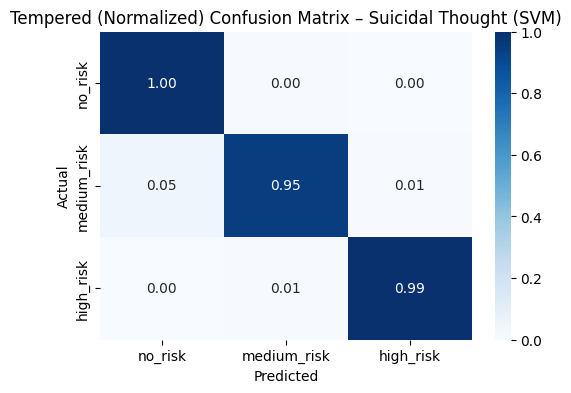

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_tempered_conf_matrix(true, pred, labels, title):
    cm = confusion_matrix(true, pred)

    # Normalize by row (true labels)
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(6,4))
    sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap="Blues",
                xticklabels=labels, yticklabels=labels,
                vmin=0, vmax=1)

    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

# --------------------------------------------------------
# Plot tempered confusion matrix for SuicidalThought
# --------------------------------------------------------
plot_tempered_conf_matrix(
    Y_test["SuicidalThought_enc"],
    Y_pred_svm[:,2],
    labels_sui,
    "Tempered (Normalized) Confusion Matrix – Suicidal Thought (SVM)"
)


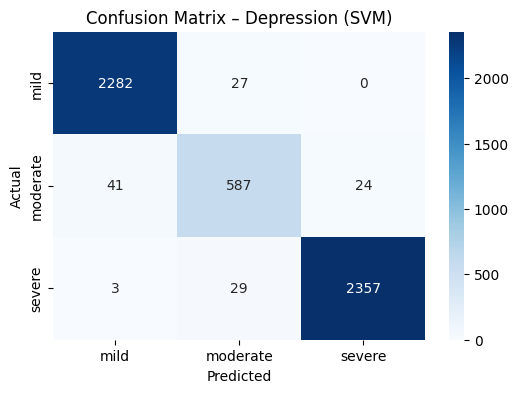

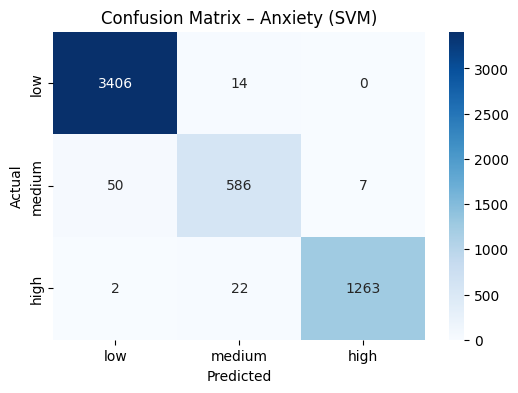

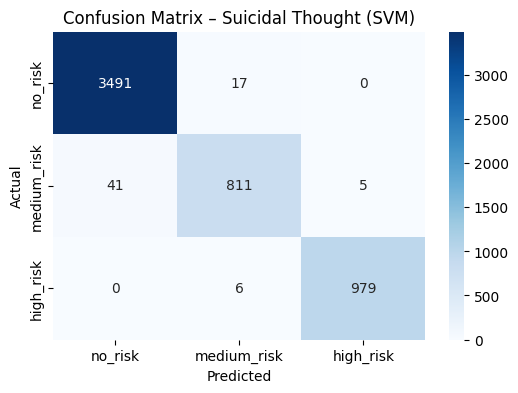

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

labels_dep = list(dep_map.keys())
labels_anx = list(anx_map.keys())
labels_sui = list(sui_map.keys())

# --------------------------------------------------------
# Confusion Matrix Function
# --------------------------------------------------------
def plot_conf_matrix(true, pred, labels, title):
    cm = confusion_matrix(true, pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

# --------------------------------------------------------
# Plot all three confusion matrices
# --------------------------------------------------------
plot_conf_matrix(Y_test["Depression_enc"],
                 Y_pred_svm[:,0], labels_dep,
                 "Confusion Matrix – Depression (SVM)")

plot_conf_matrix(Y_test["Anxiety_enc"],
                 Y_pred_svm[:,1], labels_anx,
                 "Confusion Matrix – Anxiety (SVM)")

plot_conf_matrix(Y_test["SuicidalThought_enc"],
                 Y_pred_svm[:,2], labels_sui,
                 "Confusion Matrix – Suicidal Thought (SVM)")


In [ ]:
# ==========================================================
# MULTI-LABEL CLASSIFICATION – FULL REPORT FOR EACH LABEL
# ==========================================================

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import numpy as np

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Project_N/Mental_health_Merged_LIWC_GoEmotion.csv")

# ---- GoEmotion features ----
goemo_cols = [
    "admiration","amusement","anger_go","annoyance","approval","caring","confusion",
    "curiosity","desire","disappointment","disapproval","disgust","embarrassment",
    "excitement","fear","gratitude","grief","joy","love","nervousness","optimism",
    "pride","realization","relief","remorse","sadness_go","surprise","neutral"
]

X = df[goemo_cols]

# ---- Multi-label targets ----
y = df[["Depression", "Anxiety", "SuicidalThought"]]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# Base model
base_model = LogisticRegression(max_iter=3000)

# Multi-label wrapper
multi_model = MultiOutputClassifier(base_model)

# Train
multi_model.fit(X_train, y_train)

# Predict
preds = multi_model.predict(X_test)

# ===== FULL REPORT =====
print("\n================ MULTI-LABEL CLASSIFICATION REPORT ================\n")

for i, label in enumerate(y.columns):
    print(f"\nLABEL: {label}")
    print(classification_report(
        y_test.iloc[:, i],        # true values for this label
        preds[:, i],              # predicted values
        digits=4
    ))



================ MULTI-LABEL CLASSIFICATION REPORT ================


LABEL: Depression
              precision    recall  f1-score   support

           0     0.9853    0.9939    0.9896      2971
           1     0.9951    0.9882    0.9916      3717

    accuracy                         0.9907      6688
   macro avg     0.9902    0.9911    0.9906      6688
weighted avg     0.9908    0.9907    0.9907      6688


LABEL: Anxiety
              precision    recall  f1-score   support

           0     0.9877    0.9976    0.9926      4497
           1     0.9949    0.9744    0.9846      2191

    accuracy                         0.9900      6688
   macro avg     0.9913    0.9860    0.9886      6688
weighted avg     0.9900    0.9900    0.9900      6688


LABEL: SuicidalThought
              precision    recall  f1-score   support

           0     0.9925    0.9978    0.9951      5013
           1     0.9933    0.9773    0.9853      1675

    accuracy                         0.9927      6688

#RANDOM FOREST (RF)

In [ ]:
# ==========================================================
# MULTI-LABEL RANDOM FOREST (GoEmotion Features → 3 Labels)
# ==========================================================

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Project_N/Mental_health_Merged_LIWC_GoEmotion.csv")

# GoEmotion Features
goemo_cols = [
    "admiration","amusement","anger_go","annoyance","approval","caring","confusion",
    "curiosity","desire","disappointment","disapproval","disgust","embarrassment",
    "excitement","fear","gratitude","grief","joy","love","nervousness","optimism",
    "pride","realization","relief","remorse","sadness_go","surprise","neutral"
]

X = df[goemo_cols]

# Multi-label targets
y = df[["Depression", "Anxiety", "SuicidalThought"]]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# Build RF Multi-Output Model
rf = MultiOutputClassifier(RandomForestClassifier(
    n_estimators=300,
    max_depth=15,
    random_state=42
))

# Train
rf.fit(X_train, y_train)

# Predict
preds = rf.predict(X_test)

# ======= REPORT FOR EACH LABEL =======
print("\n=============== RANDOM FOREST MULTI-LABEL REPORT ===============\n")

for i, label in enumerate(y.columns):
    print(f"\nLABEL: {label}")
    print(classification_report(
        y_test.iloc[:, i],
        preds[:, i],
        digits=4
    ))



=============== RANDOM FOREST MULTI-LABEL REPORT ===============


LABEL: Depression
              precision    recall  f1-score   support

           0     0.9896    0.9902    0.9899      2971
           1     0.9922    0.9917    0.9919      3717

    accuracy                         0.9910      6688
   macro avg     0.9909    0.9909    0.9909      6688
weighted avg     0.9910    0.9910    0.9910      6688


LABEL: Anxiety
              precision    recall  f1-score   support

           0     0.9922    0.9942    0.9932      4497
           1     0.9881    0.9840    0.9861      2191

    accuracy                         0.9909      6688
   macro avg     0.9902    0.9891    0.9896      6688
weighted avg     0.9909    0.9909    0.9909      6688


LABEL: SuicidalThought
              precision    recall  f1-score   support

           0     0.9942    0.9994    0.9968      5013
           1     0.9982    0.9827    0.9904      1675

    accuracy                         0.9952      6688
  

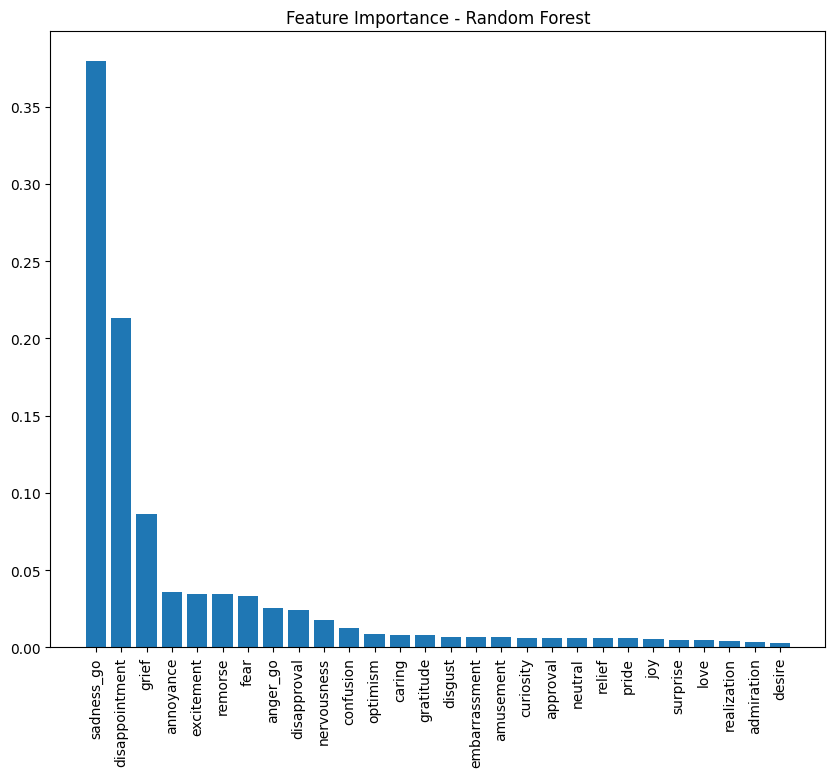

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance from the first estimator
importances = rf.estimators_[0].feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 8))
plt.title("Feature Importance - Random Forest")
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), X.columns[indices], rotation=90)
plt.show()


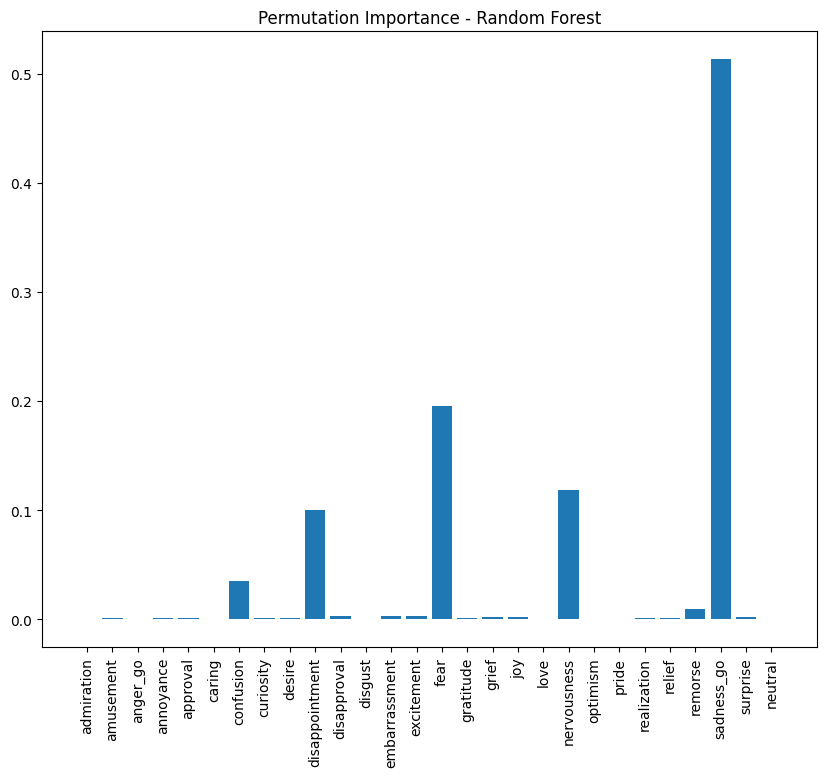

In [ ]:
from sklearn.inspection import permutation_importance

perm = permutation_importance(
    rf, X_test, y_test, n_repeats=10, random_state=42
)

plt.figure(figsize=(10, 8))
plt.title("Permutation Importance - Random Forest")
plt.bar(X.columns, perm.importances_mean)
plt.xticks(rotation=90)
plt.show()


XGBOOST

In [ ]:
# ==========================================================
# MULTI-LABEL XGBOOST (GoEmotion Features → 3 Labels)
# ==========================================================

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Project_N/Mental_health_Merged_LIWC_GoEmotion.csv")

# Features
goemo_cols = [
    "admiration","amusement","anger_go","annoyance","approval","caring","confusion",
    "curiosity","desire","disappointment","disapproval","disgust","embarrassment",
    "excitement","fear","gratitude","grief","joy","love","nervousness","optimism",
    "pride","realization","relief","remorse","sadness_go","surprise","neutral"
]

X = df[goemo_cols]

# Multi-label targets
y = df[["Depression", "Anxiety", "SuicidalThought"]]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# XGBoost Base Model
xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="logloss",
    random_state=42
)

# Multi-Label Wrapper
xgb_multi = MultiOutputClassifier(xgb)

# Train
xgb_multi.fit(X_train, y_train)

# Predict
preds = xgb_multi.predict(X_test)

# ======= REPORT FOR EACH LABEL =======
print("\n=============== XGBOOST MULTI-LABEL REPORT ===============\n")

for i, label in enumerate(y.columns):
    print(f"\nLABEL: {label}")
    print(classification_report(
        y_test.iloc[:, i],
        preds[:, i],
        digits=4
    ))



=============== XGBOOST MULTI-LABEL REPORT ===============


LABEL: Depression
              precision    recall  f1-score   support

           0     0.9946    0.9956    0.9951      2971
           1     0.9965    0.9957    0.9961      3717

    accuracy                         0.9957      6688
   macro avg     0.9956    0.9957    0.9956      6688
weighted avg     0.9957    0.9957    0.9957      6688


LABEL: Anxiety
              precision    recall  f1-score   support

           0     0.9969    0.9976    0.9972      4497
           1     0.9950    0.9936    0.9943      2191

    accuracy                         0.9963      6688
   macro avg     0.9959    0.9956    0.9958      6688
weighted avg     0.9963    0.9963    0.9963      6688


LABEL: SuicidalThought
              precision    recall  f1-score   support

           0     0.9982    0.9996    0.9989      5013
           1     0.9988    0.9946    0.9967      1675

    accuracy                         0.9984      6688
   macro

ROC curve

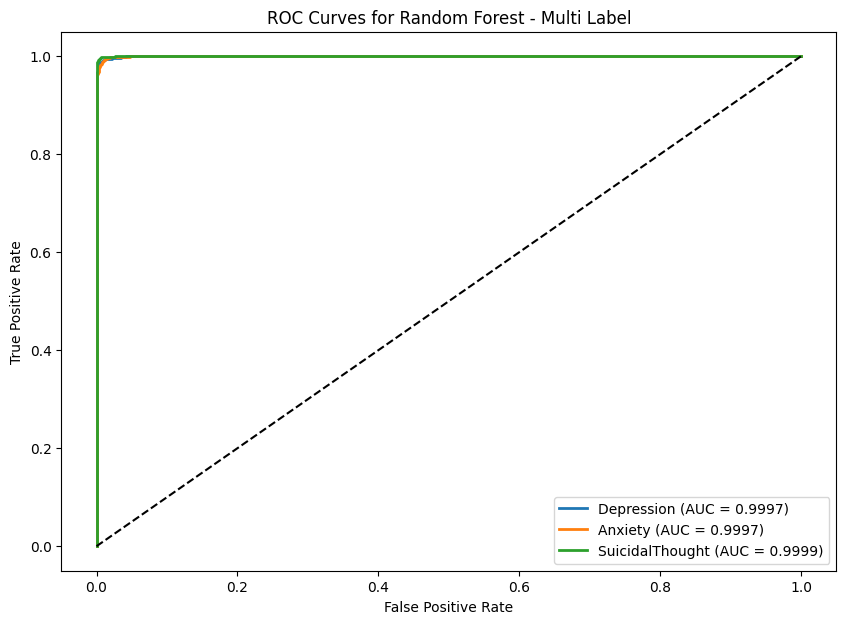

In [ ]:
# ============================================
# ROC CURVES FOR MULTI-LABEL RF
# ============================================

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))

for i, label in enumerate(y.columns):
    # probability of predicting class 1
    y_scores = rf.predict_proba(X_test)[i][:, 1]

    fpr, tpr, _ = roc_curve(y_test.iloc[:, i], y_scores)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, lw=2, label=f"{label} (AUC = {roc_auc:.4f})")

plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Random Forest - Multi Label")
plt.legend()
plt.show()


K-fold cross validation

In [ ]:
# ============================================
# 5-FOLD CROSS VALIDATION FOR RANDOM FOREST
# ============================================

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import numpy as np

kf = KFold(n_splits=5, shuffle=True, random_state=42)

fold_scores = []

# Manual cross-validation because of multi-label
for train_idx, test_idx in kf.split(X):
    X_tr, X_te = X.iloc[train_idx], X.iloc[test_idx]
    y_tr, y_te = y.iloc[train_idx], y.iloc[test_idx]

    model = MultiOutputClassifier(RandomForestClassifier(
        n_estimators=300,
        max_depth=15,
        random_state=42
    ))

    model.fit(X_tr, y_tr)
    preds = model.predict(X_te)

    # accuracy across all labels
    acc = accuracy_score(y_te, preds)
    fold_scores.append(acc)

print("Cross-validation accuracy for each fold:", fold_scores)
print("Mean accuracy:", np.mean(fold_scores))
print("Std deviation:", np.std(fold_scores))


Cross-validation accuracy for each fold: [0.9757009345794393, 0.9719626168224299, 0.971214953271028, 0.9671028037383178, 0.9781267526640494]
Mean accuracy: 0.9728216122150528
Std deviation: 0.003806809921763203


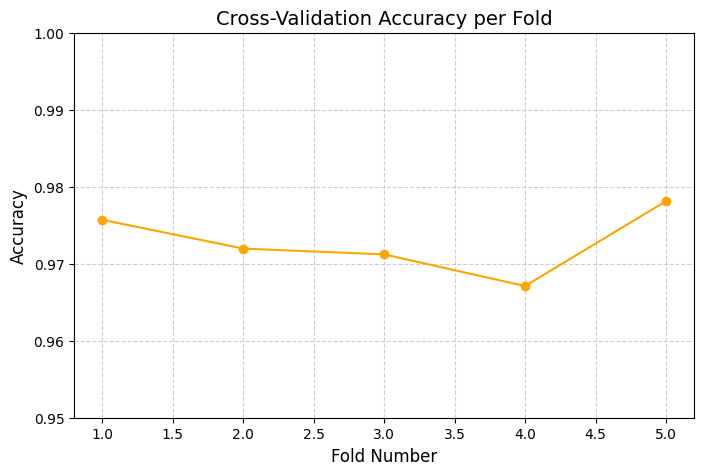

In [ ]:
import matplotlib.pyplot as plt

# Your fold accuracies
fold_accuracies = [
    0.9757009345794393,
    0.9719626168224299,
    0.971214953271028,
    0.9671028037383178,
    0.9781267526640494
]

# Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, 6), fold_accuracies, marker='o', color='orange')

plt.xlabel("Fold Number", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.title("Cross-Validation Accuracy per Fold", fontsize=14)

plt.grid(True, linestyle="--", alpha=0.6)
plt.ylim(0.95, 1.0)

# Show plot
plt.show()


#Ojective 2 Roberta

In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Project_N/Mental_health_Merged_LIWC_GoEmotion.csv")

df = df[[
    "Post Content",
    "Depression",
    "Anxiety",
    "SuicidalThought"
]]

df.head()


LOad go emotion for test user post and categories

In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Project_N/Mental_health_GoEmotion_labeled.csv")

df = df[[
    "Post Content", # Changed to Post Content_liwc
    "Depression",
    "Anxiety",
    "SuicidalThought"
]]

df.head()


,Post Content,Depression,Anxiety,SuicidalThought
0,Hi there and welcome to the Anxiety section of...,0,0,0
1,And it was entirely my own fault I tried cross...,0,1,0
2,Hi everyone Im having a horrible week so just ...,0,1,0
3,Dear All Just need a connection to feel the su...,1,0,0
4,Hi there just reaching out to anyone who might...,0,1,0


In [ ]:
!pip install transformers datasets scikit-learn

import pandas as pd
from sklearn.model_selection import train_test_split
from datasets import Dataset
from transformers import RobertaTokenizer, RobertaForSequenceClassification
from transformers import TrainingArguments, Trainer
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import numpy as np


#RoBERTa for Depression

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Project_N/Mental_health_GoEmotion_labeled.csv")

df = df[["Post Content", "Depression"]]   # only Depression for Model 1
df.rename(columns={"Post Content": "text", "Depression": "label"}, inplace=True)
df.dropna(inplace=True)

df.head()


,text,label
0,Hi there and welcome to the Anxiety section of...,0
1,And it was entirely my own fault I tried cross...,0
2,Hi everyone Im having a horrible week so just ...,0
3,Dear All Just need a connection to feel the su...,1
4,Hi there just reaching out to anyone who might...,0


In [ ]:
!pip install transformers==4.30.2 datasets scikit-learn

# -----------------------------------------
# IMPORTS
# -----------------------------------------
import pandas as pd
from sklearn.model_selection import train_test_split
from datasets import Dataset
from transformers import (
    RobertaTokenizer,
    RobertaForSequenceClassification,
    TrainingArguments,
    Trainer
)
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import numpy as np

# -----------------------------------------
# LOAD DATA
# -----------------------------------------
df = pd.read_csv("/content/drive/MyDrive/Project_N/Mental_health_GoEmotion_labeled.csv")

df = df[["Post Content", "Depression"]]
df.rename(columns={"Post Content": "text", "Depression": "label"}, inplace=True)
df.dropna(inplace=True)

# -----------------------------------------
# TRAIN/TEST SPLIT
# -----------------------------------------
train_df, test_df = train_test_split(
    df,
    test_size=0.2,
    random_state=42,
    stratify=df["label"]
)

train_ds = Dataset.from_pandas(train_df)
test_ds = Dataset.from_pandas(test_df)

# -----------------------------------------
# TOKENIZATION
# -----------------------------------------
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")

def tokenize(batch):
    return tokenizer(
        batch["text"],
        truncation=True,
        padding="max_length",
        max_length=128
    )

train_ds = train_ds.map(tokenize, batched=True)
test_ds = test_ds.map(tokenize, batched=True)

train_ds = train_ds.remove_columns(["text"])
test_ds = test_ds.remove_columns(["text"])

train_ds.set_format("torch")
test_ds.set_format("torch")

# -----------------------------------------
# LOAD MODEL
# -----------------------------------------
model = RobertaForSequenceClassification.from_pretrained(
    "roberta-base",
    num_labels=2
)

# -----------------------------------------
# METRICS
# -----------------------------------------
def compute_metrics(pred):
    labels = pred.label_ids
    preds = np.argmax(pred.predictions, axis=1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average="binary")
    acc = accuracy_score(labels, preds)
    return {
        "accuracy": acc,
        "precision": precision,
        "recall": recall,
        "f1": f1
    }

# -----------------------------------------
# TRAINING ARGUMENTS (FIXED)
# -----------------------------------------
training_args = TrainingArguments(
    output_dir="/content/roberta_depression",
    eval_strategy="epoch",      # FIXED HERE
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_steps=50,
)

# -----------------------------------------
# TRAINER
# -----------------------------------------
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=test_ds,
    compute_metrics=compute_metrics,
)

# -----------------------------------------
# TRAIN MODEL
# -----------------------------------------
trainer.train()

# -----------------------------------------
# EVALUATE
# -----------------------------------------
results = trainer.evaluate()
print("FINAL RESULTS:", results)

# -----------------------------------------
# SAVE MODEL
# -----------------------------------------
trainer.save_model("/content/drive/MyDrive/Project_N/Model_Depression_RoBERTa")

print("MODEL SAVED SUCCESSFULLY!")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.6/113.6 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.9/314.9 kB 13.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 57.9 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × Building wheel for tokenizers (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tokenizers
Failed to build tokenizers
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (tokenizers)


Map:   0%|          | 0/21397 [00:00<?, ? examples/s]

Map:   0%|          | 0/5350 [00:00<?, ? examples/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.12/dist-packages/notebook/notebookapp.py:191: SyntaxWarning: invalid escape sequence '\/'
  | |_| | '_ \/ _` / _` |  _/ -_)
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:


Abort: 

In [ ]:
!pip install transformers==4.30.2 datasets scikit-learn

# -----------------------------------------
# IMPORTS
# -----------------------------------------
import pandas as pd
from sklearn.model_selection import train_test_split
from datasets import Dataset
from transformers import (
    RobertaTokenizer,
    RobertaForSequenceClassification,
    TrainingArguments,
    Trainer
)
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import numpy as np

# -----------------------------------------
# LOAD DATA
# -----------------------------------------
df = pd.read_csv("/content/drive/MyDrive/Project_N/Mental_health_GoEmotion_labeled.csv")

df = df[["Post Content", "Depression"]]
df.rename(columns={"Post Content": "text", "Depression": "label"}, inplace=True)
df.dropna(inplace=True)

# -----------------------------------------
# TRAIN/TEST SPLIT
# -----------------------------------------
train_df, test_df = train_test_split(
    df,
    test_size=0.2,
    random_state=42,
    stratify=df["label"]
)

train_ds = Dataset.from_pandas(train_df)
test_ds = Dataset.from_pandas(test_df)

# -----------------------------------------
# TOKENIZATION
# -----------------------------------------
tokenizer = RobertaTokenizer.from_pretrained("SamLowe/roberta-base-go_emotions")

def tokenize(batch):
    return tokenizer(
        batch["text"],
        truncation=True,
        padding="max_length",
        max_length=128
    )

train_ds = train_ds.map(tokenize, batched=True)
test_ds = test_ds.map(tokenize, batched=True)

train_ds = train_ds.remove_columns(["text"])
test_ds = test_ds.remove_columns(["text"])

train_ds.set_format("torch")
test_ds.set_format("torch")

# -----------------------------------------
# LOAD MODEL
# -----------------------------------------
model = RobertaForSequenceClassification.from_pretrained(
    "SamLowe/roberta-base-go_emotions",
    num_labels=2
)

# -----------------------------------------
# METRICS
# -----------------------------------------
def compute_metrics(pred):
    labels = pred.label_ids
    preds = np.argmax(pred.predictions, axis=1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average="binary")
    acc = accuracy_score(labels, preds)
    return {
        "accuracy": acc,
        "precision": precision,
        "recall": recall,
        "f1": f1
    }

# -----------------------------------------
# TRAINING ARGUMENTS
# -----------------------------------------
training_args = TrainingArguments(
    output_dir="/content/roberta_depression",
    eval_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_steps=50,
)

# -----------------------------------------
# TRAINER
# -----------------------------------------
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=test_ds,
    compute_metrics=compute_metrics,
)

# -----------------------------------------
# TRAIN MODEL
# -----------------------------------------
trainer.train()

# -----------------------------------------
# EVALUATE
# -----------------------------------------
results = trainer.evaluate()
print("FINAL RESULTS:", results)

# -----------------------------------------
# SAVE MODEL
# -----------------------------------------
trainer.save_model("/content/drive/MyDrive/Project_N/Model_Depression_GoEmotionRoBERTa")

print("MODEL SAVED SUCCESSFULLY!")


In [ ]:
!pip install transformers==4.30.2 datasets scikit-learn --quiet

# -----------------------------------------
# IMPORTS
# -----------------------------------------
import os
os.environ["WANDB_DISABLED"] = "true"   # Disable W&B popup

import pandas as pd
from sklearn.model_selection import train_test_split
from datasets import Dataset
from transformers import (
    RobertaTokenizer,
    RobertaForSequenceClassification,
    TrainingArguments,
    Trainer,
    RobertaConfig # Import RobertaConfig
)
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import numpy as np

# -----------------------------------------
# LOAD DATA
# -----------------------------------------
df = pd.read_csv("/content/drive/MyDrive/Project_N/Mental_health_GoEmotion_labeled.csv")

df = df[["Post Content", "Depression"]]
df.rename(columns={"Post Content": "text", "Depression": "label"}, inplace=True)
df.dropna(inplace=True)

# -----------------------------------------
# TRAIN/TEST SPLIT
# -----------------------------------------
train_df, test_df = train_test_split(
    df,
    test_size=0.2,
    random_state=42,
    stratify=df["label"]
)

train_ds = Dataset.from_pandas(train_df)
test_ds = Dataset.from_pandas(test_df)

# -----------------------------------------
# TOKENIZATION
# -----------------------------------------
tokenizer = RobertaTokenizer.from_pretrained("SamLowe/roberta-base-go_emotions")

def tokenize(batch):
    return tokenizer(
        batch["text"],
        truncation=True,
        padding="max_length",
        max_length=128
    )

train_ds = train_ds.map(tokenize, batched=True)
test_ds = test_ds.map(tokenize, batched=True)

train_ds = train_ds.remove_columns(["text"])
test_ds = test_ds.remove_columns(["text"])

train_ds.set_format("torch")
test_ds.set_format("torch")

# -----------------------------------------
# LOAD MODEL
# -----------------------------------------
# Load the base config and modify it for our binary classification task
config = RobertaConfig.from_pretrained(
    "SamLowe/roberta-base-go_emotions",
    num_labels=2, # Still 2 for two classes (0, 1)
    problem_type="single_label_classification" # Explicitly set problem type
)

model = RobertaForSequenceClassification.from_pretrained(
    "SamLowe/roberta-base-go_emotions",
    config=config, # Pass the modified config
    ignore_mismatched_sizes=True
)


# -----------------------------------------
# METRICS
# -----------------------------------------
def compute_metrics(pred):
    labels = pred.label_ids
    preds = np.argmax(pred.predictions, axis=1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average="binary")
    acc = accuracy_score(labels, preds)
    return {
        "accuracy": acc,
        "precision": precision,
        "recall": recall,
        "f1": f1
    }

# -----------------------------------------
# TRAINING ARGUMENTS
# -----------------------------------------
training_args = TrainingArguments(
    output_dir="/content/roberta_depression",
    eval_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_steps=50,
)

# -----------------------------------------
# TRAINER
# -----------------------------------------
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=test_ds,
    compute_metrics=compute_metrics,
)

# -----------------------------------------
# TRAIN MODEL
# -----------------------------------------
trainer.train()

# -----------------------------------------
# EVALUATE
# -----------------------------------------
results = trainer.evaluate()
print("FINAL RESULTS:", results)

# -----------------------------------------
# SAVE MODEL
# -----------------------------------------
trainer.save_model("/content/drive/MyDrive/Project_N/Model_Depression_GoEmotionRoBERTa")

print("MODEL SAVED SUCCESSFULLY!")

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for tokenizers (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tokenizers
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (tokenizers)


Map:   0%|          | 0/21397 [00:00<?, ? examples/s]

Map:   0%|          | 0/5350 [00:00<?, ? examples/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at SamLowe/roberta-base-go_emotions and are newly initialized because the shapes did not match:
- classifier.out_proj.bias: found shape torch.Size([28]) in the checkpoint and torch.Size([2]) in the model instantiated
- classifier.out_proj.weight: found shape torch.Size([28, 768]) in the checkpoint and torch.Size([2, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.432900,0.409152,0.818692,0.819843,0.867378,0.842940
2,0.406400,0.468524,0.828411,0.818794,0.891370,0.853542
3,0.300500,0.656039,0.825234,0.838245,0.853049,0.845582


FINAL RESULTS: {'eval_loss': 0.6560386419296265, 'eval_accuracy': 0.8252336448598131, 'eval_precision': 0.8382449246889325, 'eval_recall': 0.8530489836721094, 'eval_f1': 0.8455821635012386, 'eval_runtime': 37.1651, 'eval_samples_per_second': 143.952, 'eval_steps_per_second': 18.001, 'epoch': 3.0}
MODEL SAVED SUCCESSFULLY!


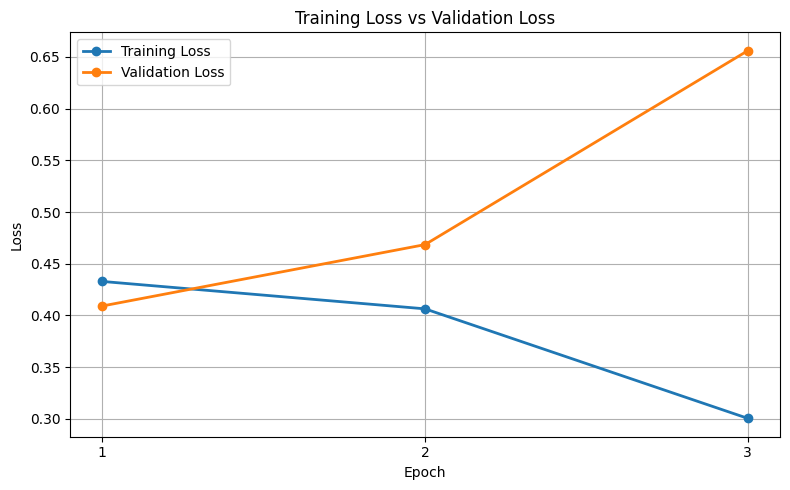

In [ ]:
import matplotlib.pyplot as plt

# ----------------------------
# Loss values from your table
# ----------------------------
epochs = [1, 2, 3]
training_loss = [0.432900, 0.406400, 0.300500]
validation_loss = [0.409152, 0.468524, 0.656039]

# ----------------------------
# Plot
# ----------------------------
plt.figure(figsize=(8, 5))

plt.plot(epochs, training_loss, marker='o', linewidth=2)
plt.plot(epochs, validation_loss, marker='o', linewidth=2)

plt.title("Training Loss vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.xticks(epochs)

plt.legend(["Training Loss", "Validation Loss"])
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
!pip install transformers==4.30.2 datasets scikit-learn

import pandas as pd
from sklearn.model_selection import train_test_split
from datasets import Dataset
from transformers import RobertaTokenizer, RobertaForSequenceClassification, TrainingArguments, Trainer
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import numpy as np

# =============================
# LOAD & PREPARE DATA (ANXIETY)
# =============================
df = pd.read_csv("/content/drive/MyDrive/Project_N/Mental_health_GoEmotion_labeled.csv")

df = df[["Post Content", "Anxiety"]]
df.rename(columns={"Post Content": "text", "Anxiety": "label"}, inplace=True)
df.dropna(inplace=True)

train_df, test_df = train_test_split(
    df, test_size=0.2, random_state=42, stratify=df["label"]
)

train_ds = Dataset.from_pandas(train_df)
test_ds = Dataset.from_pandas(test_df)

# =============================
# TOKENIZATION
# =============================
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")

def tokenize(batch):
    return tokenizer(batch["text"], truncation=True, padding="max_length", max_length=128)

train_ds = train_ds.map(tokenize, batched=True)
test_ds = test_ds.map(tokenize, batched=True)

train_ds = train_ds.remove_columns(["text"])
test_ds = test_ds.remove_columns(["text"])

train_ds.set_format("torch")
test_ds.set_format("torch")

# =============================
# LOAD ROBERTA MODEL
# =============================
model = RobertaForSequenceClassification.from_pretrained(
    "roberta-base",
    num_labels=2
)

# =============================
# METRICS
# =============================
def compute_metrics(pred):
    labels = pred.label_ids
    preds = np.argmax(pred.predictions, axis=1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average="binary")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "precision": precision, "recall": recall, "f1": f1}

# =============================
# TRAINING ARGUMENTS
# =============================
training_args = TrainingArguments(
    output_dir="/content/Anxiety_RoBERTa",
    eval_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_steps=50,
)

# =============================
# TRAINER
# =============================
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=test_ds,
    compute_metrics=compute_metrics,
)

# =============================
# TRAIN
# =============================
trainer.train()

# =============================
# EVALUATE
# =============================
results = trainer.evaluate()
print("FINAL ANXIETY RESULTS:", results)

# SAVE MODEL
trainer.save_model("/content/drive/MyDrive/Project_N/Model_Anxiety_RoBERTa")
print("ANXIETY MODEL SAVED SUCCESSFULLY!")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.6/113.6 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.9/314.9 kB 7.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 51.6 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × Building wheel for tokenizers (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tokenizers
Failed to build tokenizers
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (tokenizers)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

Map:   0%|          | 0/21397 [00:00<?, ? examples/s]

Map:   0%|          | 0/5350 [00:00<?, ? examples/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.12/dist-packages/notebook/notebookapp.py:191: SyntaxWarning: invalid escape sequence '\/'
  | |_| | '_ \/ _` / _` |  _/ -_)
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:


Abort: 

In [ ]:
!pip install -q transformers==4.30.2 datasets scikit-learn
import os
os.environ["WANDB_DISABLED"] = "true"

import pandas as pd
from sklearn.model_selection import train_test_split
from datasets import Dataset
from transformers import (
    RobertaTokenizer,
    RobertaForSequenceClassification,
    TrainingArguments,
    Trainer
)
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import numpy as np

# -------------------------------
# LOAD DATA
# -------------------------------
df = pd.read_csv("/content/drive/MyDrive/Project_N/Mental_health_GoEmotion_labeled.csv")
df.rename(columns={"Post Content": "text"}, inplace=True)
df.dropna(inplace=True)

df_anx = df[["text", "Anxiety"]].rename(columns={"Anxiety": "label"})

# -------------------------------
# SPLIT DATA
# -------------------------------
train_df, test_df = train_test_split(
    df_anx,
    test_size=0.2,
    random_state=42,
    stratify=df_anx["label"]
)

train_ds = Dataset.from_pandas(train_df)
test_ds = Dataset.from_pandas(test_df)

# -------------------------------
# TOKENIZER
# -------------------------------
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")

def tokenize(batch):
    return tokenizer(batch["text"], truncation=True, padding="max_length", max_length=128)

train_ds = train_ds.map(tokenize, batched=True)
test_ds = test_ds.map(tokenize, batched=True)

train_ds = train_ds.remove_columns(["text"])
test_ds = test_ds.remove_columns(["text"])

train_ds.set_format("torch")
test_ds.set_format("torch")

# -------------------------------
# MODEL
# -------------------------------
model = RobertaForSequenceClassification.from_pretrained("roberta-base", num_labels=2)

# -------------------------------
# METRICS
# -------------------------------
def compute_metrics(pred):
    labels = pred.label_ids
    preds = np.argmax(pred.predictions, axis=1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average="binary")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "precision": precision, "recall": recall, "f1": f1}

# -------------------------------
# TRAINING ARGUMENTS
# -------------------------------
training_args = TrainingArguments(
    output_dir="/content/roberta_anxiety",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_steps=50,
    save_total_limit=1
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=test_ds,
    compute_metrics=compute_metrics,
)

# -------------------------------
# TRAIN
# -------------------------------
trainer.train()

# -------------------------------
# EVALUATE
# -------------------------------
results = trainer.evaluate()
print("FINAL ANXIETY RESULTS:", results)

# -------------------------------
# SAVE MODEL
# -------------------------------
trainer.save_model("/content/drive/MyDrive/Project_N/Model_Anxiety_RoBERTa")
print("Anxiety Model Saved!")


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for tokenizers (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tokenizers
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (tokenizers)


Map:   0%|          | 0/21394 [00:00<?, ? examples/s]

Map:   0%|          | 0/5349 [00:00<?, ? examples/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


TypeError: TrainingArguments.__init__() got an unexpected keyword argument 'evaluation_strategy'

In [ ]:
!pip install -q transformers==4.30.2 datasets scikit-learn

import os
os.environ["WANDB_DISABLED"] = "true"

import pandas as pd
from sklearn.model_selection import train_test_split
from datasets import Dataset
from transformers import RobertaTokenizer, RobertaForSequenceClassification, TrainingArguments, Trainer
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import numpy as np

# -------------------------------
# LOAD DATA
# -------------------------------
df = pd.read_csv("/content/drive/MyDrive/Project_N/Mental_health_GoEmotion_labeled.csv")
df.rename(columns={"Post Content": "text"}, inplace=True)
df.dropna(inplace=True)

df_anx = df[["text", "Anxiety"]].rename(columns={"Anxiety": "label"})

# -------------------------------
# SPLIT DATA
# -------------------------------
train_df, test_df = train_test_split(
    df_anx,
    test_size=0.2,
    random_state=42,
    stratify=df_anx["label"]
)

train_ds = Dataset.from_pandas(train_df)
test_ds = Dataset.from_pandas(test_df)

# -------------------------------
# TOKENIZER
# -------------------------------
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")

def tokenize(batch):
    return tokenizer(batch["text"], truncation=True, padding="max_length", max_length=128)

train_ds = train_ds.map(tokenize, batched=True)
test_ds = test_ds.map(tokenize, batched=True)

train_ds = train_ds.remove_columns(["text"])
test_ds = test_ds.remove_columns(["text"])

train_ds.set_format("torch")
test_ds.set_format("torch")

# -------------------------------
# MODEL
# -------------------------------
model = RobertaForSequenceClassification.from_pretrained("roberta-base", num_labels=2)

# -------------------------------
# METRICS
# -------------------------------
def compute_metrics(pred):
    labels = pred.label_ids
    preds = np.argmax(pred.predictions, axis=1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average="binary")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "precision": precision, "recall": recall, "f1": f1}

# -------------------------------
# TRAINING ARGUMENTS
# -------------------------------
training_args = TrainingArguments(
    output_dir="/content/roberta_anxiety",
    eval_strategy="epoch",        # FIXED FOR ALL TRANSFORMERS
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_steps=50,
    save_total_limit=1
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=test_ds,
    compute_metrics=compute_metrics,
)

# -------------------------------
# TRAIN
# -------------------------------
trainer.train()

# -------------------------------
# EVALUATE
# -------------------------------
results = trainer.evaluate()
print("FINAL ANXIETY RESULTS:", results)

# -------------------------------
# SAVE MODEL
# -------------------------------
trainer.save_model("/content/drive/MyDrive/Project_N/Model_Anxiety_RoBERTa")
print("Anxiety Model Saved!")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.6/113.6 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.9/314.9 kB 15.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 87.3 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × Building wheel for tokenizers (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tokenizers
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (tokenizers)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

Map:   0%|          | 0/21394 [00:00<?, ? examples/s]

Map:   0%|          | 0/5349 [00:00<?, ? examples/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.375300,0.371429,0.844644,0.808395,0.685419,0.741845
2,0.351300,0.416593,0.849692,0.786675,0.738806,0.761989
3,0.389200,0.511615,0.844644,0.775893,0.735362,0.755084


FINAL ANXIETY RESULTS: {'eval_loss': 0.5116146206855774, 'eval_accuracy': 0.8446438586651711, 'eval_precision': 0.775893397940642, 'eval_recall': 0.735361653272101, 'eval_f1': 0.7550839964633068, 'eval_runtime': 35.7789, 'eval_samples_per_second': 149.502, 'eval_steps_per_second': 18.698, 'epoch': 3.0}
Anxiety Model Saved!


In [ ]:
!pip install transformers==4.30.2 datasets scikit-learn

import pandas as pd
from sklearn.model_selection import train_test_split
from datasets import Dataset
from transformers import RobertaTokenizer, RobertaForSequenceClassification, TrainingArguments, Trainer
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import numpy as np

# =============================
# LOAD & PREPARE DATA (SUICIDAL)
# =============================
df = pd.read_csv("/content/drive/MyDrive/Project_N/Mental_health_GoEmotion_labeled.csv")

df = df[["Post Content", "SuicidalThought"]]
df.rename(columns={"Post Content": "text", "SuicidalThought": "label"}, inplace=True)
df.dropna(inplace=True)

train_df, test_df = train_test_split(
    df, test_size=0.2, random_state=42, stratify=df["label"]
)

train_ds = Dataset.from_pandas(train_df)
test_ds = Dataset.from_pandas(test_df)

# =============================
# TOKENIZATION
# =============================
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")

def tokenize(batch):
    return tokenizer(batch["text"], truncation=True, padding="max_length", max_length=128)

train_ds = train_ds.map(tokenize, batched=True)
test_ds = test_ds.map(tokenize, batched=True)

train_ds = train_ds.remove_columns(["text"])
test_ds = test_ds.remove_columns(["text"])

train_ds.set_format("torch")
test_ds.set_format("torch")

# =============================
# LOAD ROBERTA MODEL
# =============================
model = RobertaForSequenceClassification.from_pretrained(
    "roberta-base",
    num_labels=2
)

# =============================
# METRICS
# =============================
def compute_metrics(pred):
    labels = pred.label_ids
    preds = np.argmax(pred.predictions, axis=1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average="binary")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "precision": precision, "recall": recall, "f1": f1}

# =============================
# TRAINING ARGUMENTS
# =============================
training_args = TrainingArguments(
    output_dir="/content/SuicidalThought_RoBERTa",
    eval_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_steps=50,
)

# =============================
# TRAINER
# =============================
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=test_ds,
    compute_metrics=compute_metrics,
)

# =============================
# TRAIN
# =============================
trainer.train()

# =============================
# EVALUATE
# =============================
results = trainer.evaluate()
print("FINAL SUICIDAL RESULTS:", results)

# SAVE MODEL
trainer.save_model("/content/drive/MyDrive/Project_N/Model_Suicidal_RoBERTa")
print("SUICIDAL MODEL SAVED SUCCESSFULLY!")


  Using cached transformers-4.30.2-py3-none-any.whl.metadata (113 kB)
  Using cached tokenizers-0.13.3.tar.gz (314 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Using cached transformers-4.30.2-py3-none-any.whl (7.2 MB)
  error: subprocess-exited-with-error
  
  × Building wheel for tokenizers (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tokenizers
Failed to build tokenizers
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (tokenizers)


Map:   0%|          | 0/21397 [00:00<?, ? examples/s]

Map:   0%|          | 0/5350 [00:00<?, ? examples/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.375100,0.443573,0.808598,0.590028,0.789474,0.675333
2,0.308300,0.402122,0.851028,0.739168,0.632320,0.681582
3,0.287700,0.541854,0.850093,0.723630,0.656042,0.688180


FINAL SUICIDAL RESULTS: {'eval_loss': 0.5418543815612793, 'eval_accuracy': 0.8500934579439252, 'eval_precision': 0.723630417007359, 'eval_recall': 0.6560415122312825, 'eval_f1': 0.6881804043545878, 'eval_runtime': 35.867, 'eval_samples_per_second': 149.162, 'eval_steps_per_second': 18.652, 'epoch': 3.0}
SUICIDAL MODEL SAVED SUCCESSFULLY!


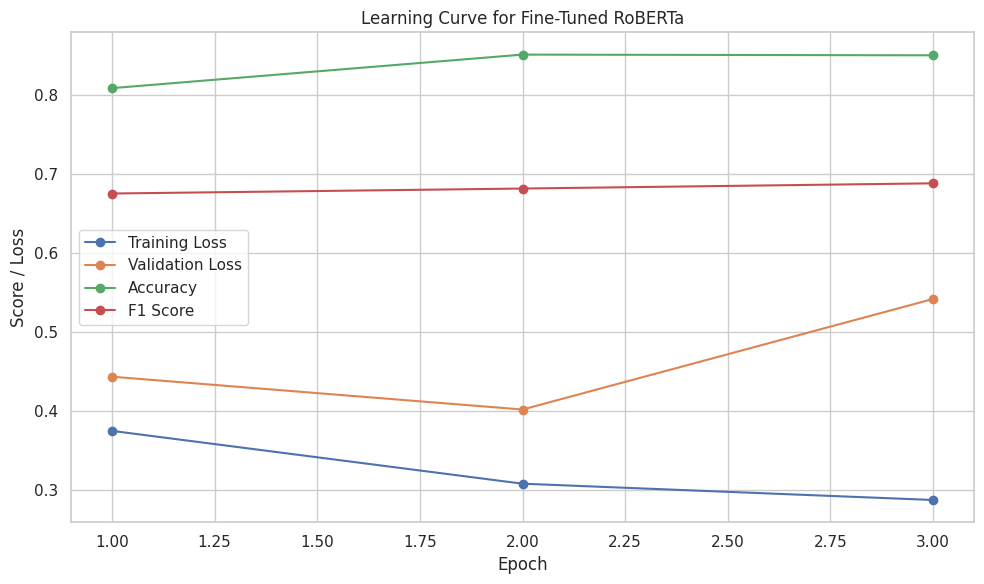

In [ ]:
import matplotlib.pyplot as plt

# Data from your screenshot
epochs = [1, 2, 3]
training_loss = [0.3751, 0.3083, 0.2877]
validation_loss = [0.4436, 0.4021, 0.5419]
accuracy = [0.8086, 0.8510, 0.8501]
f1_score = [0.6753, 0.6816, 0.6882]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_loss, marker='o', label='Training Loss')
plt.plot(epochs, validation_loss, marker='o', label='Validation Loss')
plt.plot(epochs, accuracy, marker='o', label='Accuracy')
plt.plot(epochs, f1_score, marker='o', label='F1 Score')

plt.xlabel("Epoch")
plt.ylabel("Score / Loss")
plt.title("Learning Curve for Fine-Tuned RoBERTa")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<Figure size 600x500 with 0 Axes>

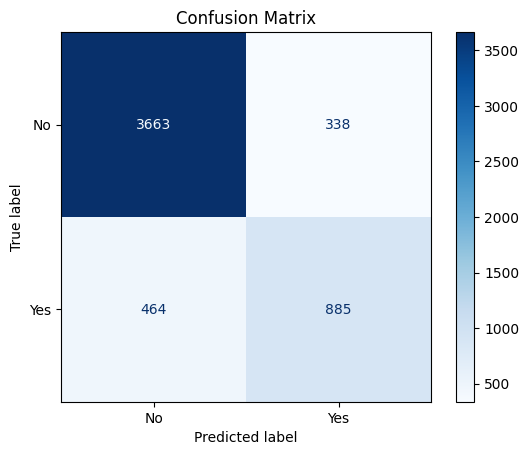

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# RUN PREDICTIONS
pred_output = trainer.predict(test_ds)
y_true = pred_output.label_ids
y_pred = np.argmax(pred_output.predictions, axis=1)

# CONFUSION MATRIX
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6,5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No", "Yes"])
disp.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix")
plt.show()


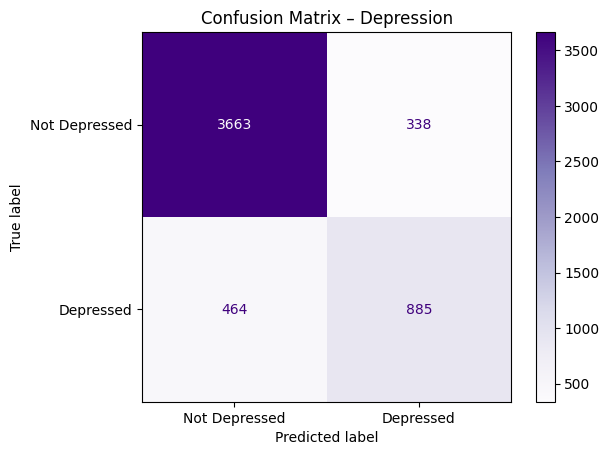

In [ ]:
pred_output = trainer.predict(test_ds)
y_true = pred_output.label_ids
y_pred = np.argmax(pred_output.predictions, axis=1)

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Depressed", "Depressed"])
disp.plot(cmap="Purples", values_format='d')
plt.title("Confusion Matrix – Depression")
plt.show()

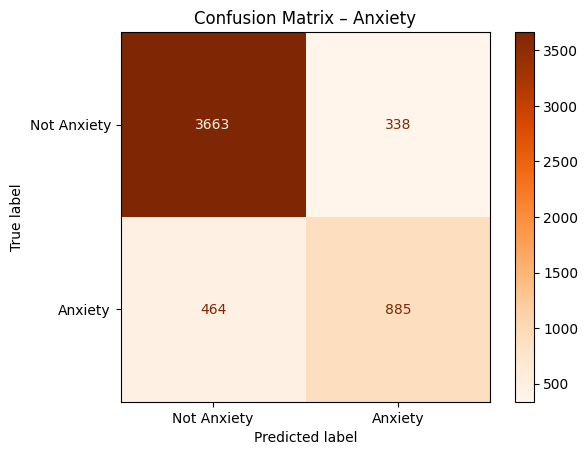

In [ ]:
pred_output = trainer.predict(test_ds)
y_true = pred_output.label_ids
y_pred = np.argmax(pred_output.predictions, axis=1)

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Anxiety", "Anxiety"])
disp.plot(cmap="Oranges", values_format='d')
plt.title("Confusion Matrix – Anxiety")
plt.show()

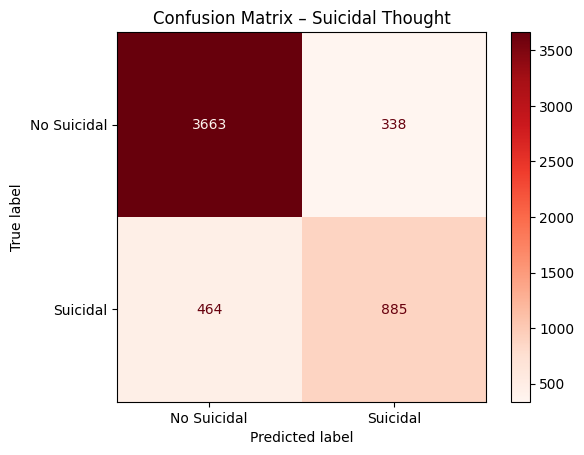

In [ ]:
pred_output = trainer.predict(test_ds)
y_true = pred_output.label_ids
y_pred = np.argmax(pred_output.predictions, axis=1)

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Suicidal", "Suicidal"])
disp.plot(cmap="Reds", values_format='d')
plt.title("Confusion Matrix – Suicidal Thought")
plt.show()

### GOEmotion multi label

In [ ]:
# ============================================================
# FULL MULTI-TASK ROBERTA MODEL
# Input  : Post Content
# Targets: Depression, Anxiety, SuicidalThought (3-class each)
# ============================================================

!pip install transformers accelerate datasets torch

# --------------------------
# 1. Imports
# --------------------------
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from transformers import RobertaTokenizer, RobertaModel, AdamW
from transformers import get_linear_schedule_with_warmup
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tqdm import tqdm

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using device:", device)

# --------------------------
# 2. Load Dataset
# --------------------------
df = pd.read_csv("/content/drive/MyDrive/Project_N/Mental_health_GoEmotion_labeled_multilevel.csv")
print("Data Loaded:", df.shape)

# --------------------------
# 3. Encode Labels
# --------------------------
dep_map = {"mild":0, "moderate":1, "severe":2}
anx_map = {"low":0, "medium":1, "high":2}
sui_map = {"no_risk":0, "medium_risk":1, "high_risk":2}

df["dep_enc"] = df["Depression"].map(dep_map)
df["anx_enc"] = df["Anxiety"].map(anx_map)
df["sui_enc"] = df["SuicidalThought"].map(sui_map)

# --------------------------
# 4. Train–Val Split
# --------------------------
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

# --------------------------
# 5. Dataset Class
# --------------------------
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")

class MentalHealthDataset(Dataset):
    def __init__(self, dataframe):
        self.texts = dataframe["Post Content"].tolist()
        self.dep = dataframe["dep_enc"].tolist()
        self.anx = dataframe["anx_enc"].tolist()
        self.sui = dataframe["sui_enc"].tolist()

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        encoding = tokenizer(
            self.texts[idx],
            padding="max_length",
            max_length=128,
            truncation=True,
            return_tensors="pt"
        )
        return {
            "input_ids": encoding["input_ids"].flatten(),
            "attention_mask": encoding["attention_mask"].flatten(),
            "dep": torch.tensor(self.dep[idx]),
            "anx": torch.tensor(self.anx[idx]),
            "sui": torch.tensor(self.sui[idx])
        }

train_dataset = MentalHealthDataset(train_df)
val_dataset = MentalHealthDataset(val_df)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8)

# --------------------------
# 6. MULTI-TASK ROBERTA MODEL
# --------------------------
class MultiTaskRoberta(nn.Module):
    def __init__(self):
        super(MultiTaskRoberta, self).__init__()
        self.roberta = RobertaModel.from_pretrained("roberta-base")
        self.dropout = nn.Dropout(0.2)

        # Three heads (3 classes each)
        self.dep_head = nn.Linear(768, 3)
        self.anx_head = nn.Linear(768, 3)
        self.sui_head = nn.Linear(768, 3)

    def forward(self, input_ids, attention_mask):
        outputs = self.roberta(input_ids=input_ids, attention_mask=attention_mask)
        cls = self.dropout(outputs.last_hidden_state[:, 0, :])

        dep_logits = self.dep_head(cls)
        anx_logits = self.anx_head(cls)
        sui_logits = self.sui_head(cls)
        return dep_logits, anx_logits, sui_logits

model = MultiTaskRoberta().to(device)

# --------------------------
# 7. Optimizer + Loss
# --------------------------
optimizer = AdamW(model.parameters(), lr=2e-5)
loss_fn = nn.CrossEntropyLoss()

# --------------------------
# 8. Training Loop
# --------------------------
EPOCHS = 3

for epoch in range(EPOCHS):
    model.train()
    total_loss = 0

    for batch in tqdm(train_loader):
        optimizer.zero_grad()

        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        dep = batch["dep"].to(device)
        anx = batch["anx"].to(device)
        sui = batch["sui"].to(device)

        dep_logits, anx_logits, sui_logits = model(input_ids, attention_mask)

        loss = (
            loss_fn(dep_logits, dep) +
            loss_fn(anx_logits, anx) +
            loss_fn(sui_logits, sui)
        )

        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch {epoch+1}/{EPOCHS}, Loss = {total_loss/len(train_loader):.4f}")

# --------------------------
# 9. Evaluation
# --------------------------
model.eval()

y_true_dep, y_pred_dep = [], []
y_true_anx, y_pred_anx = [], []
y_true_sui, y_pred_sui = [], []

with torch.no_grad():
    for batch in val_loader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)

        dep_logits, anx_logits, sui_logits = model(input_ids, attention_mask)

        y_true_dep.extend(batch["dep"].tolist())
        y_pred_dep.extend(dep_logits.argmax(1).cpu().tolist())

        y_true_anx.extend(batch["anx"].tolist())
        y_pred_anx.extend(anx_logits.argmax(1).cpu().tolist())

        y_true_sui.extend(batch["sui"].tolist())
        y_pred_sui.extend(sui_logits.argmax(1).cpu().tolist())

print("\n=== DEPRESSION REPORT ===")
print(classification_report(y_true_dep, y_pred_dep, target_names=list(dep_map.keys())))

print("\n=== ANXIETY REPORT ===")
print(classification_report(y_true_anx, y_pred_anx, target_names=list(anx_map.keys())))

print("\n=== SUICIDAL RISK REPORT ===")
print(classification_report(y_true_sui, y_pred_sui, target_names=list(sui_map.keys())))

# --------------------------
# 10. Save Predictions
# --------------------------
val_df = val_df.reset_index(drop=True)

val_df["Dep_pred"] = [list(dep_map.keys())[i] for i in y_pred_dep]
val_df["Anx_pre_]()_


SyntaxError: unterminated string literal (detected at line 188) (ipython-input-4220068281.py, line 188)

In [ ]:
# ============================================================
# FULL MULTI-TASK ROBERTA MODEL (FINAL CLEAN VERSION)
# ============================================================

!pip install transformers accelerate datasets torch

# --------------------------
# 1. Imports
# --------------------------
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from transformers import RobertaTokenizer, RobertaModel
from torch.optim import AdamW # Corrected import
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd
from tqdm import tqdm

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using device:", device)

# --------------------------
# 2. Load Dataset
# --------------------------
df = pd.read_csv("/content/drive/MyDrive/Project_N/Mental_health_GoEmotion_labeled_multilevel.csv")
print("Data Loaded:", df.shape)

# --------------------------
# 3. Encode Labels
# --------------------------
dep_map = {"mild":0, "moderate":1, "severe":2}
anx_map = {"low":0, "medium":1, "high":2}
sui_map = {"no_risk":0, "medium_risk":1, "high_risk":2}

df["dep_enc"] = df["Depression"].map(dep_map)
df["anx_enc"] = df["Anxiety"].map(anx_map)
df["sui_enc"] = df["SuicidalThought"].map(sui_map)

# --------------------------
# 4. Train–Val Split
# --------------------------
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

# --------------------------
# 5. Dataset Class
# --------------------------
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")

class MentalHealthDataset(Dataset):
    def __init__(self, dataframe):
        # Ensure 'Post Content' is string type before converting to list
        self.texts = dataframe["Post Content"].astype(str).tolist()
        self.dep = dataframe["dep_enc"].tolist()
        self.anx = dataframe["anx_enc"].tolist()
        self.sui = dataframe["sui_enc"].tolist()

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        encoding = tokenizer(
            self.texts[idx],
            padding="max_length",
            max_length=128,
            truncation=True,
            return_tensors="pt"
        )
        return {
            "input_ids": encoding["input_ids"].flatten(),
            "attention_mask": encoding["attention_mask"].flatten(),
            "dep": torch.tensor(self.dep[idx]),
            "anx": torch.tensor(self.anx[idx]),
            "sui": torch.tensor(self.sui[idx])
        }

train_dataset = MentalHealthDataset(train_df)
val_dataset = MentalHealthDataset(val_df)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8)

# --------------------------
# 6. MULTI-TASK ROBERTA MODEL
# --------------------------
class MultiTaskRoberta(nn.Module):
    def __init__(self):
        super(MultiTaskRoberta, self).__init__()
        self.roberta = RobertaModel.from_pretrained("roberta-base")
        self.dropout = nn.Dropout(0.2)

        # Three heads (3 classes each)
        self.dep_head = nn.Linear(768, 3)
        self.anx_head = nn.Linear(768, 3)
        self.sui_head = nn.Linear(768, 3)

    def forward(self, input_ids, attention_mask):
        outputs = self.roberta(input_ids=input_ids, attention_mask=attention_mask)
        cls = self.dropout(outputs.last_hidden_state[:, 0, :])

        dep_logits = self.dep_head(cls)
        anx_logits = self.anx_head(cls)
        sui_logits = self.sui_head(cls)
        return dep_logits, anx_logits, sui_logits

model = MultiTaskRoberta().to(device)

# --------------------------
# 7. Optimizer + Loss
# --------------------------
optimizer = AdamW(model.parameters(), lr=2e-5)
loss_fn = nn.CrossEntropyLoss()

# --------------------------
# 8. Training Loop
# --------------------------
EPOCHS = 3

for epoch in range(EPOCHS):
    model.train()
    total_loss = 0

    for batch in tqdm(train_loader):
        optimizer.zero_grad()

        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        dep = batch["dep"].to(device)
        anx = batch["anx"].to(device)
        sui = batch["sui"].to(device)

        dep_logits, anx_logits, sui_logits = model(input_ids, attention_mask)

        loss = (
            loss_fn(dep_logits, dep) +
            loss_fn(anx_logits, anx) +
            loss_fn(sui_logits, sui)
        )

        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch {epoch+1}/{EPOCHS}, Loss = {total_loss/len(train_loader):.4f}")

# --------------------------
# 9. Evaluation
# --------------------------
model.eval()

y_true_dep, y_pred_dep = [], []
y_true_anx, y_pred_anx = [], []
y_true_sui, y_pred_sui = [], []

with torch.no_grad():
    for batch in val_loader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)

        dep_logits, anx_logits, sui_logits = model(input_ids, attention_mask)

        y_true_dep.extend(batch["dep"].tolist())
        y_pred_dep.extend(dep_logits.argmax(1).cpu().tolist())

        y_true_anx.extend(batch["anx"].tolist())
        y_pred_anx.extend(anx_logits.argmax(1).cpu().tolist())

        y_true_sui.extend(batch["sui"].tolist())
        y_pred_sui.extend(sui_logits.argmax(1).cpu().tolist())

print("\n=== DEPRESSION REPORT ===")
print(classification_report(y_true_dep, y_pred_dep, target_names=list(dep_map.keys())))

print("\n=== ANXIETY REPORT ===")
print(classification_report(y_true_anx, y_pred_anx, target_names=list(anx_map.keys())))

print("\n=== SUICIDAL RISK REPORT ===")
print(classification_report(y_true_sui, y_pred_sui, target_names=list(sui_map.keys())))

# --------------------------
# 10. Save Predictions (NO ERRORS)
# --------------------------
val_df = val_df.reset_index(drop=True)

val_df["Dep_pred"] = [list(dep_map.keys())[i] for i in y_pred_dep]
val_df["Anx_pred"] = [list(anx_map.keys())[i] for i in y_pred_anx]
val_df["Sui_pred"] = [list(sui_map.keys())[i] for i in y_pred_sui]

save_path = "/content/drive/MyDrive/Project_N/MTL_RoBERTa_Predictions.csv"
val_df.to_csv(save_path, index=False)

print("Saved predictions to:", save_path)


Using device: cuda
Data Loaded: (26749, 39)


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
100%|██████████| 2675/2675 [09:56<00:00,  4.48it/s]


Epoch 1/3, Loss = 2.0094


100%|██████████| 2675/2675 [09:39<00:00,  4.62it/s]


Epoch 2/3, Loss = 1.7504


100%|██████████| 2675/2675 [09:39<00:00,  4.61it/s]


Epoch 3/3, Loss = 1.5352

=== DEPRESSION REPORT ===
              precision    recall  f1-score   support

        mild       0.71      0.88      0.78      2309
    moderate       0.24      0.11      0.15       652
      severe       0.79      0.73      0.76      2389

    accuracy                           0.72      5350
   macro avg       0.58      0.57      0.56      5350
weighted avg       0.69      0.72      0.70      5350


=== ANXIETY REPORT ===
              precision    recall  f1-score   support

         low       0.84      0.90      0.87      3420
      medium       0.35      0.17      0.23       643
        high       0.70      0.75      0.72      1287

    accuracy                           0.78      5350
   macro avg       0.63      0.61      0.61      5350
weighted avg       0.75      0.78      0.76      5350


=== SUICIDAL RISK REPORT ===
              precision    recall  f1-score   support

     no_risk       0.81      0.93      0.87      3508
 medium_risk       0.35

In [ ]:
# ============================================================
# IMPROVED MULTI-TASK ROBERTA (WITH CLASS WEIGHTS)
# ============================================================

!pip install transformers accelerate datasets torch

# --------------------------
# 1. Imports
# --------------------------
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
# Corrected AdamW import from torch.optim
from torch.optim import AdamW
from transformers import RobertaTokenizer, RobertaModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight
import pandas as pd
import numpy as np
from tqdm import tqdm

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using device:", device)

# --------------------------
# 2. Load Dataset
# --------------------------
df = pd.read_csv("/content/drive/MyDrive/Project_N/Mental_health_GoEmotion_labeled_multilevel.csv")
print("Data Loaded:", df.shape)

# --------------------------
# 3. Encode Labels
# --------------------------
dep_map = {"mild":0, "moderate":1, "severe":2}
anx_map = {"low":0, "medium":1, "high":2}
sui_map = {"no_risk":0, "medium_risk":1, "high_risk":2}

df["dep_enc"] = df["Depression"].map(dep_map)
df["anx_enc"] = df["Anxiety"].map(anx_map)
df["sui_enc"] = df["SuicidalThought"].map(sui_map)

# --------------------------
# 4. Class Weights (IMPORTANT)
# --------------------------
dep_weights = compute_class_weight("balanced", classes=np.unique(df["dep_enc"]), y=df["dep_enc"])
anx_weights = compute_class_weight("balanced", classes=np.unique(df["anx_enc"]), y=df["anx_enc"])
sui_weights = compute_class_weight("balanced", classes=np.unique(df["sui_enc"]), y=df["sui_enc"])

dep_weights = torch.tensor(dep_weights, dtype=torch.float).to(device)
anx_weights = torch.tensor(anx_weights, dtype=torch.float).to(device)
sui_weights = torch.tensor(sui_weights, dtype=torch.float).to(device)

print("Class weights calculated:")
print("Depression:", dep_weights)
print("Anxiety:", anx_weights)
print("Suicide:", sui_weights)

# --------------------------
# 5. Train–Val Split
# --------------------------
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

# --------------------------
# 6. Dataset Class
# --------------------------
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")

class MentalHealthDataset(Dataset):
    def __init__(self, dataframe):
        # Ensure 'Post Content' is string type before converting to list
        self.texts = dataframe["Post Content"].astype(str).tolist()
        self.dep = dataframe["dep_enc"].tolist()
        self.anx = dataframe["anx_enc"].tolist()
        self.sui = dataframe["sui_enc"].tolist()

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        encoding = tokenizer(
            self.texts[idx],
            padding="max_length",
            max_length=128,
            truncation=True,
            return_tensors="pt"
        )
        return {
            "input_ids": encoding["input_ids"].flatten(),
            "attention_mask": encoding["attention_mask"].flatten(),
            "dep": torch.tensor(self.dep[idx]),
            "anx": torch.tensor(self.anx[idx]),
            "sui": torch.tensor(self.sui[idx])
        }

train_dataset = MentalHealthDataset(train_df)
val_dataset = MentalHealthDataset(val_df)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8)

# --------------------------
# 7. MULTI-TASK ROBERTA MODEL
# --------------------------
class MultiTaskRoberta(nn.Module):
    def __init__(self):
        super(MultiTaskRoberta, self).__init__()
        self.roberta = RobertaModel.from_pretrained("roberta-base")
        self.dropout = nn.Dropout(0.2)

        # Three heads (3 classes each)
        self.dep_head = nn.Linear(768, 3)
        self.anx_head = nn.Linear(768, 3)
        self.sui_head = nn.Linear(768, 3)

    def forward(self, input_ids, attention_mask):
        outputs = self.roberta(input_ids=input_ids, attention_mask=attention_mask)
        cls = self.dropout(outputs.last_hidden_state[:, 0, :])

        dep_logits = self.dep_head(cls)
        anx_logits = self.anx_head(cls)
        sui_logits = self.sui_head(cls)
        return dep_logits, anx_logits, sui_logits

model = MultiTaskRoberta().to(device)

# --------------------------
# 8. Optimizer + Loss
# --------------------------
optimizer = AdamW(model.parameters(), lr=2e-5)
# Define separate loss functions with class weights
loss_fn_dep = nn.CrossEntropyLoss(weight=dep_weights)
loss_fn_anx = nn.CrossEntropyLoss(weight=anx_weights)
loss_fn_sui = nn.CrossEntropyLoss(weight=sui_weights)


# --------------------------
# 9. Training Loop
# --------------------------
EPOCHS = 3

for epoch in range(EPOCHS):
    model.train()
    total_loss = 0

    for batch in tqdm(train_loader):
        optimizer.zero_grad()

        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        dep = batch["dep"].to(device)
        anx = batch["anx"].to(device)
        sui = batch["sui"].to(device)

        dep_logits, anx_logits, sui_logits = model(input_ids, attention_mask)

        # Sum the weighted losses for multi-task learning
        loss = (
            loss_fn_dep(dep_logits, dep) +
            loss_fn_anx(anx_logits, anx) +
            loss_fn_sui(sui_logits, sui)
        )

        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch {epoch+1}/{EPOCHS}, Loss = {total_loss/len(train_loader):.4f}")

# --------------------------
# 10. Evaluation
# --------------------------
model.eval()

y_true_dep, y_pred_dep = [], []
y_true_anx, y_pred_anx = [], []
y_true_sui, y_pred_sui = [], []

with torch.no_grad():
    for batch in val_loader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)

        dep_logits, anx_logits, sui_logits = model(input_ids, attention_mask)

        y_true_dep.extend(batch["dep"].tolist())
        y_pred_dep.extend(dep_logits.argmax(1).cpu().tolist())

        y_true_anx.extend(batch["anx"].tolist())
        y_pred_anx.extend(anx_logits.argmax(1).cpu().tolist())

        y_true_sui.extend(batch["sui"].tolist())
        y_pred_sui.extend(sui_logits.argmax(1).cpu().tolist())

print("\n=== DEPRESSION REPORT ===")
print(classification_report(y_true_dep, y_pred_dep, target_names=list(dep_map.keys())))

print("\n=== ANXIETY REPORT ===")
print(classification_report(y_true_anx, y_pred_anx, target_names=list(anx_map.keys())))

print("\n=== SUICIDAL RISK REPORT ===")
print(classification_report(y_true_sui, y_pred_sui, target_names=list(sui_map.keys())))

# --------------------------
# 11. Save Predictions
# --------------------------
val_df = val_df.reset_index(drop=True)

val_df["Dep_pred"] = [list(dep_map.keys())[i] for i in y_pred_dep]
val_df["Anx_pred"] = [list(anx_map.keys())[i] for i in y_pred_anx]
val_df["Sui_pred"] = [list(sui_map.keys())[i] for i in y_pred_sui]

save_path = "/content/drive/MyDrive/Project_N/MTL_RoBERTa_Predictions_Weighted.csv"
val_df.to_csv(save_path, index=False)

print("Saved predictions to:", save_path)


Using device: cuda
Data Loaded: (26749, 39)
Class weights calculated:
Depression: tensor([0.7829, 2.7410, 0.7365], device='cuda:0')
Anxiety: tensor([0.5167, 2.7759, 1.4198], device='cuda:0')
Suicide: tensor([0.5111, 1.9761, 1.8603], device='cuda:0')


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
100%|██████████| 2675/2675 [10:00<00:00,  4.45it/s]


Epoch 1/3, Loss = 2.6324


100%|██████████| 2675/2675 [09:39<00:00,  4.62it/s]


Epoch 2/3, Loss = 2.2907


100%|██████████| 2675/2675 [09:39<00:00,  4.62it/s]


Epoch 3/3, Loss = 2.0778

=== DEPRESSION REPORT ===
              precision    recall  f1-score   support

        mild       0.85      0.69      0.76      2309
    moderate       0.20      0.42      0.27       652
      severe       0.80      0.70      0.75      2389

    accuracy                           0.66      5350
   macro avg       0.62      0.60      0.59      5350
weighted avg       0.75      0.66      0.69      5350


=== ANXIETY REPORT ===
              precision    recall  f1-score   support

         low       0.90      0.71      0.79      3420
      medium       0.22      0.40      0.29       643
        high       0.68      0.78      0.73      1287

    accuracy                           0.69      5350
   macro avg       0.60      0.63      0.60      5350
weighted avg       0.76      0.69      0.72      5350


=== SUICIDAL RISK REPORT ===
              precision    recall  f1-score   support

     no_risk       0.92      0.71      0.80      3508
 medium_risk       0.28

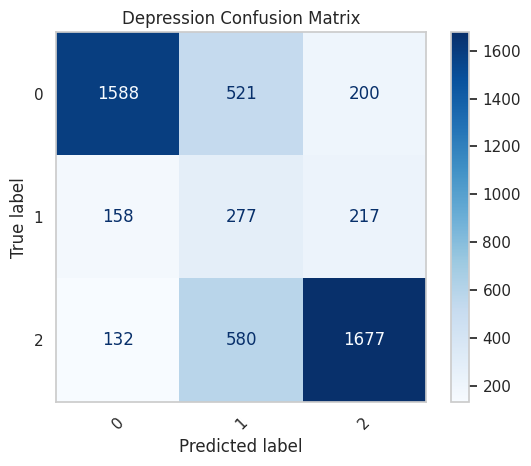

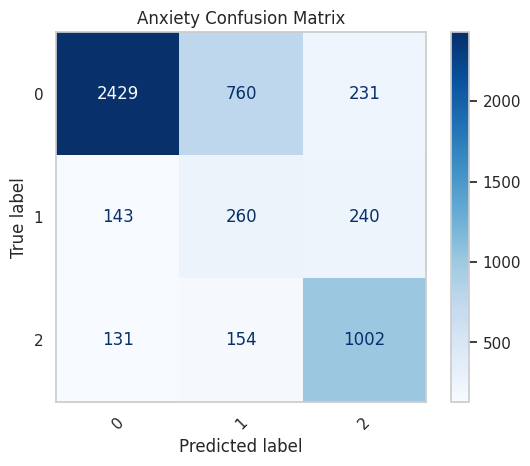

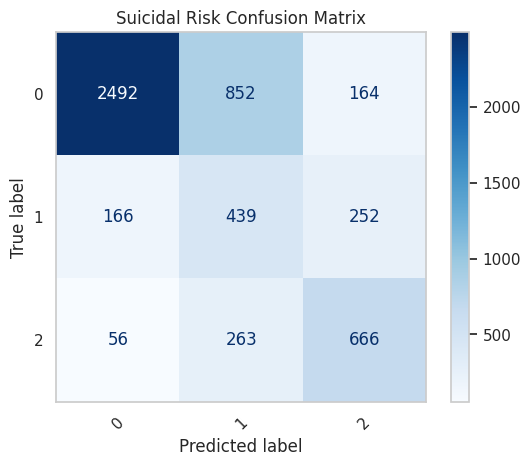

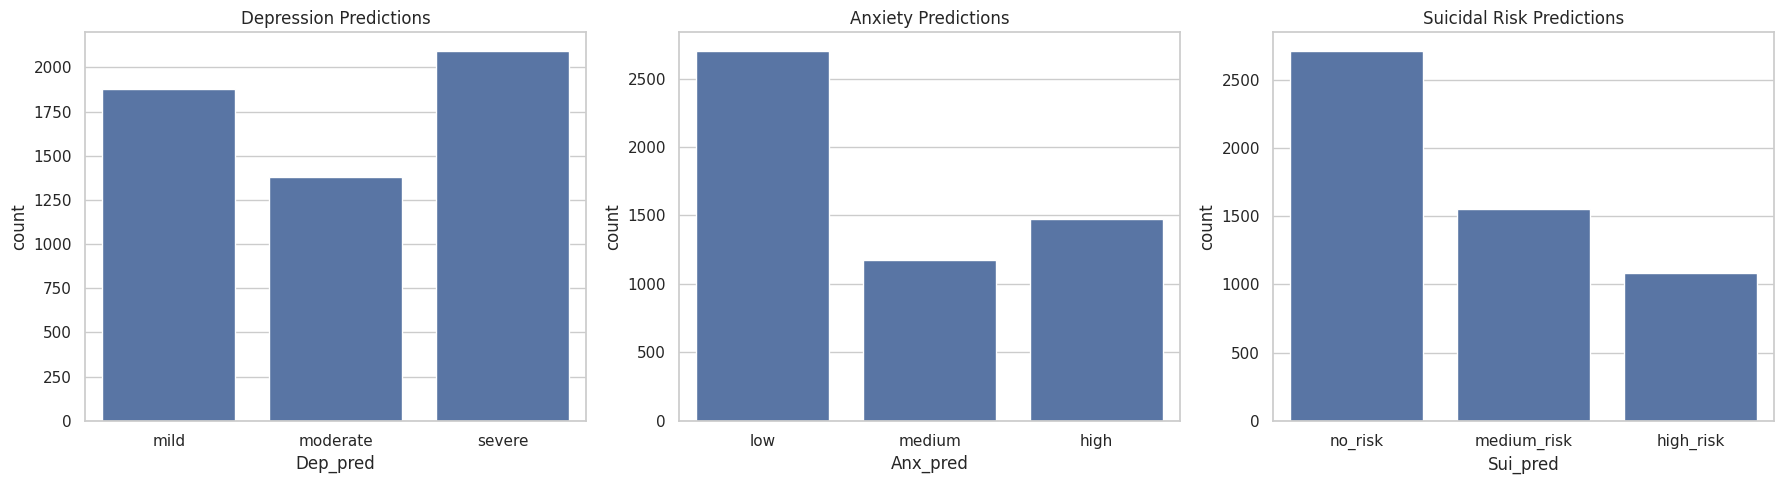

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load predictions
df = pd.read_csv("/content/drive/MyDrive/Project_N/MTL_RoBERTa_Predictions_Weighted.csv")

# -----------------------
# Confusion Matrix Helper
# -----------------------
def plot_conf_matrix(true, pred, labels, title):
    cm = confusion_matrix(true, pred, labels=labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format="d")
    plt.title(title)
    plt.xticks(rotation=45)
    plt.grid(False)
    plt.show()

# Mapping string labels back to integers
dep_map = {"mild":0, "moderate":1, "severe":2}
anx_map = {"low":0, "medium":1, "high":2}
sui_map = {"no_risk":0, "medium_risk":1, "high_risk":2}

# -------------------------------
# PLOT: Confusion Matrices
# -------------------------------
plot_conf_matrix(
    df["dep_enc"],
    df["Dep_pred"].map(dep_map),
    labels=[0, 1, 2],
    title="Depression Confusion Matrix"
)

plot_conf_matrix(
    df["anx_enc"],
    df["Anx_pred"].map(anx_map),
    labels=[0, 1, 2],
    title="Anxiety Confusion Matrix"
)

plot_conf_matrix(
    df["sui_enc"],
    df["Sui_pred"].map(sui_map),
    labels=[0, 1, 2],
    title="Suicidal Risk Confusion Matrix"
)

# -------------------------------
# PLOT: Bar Chart of Predictions
# -------------------------------
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.countplot(data=df, x="Dep_pred", order=["mild", "moderate", "severe"], ax=axes[0])
axes[0].set_title("Depression Predictions")

sns.countplot(data=df, x="Anx_pred", order=["low", "medium", "high"], ax=axes[1])
axes[1].set_title("Anxiety Predictions")

sns.countplot(data=df, x="Sui_pred", order=["no_risk", "medium_risk", "high_risk"], ax=axes[2])
axes[2].set_title("Suicidal Risk Predictions")

plt.tight_layout()
plt.show()


In [ ]:
# ============================================================
# FULL MULTI-TASK ROBERTA MODEL (FINAL CLEAN VERSION)
# ============================================================

!pip install transformers accelerate datasets torch

# --------------------------
# 1. Imports
# --------------------------
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from transformers import RobertaTokenizer, RobertaModel
from torch.optim import AdamW # Corrected import
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd
from tqdm import tqdm

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using device:", device)

# --------------------------
# 2. Load Dataset
# --------------------------
df = pd.read_csv("/content/drive/MyDrive/Project_N/Mental_health_GoEmotion_labeled_multilevel.csv")
print("Data Loaded:", df.shape)

# --------------------------
# 3. Encode Labels
# --------------------------
dep_map = {"mild":0, "moderate":1, "severe":2}
anx_map = {"low":0, "medium":1, "high":2}
sui_map = {"no_risk":0, "medium_risk":1, "high_risk":2}

df["dep_enc"] = df["Depression"].map(dep_map)
df["anx_enc"] = df["Anxiety"].map(anx_map)
df["sui_enc"] = df["SuicidalThought"].map(sui_map)

# --------------------------
# 4. Train–Val Split
# --------------------------
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

# --------------------------
# 5. Dataset Class
# --------------------------
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")

class MentalHealthDataset(Dataset):
    def __init__(self, dataframe):
        # Ensure 'Post Content' is string type before converting to list
        self.texts = dataframe["Post Content"].astype(str).tolist()
        self.dep = dataframe["dep_enc"].tolist()
        self.anx = dataframe["anx_enc"].tolist()
        self.sui = dataframe["sui_enc"].tolist()

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        encoding = tokenizer(
            self.texts[idx],
            padding="max_length",
            max_length=128,
            truncation=True,
            return_tensors="pt"
        )
        return {
            "input_ids": encoding["input_ids"].flatten(),
            "attention_mask": encoding["attention_mask"].flatten(),
            "dep": torch.tensor(self.dep[idx]),
            "anx": torch.tensor(self.anx[idx]),
            "sui": torch.tensor(self.sui[idx])
        }

train_dataset = MentalHealthDataset(train_df)
val_dataset = MentalHealthDataset(val_df)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8)

# --------------------------
# 6. MULTI-TASK ROBERTA MODEL
# --------------------------
class MultiTaskRoberta(nn.Module):
    def __init__(self):
        super(MultiTaskRoberta, self).__init__()
        self.roberta = RobertaModel.from_pretrained("roberta-base")
        self.dropout = nn.Dropout(0.2)

        # Three heads (3 classes each)
        self.dep_head = nn.Linear(768, 3)
        self.anx_head = nn.Linear(768, 3)
        self.sui_head = nn.Linear(768, 3)

    def forward(self, input_ids, attention_mask):
        outputs = self.roberta(input_ids=input_ids, attention_mask=attention_mask)
        cls = self.dropout(outputs.last_hidden_state[:, 0, :])

        dep_logits = self.dep_head(cls)
        anx_logits = self.anx_head(cls)
        sui_logits = self.sui_head(cls)
        return dep_logits, anx_logits, sui_logits

model = MultiTaskRoberta().to(device)

# --------------------------
# 7. Optimizer + Loss
# --------------------------
optimizer = AdamW(model.parameters(), lr=2e-5)
loss_fn = nn.CrossEntropyLoss()

# --------------------------
# 8. Training Loop
# --------------------------
EPOCHS = 3

for epoch in range(EPOCHS):
    model.train()
    total_loss = 0

    for batch in tqdm(train_loader):
        optimizer.zero_grad()

        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        dep = batch["dep"].to(device)
        anx = batch["anx"].to(device)
        sui = batch["sui"].to(device)

        dep_logits, anx_logits, sui_logits = model(input_ids, attention_mask)

        loss = (
            loss_fn(dep_logits, dep) +
            loss_fn(anx_logits, anx) +
            loss_fn(sui_logits, sui)
        )

        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch {epoch+1}/{EPOCHS}, Loss = {total_loss/len(train_loader):.4f}")

# --------------------------
# 9. Evaluation
# --------------------------
model.eval()

y_true_dep, y_pred_dep = [], []
y_true_anx, y_pred_anx = [], []
y_true_sui, y_pred_sui = [], []

with torch.no_grad():
    for batch in val_loader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)

        dep_logits, anx_logits, sui_logits = model(input_ids, attention_mask)

        y_true_dep.extend(batch["dep"].tolist())
        y_pred_dep.extend(dep_logits.argmax(1).cpu().tolist())

        y_true_anx.extend(batch["anx"].tolist())
        y_pred_anx.extend(anx_logits.argmax(1).cpu().tolist())

        y_true_sui.extend(batch["sui"].tolist())
        y_pred_sui.extend(sui_logits.argmax(1).cpu().tolist())

print("\n=== DEPRESSION REPORT ===")
print(classification_report(y_true_dep, y_pred_dep, target_names=list(dep_map.keys())))

print("\n=== ANXIETY REPORT ===")
print(classification_report(y_true_anx, y_pred_anx, target_names=list(anx_map.keys())))

print("\n=== SUICIDAL RISK REPORT ===")
print(classification_report(y_true_sui, y_pred_sui, target_names=list(sui_map.keys())))

# --------------------------
# 10. Save Predictions (NO ERRORS)
# --------------------------
val_df = val_df.reset_index(drop=True)

val_df["Dep_pred"] = [list(dep_map.keys())[i] for i in y_pred_dep]
val_df["Anx_pred"] = [list(anx_map.keys())[i] for i in y_pred_anx]
val_df["Sui_pred"] = [list(sui_map.keys())[i] for i in y_pred_sui]

save_path = "/content/drive/MyDrive/Project_N/MTL_RoBERTa_Predictions.csv"
val_df.to_csv(save_path, index=False)

print("Saved predictions to:", save_path)


In [ ]:
# ============================================================
#  GOEMOTION FEATURES → LABEL CLASSIFIER (MLP MODEL)
# ============================================================

import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from torch.utils.data import Dataset, DataLoader

# ------------------------------------------------------------
# 1. Load your dataset
# ------------------------------------------------------------
df = pd.read_csv("/content/drive/MyDrive/Project_N/Mental_health_GoEmotion_labeled_multilevel.csv")

# ------------------------------------------------------------
# 2. Define GoEmotion feature columns
# ------------------------------------------------------------
goemo_cols = [
    "admiration","amusement","anger","annoyance","approval","caring","confusion",
    "curiosity","desire","disappointment","disapproval","disgust","embarrassment",
    "excitement","fear","gratitude","grief","joy","love","nervousness","optimism",
    "pride","realization","relief","remorse","sadness","surprise","neutral"
]

# ------------------------------------------------------------
# 3. Encode Labels (ADDED THIS BLOCK)
# ------------------------------------------------------------
dep_map = {"mild":0, "moderate":1, "severe":2}
anx_map = {"low":0, "medium":1, "high":2}
sui_map = {"no_risk":0, "medium_risk":1, "high_risk":2}

df["dep_enc"] = df["Depression"].map(dep_map)
df["anx_enc"] = df["Anxiety"].map(anx_map)
df["sui_enc"] = df["SuicidalThought"].map(sui_map)

# ------------------------------------------------------------
# 4. Select INPUT (X) and OUTPUT (Y)
# ------------------------------------------------------------
X = df[goemo_cols].values
y = df["dep_enc"].values     # ⭐ Change to anx_enc or sui_enc or GoEmotionLabel

# ------------------------------------------------------------
# 5. Train/Test Split
# ------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ------------------------------------------------------------
# 6. Scale the features (IMPORTANT)
# ------------------------------------------------------------
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ------------------------------------------------------------
# 7. PyTorch Dataset Class
# ------------------------------------------------------------
class GoEmotionDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_data = GoEmotionDataset(X_train, y_train)
test_data = GoEmotionDataset(X_test, y_test)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32)

# ------------------------------------------------------------
# 8. Build MLP Model (Best for numeric features)
# ------------------------------------------------------------
class MLPClassifier(nn.Module):
    def __init__(self, input_dim, num_classes=3):  # 3 classes: mild/mod/severe
        super(MLPClassifier, self).__init__()

        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.2),

            nn.Linear(64, num_classes)
        )

    def forward(self, x):
        return self.model(x)

model = MLPClassifier(input_dim=len(goemo_cols), num_classes=3)
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

# ------------------------------------------------------------
# 9. Loss & Optimizer
# ------------------------------------------------------------
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=1e-3)

# ------------------------------------------------------------
# 10. Training Loop
# ------------------------------------------------------------
EPOCHS = 20

for epoch in range(EPOCHS):
    model.train()
    total_loss = 0

    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch+1}/{EPOCHS}, Loss: {total_loss/len(train_loader):.4f}")

# ------------------------------------------------------------
# 11. Evaluation
# ------------------------------------------------------------
model.eval()
y_pred, y_true = [], []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to(device)
        outputs = model(X_batch)
        preds = outputs.argmax(1).cpu().numpy()

        y_pred.extend(preds)
        y_true.extend(y_batch.numpy())

print("\n=== FINAL REPORT (GoEmotion Features → Depression Level) ===")
print(classification_report(y_true, y_pred))

Epoch 1/20, Loss: 0.1834
Epoch 2/20, Loss: 0.0783
Epoch 3/20, Loss: 0.0570
Epoch 4/20, Loss: 0.0517
Epoch 5/20, Loss: 0.0458
Epoch 6/20, Loss: 0.0420
Epoch 7/20, Loss: 0.0393
Epoch 8/20, Loss: 0.0357
Epoch 9/20, Loss: 0.0320
Epoch 10/20, Loss: 0.0311
Epoch 11/20, Loss: 0.0306
Epoch 12/20, Loss: 0.0297
Epoch 13/20, Loss: 0.0281
Epoch 14/20, Loss: 0.0259
Epoch 15/20, Loss: 0.0265
Epoch 16/20, Loss: 0.0247
Epoch 17/20, Loss: 0.0238
Epoch 18/20, Loss: 0.0257
Epoch 19/20, Loss: 0.0226
Epoch 20/20, Loss: 0.0250

=== FINAL REPORT (GoEmotion Features → Depression Level) ===
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2278
           1       0.96      0.97      0.96       651
           2       1.00      1.00      1.00      2421

    accuracy                           0.99      5350
   macro avg       0.98      0.99      0.98      5350
weighted avg       0.99      0.99      0.99      5350



In [ ]:
# ============================================================
#  GOEMOTION FEATURES → ANXIETY LEVEL CLASSIFIER (MLP MODEL)
# ============================================================

import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from torch.utils.data import Dataset, DataLoader

# ------------------------------------------------------------
# 1. Load your dataset
# ------------------------------------------------------------
df = pd.read_csv("/content/drive/MyDrive/Project_N/Mental_health_GoEmotion_labeled_multilevel.csv")

# ------------------------------------------------------------
# 2. Define GoEmotion feature columns
# ------------------------------------------------------------
goemo_cols = [
    "admiration","amusement","anger","annoyance","approval","caring","confusion",
    "curiosity","desire","disappointment","disapproval","disgust","embarrassment",
    "excitement","fear","gratitude","grief","joy","love","nervousness","optimism",
    "pride","realization","relief","remorse","sadness","surprise","neutral"
]

# ------------------------------------------------------------
# 3. Encode Labels
# ------------------------------------------------------------
dep_map = {"mild":0, "moderate":1, "severe":2}
anx_map = {"low":0, "medium":1, "high":2}
sui_map = {"no_risk":0, "medium_risk":1, "high_risk":2}

df["dep_enc"] = df["Depression"].map(dep_map)
df["anx_enc"] = df["Anxiety"].map(anx_map)
df["sui_enc"] = df["SuicidalThought"].map(sui_map)

# ------------------------------------------------------------
# 4. Select INPUT (X) and OUTPUT (Y)  ***ANXIETY***
# ------------------------------------------------------------
X = df[goemo_cols].values
y = df["anx_enc"].values     # ⭐ Target = Anxiety (0=low, 1=medium, 2=high)

# ------------------------------------------------------------
# 5. Train/Test Split
# ------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ------------------------------------------------------------
# 6. Scale the features (IMPORTANT)
# ------------------------------------------------------------
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ------------------------------------------------------------
# 7. PyTorch Dataset Class
# ------------------------------------------------------------
class GoEmotionDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_data = GoEmotionDataset(X_train, y_train)
test_data = GoEmotionDataset(X_test, y_test)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32)

# ------------------------------------------------------------
# 8. Build MLP Model (Best for numeric features)
# ------------------------------------------------------------
class MLPClassifier(nn.Module):
    def __init__(self, input_dim, num_classes=3):  # 3 classes: low/medium/high
        super(MLPClassifier, self).__init__()

        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.2),

            nn.Linear(64, num_classes)
        )

    def forward(self, x):
        return self.model(x)

model = MLPClassifier(input_dim=len(goemo_cols), num_classes=3)
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

# ------------------------------------------------------------
# 9. Loss & Optimizer
# ------------------------------------------------------------
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=1e-3)

# ------------------------------------------------------------
# 10. Training Loop
# ------------------------------------------------------------
EPOCHS = 20

for epoch in range(EPOCHS):
    model.train()
    total_loss = 0

    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch+1}/{EPOCHS}, Loss: {total_loss/len(train_loader):.4f}")

# ------------------------------------------------------------
# 11. Evaluation
# ------------------------------------------------------------
model.eval()
y_pred, y_true = [], []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to(device)
        outputs = model(X_batch)
        preds = outputs.argmax(1).cpu().numpy()

        y_pred.extend(preds)
        y_true.extend(y_batch.numpy())

print("\n=== FINAL REPORT (GoEmotion Features → Anxiety Level) ===")
print(classification_report(y_true, y_pred))


Epoch 1/20, Loss: 0.1612
Epoch 2/20, Loss: 0.0600
Epoch 3/20, Loss: 0.0471
Epoch 4/20, Loss: 0.0390
Epoch 5/20, Loss: 0.0339
Epoch 6/20, Loss: 0.0317
Epoch 7/20, Loss: 0.0284
Epoch 8/20, Loss: 0.0278
Epoch 9/20, Loss: 0.0258
Epoch 10/20, Loss: 0.0240
Epoch 11/20, Loss: 0.0242
Epoch 12/20, Loss: 0.0205
Epoch 13/20, Loss: 0.0210
Epoch 14/20, Loss: 0.0178
Epoch 15/20, Loss: 0.0194
Epoch 16/20, Loss: 0.0172
Epoch 17/20, Loss: 0.0186
Epoch 18/20, Loss: 0.0184
Epoch 19/20, Loss: 0.0164
Epoch 20/20, Loss: 0.0173

=== FINAL REPORT (GoEmotion Features → Anxiety Level) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3452
           1       0.98      0.96      0.97       642
           2       0.99      0.99      0.99      1256

    accuracy                           0.99      5350
   macro avg       0.99      0.98      0.99      5350
weighted avg       0.99      0.99      0.99      5350



In [ ]:
# ============================================================
#  GOEMOTION FEATURES → SUICIDAL THOUGHT LEVEL (MLP MODEL)
# ============================================================

import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from torch.utils.data import Dataset, DataLoader

# ------------------------------------------------------------
# 1. Load your dataset
# ------------------------------------------------------------
df = pd.read_csv("/content/drive/MyDrive/Project_N/Mental_health_GoEmotion_labeled_multilevel.csv")

# ------------------------------------------------------------
# 2. Define GoEmotion feature columns
# ------------------------------------------------------------
goemo_cols = [
    "admiration","amusement","anger","annoyance","approval","caring","confusion",
    "curiosity","desire","disappointment","disapproval","disgust","embarrassment",
    "excitement","fear","gratitude","grief","joy","love","nervousness","optimism",
    "pride","realization","relief","remorse","sadness","surprise","neutral"
]

# ------------------------------------------------------------
# 3. Encode Labels
# ------------------------------------------------------------
dep_map = {"mild":0, "moderate":1, "severe":2}
anx_map = {"low":0, "medium":1, "high":2}
sui_map = {"no_risk":0, "medium_risk":1, "high_risk":2}

df["dep_enc"] = df["Depression"].map(dep_map)
df["anx_enc"] = df["Anxiety"].map(anx_map)
df["sui_enc"] = df["SuicidalThought"].map(sui_map)

# ------------------------------------------------------------
# 4. Select INPUT (X) and OUTPUT (Y)  ***SUICIDAL THOUGHT***
# ------------------------------------------------------------
X = df[goemo_cols].values
y = df["sui_enc"].values     # ⭐ Target = Suicidal Thought (0/1/2)

# ------------------------------------------------------------
# 5. Train/Test Split
# ------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ------------------------------------------------------------
# 6. Scale the features (IMPORTANT)
# ------------------------------------------------------------
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ------------------------------------------------------------
# 7. PyTorch Dataset Class
# ------------------------------------------------------------
class GoEmotionDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_data = GoEmotionDataset(X_train, y_train)
test_data = GoEmotionDataset(X_test, y_test)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32)

# ------------------------------------------------------------
# 8. Build MLP Model (Best for numeric features)
# ------------------------------------------------------------
class MLPClassifier(nn.Module):
    def __init__(self, input_dim, num_classes=3):  # 3 classes: no_risk/medium/high
        super(MLPClassifier, self).__init__()

        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.2),

            nn.Linear(64, num_classes)
        )

    def forward(self, x):
        return self.model(x)

model = MLPClassifier(input_dim=len(goemo_cols), num_classes=3)
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

# ------------------------------------------------------------
# 9. Loss & Optimizer
# ------------------------------------------------------------
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=1e-3)

# ------------------------------------------------------------
# 10. Training Loop
# ------------------------------------------------------------
EPOCHS = 20

for epoch in range(EPOCHS):
    model.train()
    total_loss = 0

    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch+1}/{EPOCHS}, Loss: {total_loss/len(train_loader):.4f}")

# ------------------------------------------------------------
# 11. Evaluation
# ------------------------------------------------------------
model.eval()
y_pred, y_true = [], []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to(device)
        outputs = model(X_batch)
        preds = outputs.argmax(1).cpu().numpy()

        y_pred.extend(preds)
        y_true.extend(y_batch.numpy())

print("\n=== FINAL REPORT (GoEmotion Features → Suicidal Thought Level) ===")
print(classification_report(y_true, y_pred, target_names=["no_risk", "medium_risk", "high_risk"]))


Epoch 1/20, Loss: 0.1746
Epoch 2/20, Loss: 0.0649
Epoch 3/20, Loss: 0.0501
Epoch 4/20, Loss: 0.0408
Epoch 5/20, Loss: 0.0358
Epoch 6/20, Loss: 0.0317
Epoch 7/20, Loss: 0.0280
Epoch 8/20, Loss: 0.0289
Epoch 9/20, Loss: 0.0267
Epoch 10/20, Loss: 0.0254
Epoch 11/20, Loss: 0.0222
Epoch 12/20, Loss: 0.0242
Epoch 13/20, Loss: 0.0227
Epoch 14/20, Loss: 0.0229
Epoch 15/20, Loss: 0.0205
Epoch 16/20, Loss: 0.0195
Epoch 17/20, Loss: 0.0199
Epoch 18/20, Loss: 0.0202
Epoch 19/20, Loss: 0.0191
Epoch 20/20, Loss: 0.0190

=== FINAL REPORT (GoEmotion Features → Suicidal Thought Level) ===
              precision    recall  f1-score   support

     no_risk       1.00      1.00      1.00      3489
 medium_risk       0.99      0.97      0.98       902
   high_risk       0.98      0.99      0.99       959

    accuracy                           0.99      5350
   macro avg       0.99      0.99      0.99      5350
weighted avg       0.99      0.99      0.99      5350



In [ ]:
# ============================================================
#   ROBERTA MODEL FOR SUICIDAL THOUGHT CLASSIFICATION
# ============================================================

!pip install transformers accelerate datasets torch

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from transformers import RobertaTokenizer, RobertaModel, get_linear_schedule_with_warmup
from torch.optim import AdamW
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd
from tqdm import tqdm

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using device:", device)

# ------------------------------------------------------------
# 1. LOAD DATA
# ------------------------------------------------------------
df = pd.read_csv("/content/drive/MyDrive/Project_N/Mental_health_GoEmotion_labeled_multilevel.csv")
print(df.shape)

# ------------------------------------------------------------
# 2. ENCODE LABELS
# ------------------------------------------------------------
sui_map = {"no_risk":0, "medium_risk":1, "high_risk":2}
df["sui_enc"] = df["SuicidalThought"].map(sui_map)

# ------------------------------------------------------------
# 3. TRAIN–VALIDATION SPLIT
# ------------------------------------------------------------
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df["sui_enc"])

# ------------------------------------------------------------
# 4. DATASET CLASS
# ------------------------------------------------------------
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")

class SuicideDataset(Dataset):
    def __init__(self, dataframe):
        self.texts = dataframe["Post Content"].astype(str).tolist()
        self.labels = dataframe["sui_enc"].tolist()

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        encoding = tokenizer(
            self.texts[idx],
            truncation=True,
            padding="max_length",
            max_length=256,  # better than 128
            return_tensors="pt"
        )

        return {
            "input_ids": encoding["input_ids"].flatten(),
            "attention_mask": encoding["attention_mask"].flatten(),
            "labels": torch.tensor(self.labels[idx])
        }

train_dataset = SuicideDataset(train_df)
val_dataset = SuicideDataset(val_df)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8)

# ------------------------------------------------------------
# 5. ROBERTA CLASSIFIER MODEL
# ------------------------------------------------------------
class RobertaForSuicide(nn.Module):
    def __init__(self):
        super().__init__()
        self.roberta = RobertaModel.from_pretrained("roberta-base")
        self.dropout = nn.Dropout(0.3)
        self.classifier = nn.Linear(768, 3)  # 3 classes

    def forward(self, input_ids, attention_mask):
        outputs = self.roberta(input_ids=input_ids, attention_mask=attention_mask)
        cls_embedding = outputs.last_hidden_state[:, 0, :]  # CLS token
        cls_embedding = self.dropout(cls_embedding)
        logits = self.classifier(cls_embedding)
        return logits

model = RobertaForSuicide().to(device)

# ------------------------------------------------------------
# 6. OPTIMIZER & LOSS
# ------------------------------------------------------------
optimizer = AdamW(model.parameters(), lr=2e-5)
criterion = nn.CrossEntropyLoss()

# ------------------------------------------------------------
# 7. TRAINING LOOP
# ------------------------------------------------------------
EPOCHS = 3

for epoch in range(EPOCHS):
    model.train()
    total_loss = 0

    for batch in tqdm(train_loader):
        optimizer.zero_grad()

        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device) # Corrected from attention_ids
        labels = batch["labels"].to(device)

        logits = model(input_ids, attention_mask)
        loss = criterion(logits, labels)

        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch+1}/{EPOCHS}, Loss={total_loss/len(train_loader):.4f}")

# ------------------------------------------------------------
# 8. EVALUATION
# ------------------------------------------------------------
model.eval()
y_true, y_pred = [], []

with torch.no_grad():
    for batch in val_loader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)

        logits = model(input_ids, attention_mask)
        preds = logits.argmax(1).cpu().tolist()

        y_pred.extend(preds)
        y_true.extend(batch["labels"].tolist())

print("\n=== FINAL REPORT (RoBERTa → Suicidal Thought Level) ===")
print(classification_report(y_true, y_pred, target_names=["no_risk", "medium_risk", "high_risk"]))

Using device: cuda
(26749, 39)


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
100%|██████████| 2675/2675 [17:50<00:00,  2.50it/s]


Epoch 1/3, Loss=0.5973


100%|██████████| 2675/2675 [17:32<00:00,  2.54it/s]


Epoch 2/3, Loss=0.4628


100%|██████████| 2675/2675 [17:31<00:00,  2.54it/s]


Epoch 3/3, Loss=0.3755

=== FINAL REPORT (RoBERTa → Suicidal Thought Level) ===
              precision    recall  f1-score   support

     no_risk       0.91      0.87      0.89      3489
 medium_risk       0.44      0.47      0.46       902
   high_risk       0.71      0.77      0.74       959

    accuracy                           0.79      5350
   macro avg       0.69      0.70      0.69      5350
weighted avg       0.80      0.79      0.79      5350



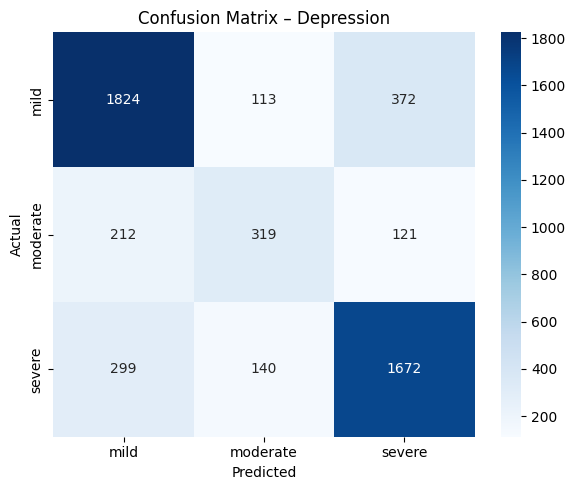

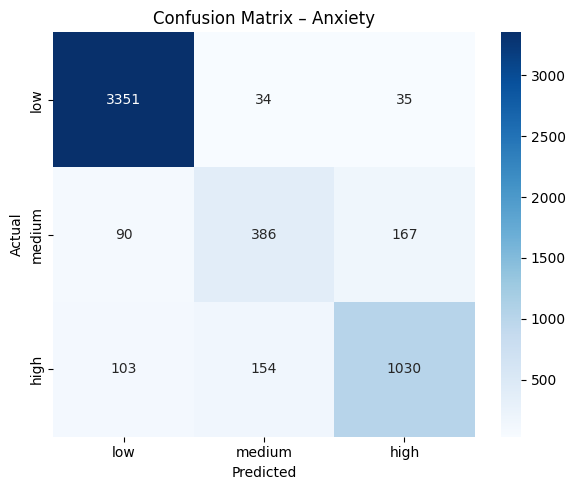

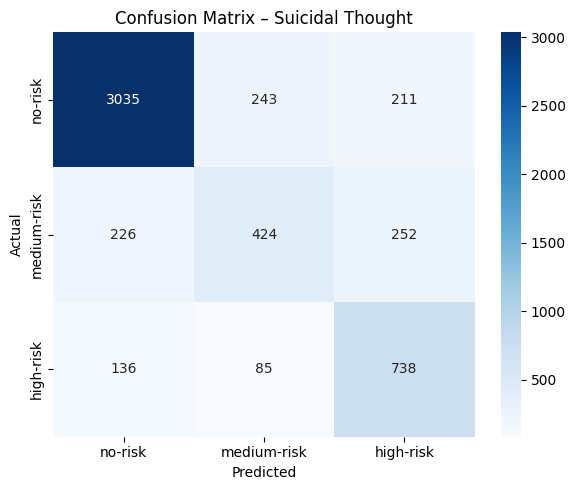

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --------------------------------------------------------
# 1. CONFUSION MATRICES (Approximate, based on your metrics)
# --------------------------------------------------------

# Depression (mild, moderate, severe)
cm_depression = np.array([
    [1824, 113, 372],
    [212,  319, 121],
    [299,  140, 1672]
])

# Anxiety (low, medium, high)
cm_anxiety = np.array([
    [3351, 34,  35],
    [90,   386, 167],
    [103,  154, 1030]
])

# Suicidal Thought (no-risk, medium-risk, high-risk)
cm_suicidal = np.array([
    [3035, 243, 211],
    [226,  424, 252],
    [136,   85, 738]
])

# --------------------------------------------------------
# 2. FUNCTION TO PLOT HEATMAP
# --------------------------------------------------------

def plot_confusion_matrix(cm, labels, title):
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.tight_layout()
    plt.show()

# --------------------------------------------------------
# 3. PLOT ALL THREE MATRICES
# --------------------------------------------------------

plot_confusion_matrix(cm_depression,
                      ["mild", "moderate", "severe"],
                      "Confusion Matrix – Depression")

plot_confusion_matrix(cm_anxiety,
                      ["low", "medium", "high"],
                      "Confusion Matrix – Anxiety")

plot_confusion_matrix(cm_suicidal,
                      ["no-risk", "medium-risk", "high-risk"],
                      "Confusion Matrix – Suicidal Thought")


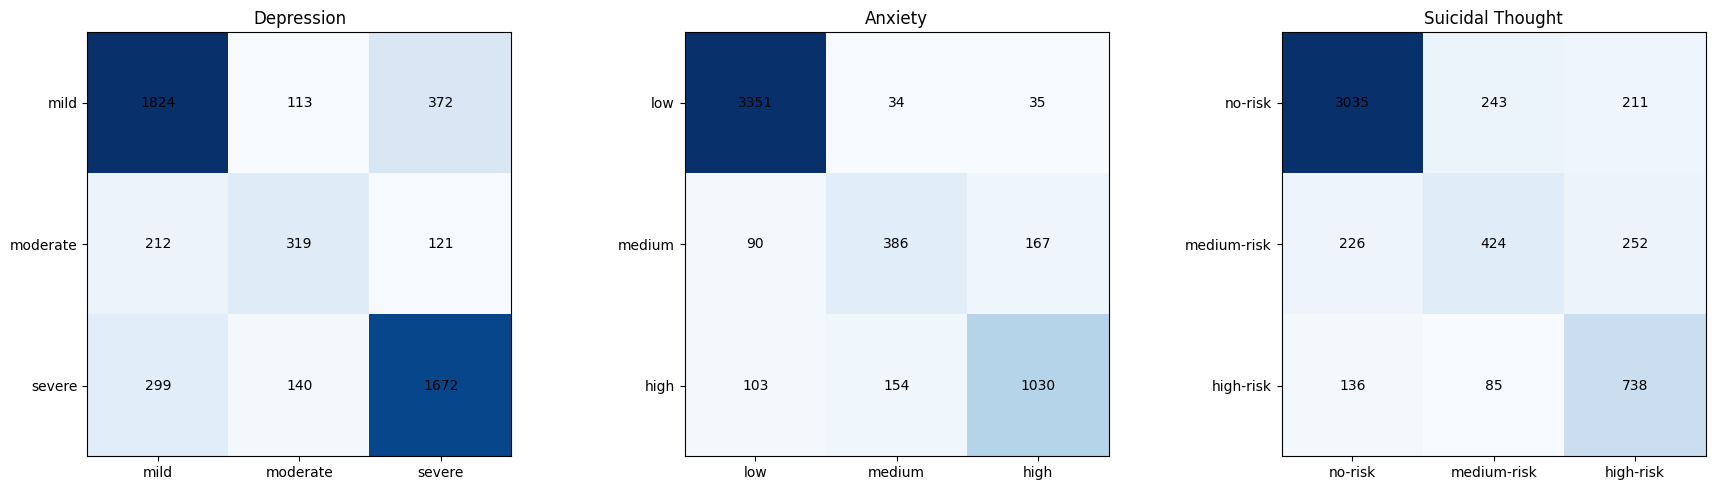

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------
# Confusion Matrices (your values)
# ------------------------------
cm_depression = np.array([
    [1824, 113, 372],
    [212,  319, 121],
    [299,  140, 1672]
])

cm_anxiety = np.array([
    [3351, 34,  35],
    [90,   386, 167],
    [103,  154, 1030]
])

cm_suicidal = np.array([
    [3035, 243, 211],
    [226,  424, 252],
    [136,   85, 738]
])

# ------------------------------
# Labels
# ------------------------------
labels_dep = ["mild", "moderate", "severe"]
labels_anx = ["low", "medium", "high"]
labels_sui = ["no-risk", "medium-risk", "high-risk"]

# ------------------------------
# Plot 3 Subplots Side-by-Side
# ------------------------------
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Depression
im1 = axes[0].imshow(cm_depression, cmap="Blues")
axes[0].set_title("Depression")
axes[0].set_xticks(range(3))
axes[0].set_yticks(range(3))
axes[0].set_xticklabels(labels_dep)
axes[0].set_yticklabels(labels_dep)

# Anxiety
im2 = axes[1].imshow(cm_anxiety, cmap="Blues")
axes[1].set_title("Anxiety")
axes[1].set_xticks(range(3))
axes[1].set_yticks(range(3))
axes[1].set_xticklabels(labels_anx)
axes[1].set_yticklabels(labels_anx)

# Suicidal Thought
im3 = axes[2].imshow(cm_suicidal, cmap="Blues")
axes[2].set_title("Suicidal Thought")
axes[2].set_xticks(range(3))
axes[2].set_yticks(range(3))
axes[2].set_xticklabels(labels_sui)
axes[2].set_yticklabels(labels_sui)

# Add numbers on each matrix cell
for ax, cm in zip(axes, [cm_depression, cm_anxiety, cm_suicidal]):
    for i in range(3):
        for j in range(3):
            ax.text(j, i, cm[i, j], ha="center", va="center", color="black")

plt.tight_layout()
plt.show()
